In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from maf import MAF
from made import MADE
from datasets.data_loaders import get_data, get_data_loaders
from utils.train import train_one_epoch_maf, train_one_epoch_made
from utils.validation import val_maf, val_made
from utils.test import test_maf, test_made
from utils.plot import sample_digits_maf, plot_losses

from tqdm import tqdm

In [2]:
# --------- SET PARAMETERS ----------
model_name = "maf"  # 'MAF' or 'MADE'
dataset_name = "chad"
batch_size = 1000
n_mades = 1
hidden_dims = [1]
lr = 1e-6
random_order = False
patience = 30  # For early stopping
seed = 290713
plot = False
max_epochs = 5000
# -----------------------------------

In [3]:
# Get dataset.
data = get_data(dataset_name)
train = torch.from_numpy(data.train.x)

In [4]:
dimdat = train.shape[1]
print('Each input vector is of length',dimdat)
print('There are',train.shape[0],'data vectors')

Each input vector is of length 2
There are 8100 data vectors


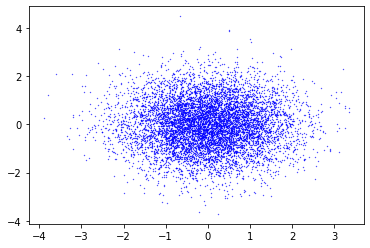

In [5]:
plt.scatter(torch.detach(train[:,0]), torch.detach(train[:,1]), c ="blue", s=0.1)
plt.show()

In [6]:
# Get data loaders.
train_loader, val_loader, test_loader = get_data_loaders(data, batch_size)

In [7]:
# Get model.
n_in = data.n_dims
n_in = train.shape[1]
if model_name.lower() == "maf":
    model = MAF(n_in, n_mades, hidden_dims, use_reverse=False)
elif model_name.lower() == "made":
    model = MADE(n_in, hidden_dims, random_order=random_order, seed=seed, gaussian=True)

In [8]:
# Get optimiser.
optimiser = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-6)

In [9]:
# Format name of model save file.
save_name = f"{model_name}_{dataset_name}_{'_'.join(str(d) for d in hidden_dims)}.pt"

In [10]:
# Initialise list for plotting.
epochs_list = []
train_losses = []
val_losses = []

In [11]:
# Initialiise early stopping.
i = 0
max_loss = np.inf

In [13]:
# Training loop.
for epoch in tqdm(range(1, max_epochs)):
    if model_name == "maf":
        train_loss = train_one_epoch_maf(model, epoch, optimiser, train_loader)
        val_loss = val_maf(model, train, val_loader)
    elif model_name == "made":
        train_loss = train_one_epoch_made(model, epoch, optimiser, train_loader)
        val_loss = val_made(model, val_loader)
    if plot:
        sample_digits_maf(model, epoch, random_order=random_order, seed=5)

    epochs_list.append(epoch)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Early stopping. Save model on each epoch with improvement.
    if val_loss < max_loss:
        i = 0
        max_loss = val_loss
        torch.save(
            model, "model_saves/" + save_name
        )  # Will print a UserWarning 1st epoch.
    else:
        i += 1

    if i < patience:
        print("Patience counter: {}/{}".format(i, patience))
    else:
        print("Patience counter: {}/{}\n Terminate training!".format(i, patience))
        break

  0%|▏                                                                                                                   | 6/4999 [00:00<03:31, 23.64it/s]

Epoch: 1 Average loss: 2.82440
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 2 Average loss: 2.82440
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 3 Average loss: 2.82440
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 4 Average loss: 2.82440
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 5 Average loss: 2.82440
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 6 Average loss: 2.82440
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 7 Average loss: 2.82440
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30


  0%|▍                                                                                                                  | 17/4999 [00:00<02:03, 40.23it/s]

Epoch: 8 Average loss: 2.82440
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 9 Average loss: 2.82440
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 10 Average loss: 2.82439
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 11 Average loss: 2.82439
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 12 Average loss: 2.82439
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 13 Average loss: 2.82439
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 14 Average loss: 2.82439
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 15 Average loss: 2.82439
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Ep

  0%|▌                                                                                                                  | 23/4999 [00:00<01:52, 44.13it/s]

Patience counter: 0/30
Epoch: 19 Average loss: 2.82438
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 20 Average loss: 2.82438
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 21 Average loss: 2.82438
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 22 Average loss: 2.82438
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 23 Average loss: 2.82438
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 24 Average loss: 2.82438
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 25 Average loss: 2.82438
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652
Patience counter: 0/30
Epoch: 26 Average loss: 2.82438
setting batch stats for validation
Validation loss: 2.8310 +/- 0.0652


  1%|▊                                                                                                                  | 34/4999 [00:00<01:46, 46.43it/s]

Epoch: 29 Average loss: 2.82437
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 30 Average loss: 2.82437
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 31 Average loss: 2.82437
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 32 Average loss: 2.82437
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 33 Average loss: 2.82437
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 34 Average loss: 2.82437
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 35 Average loss: 2.82436
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 36 Average loss: 2.82436
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30


  1%|█                                                                                                                  | 44/4999 [00:01<01:47, 46.09it/s]

Epoch: 39 Average loss: 2.82436
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 40 Average loss: 2.82436
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 41 Average loss: 2.82436
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 42 Average loss: 2.82436
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 43 Average loss: 2.82436
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 44 Average loss: 2.82435
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 45 Average loss: 2.82435
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 46 Average loss: 2.82435
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30


  1%|█▏                                                                                                                 | 54/4999 [00:01<01:46, 46.35it/s]

Patience counter: 0/30
Epoch: 49 Average loss: 2.82435
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 50 Average loss: 2.82435
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 51 Average loss: 2.82435
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 52 Average loss: 2.82435
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 53 Average loss: 2.82434
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 54 Average loss: 2.82434
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 55 Average loss: 2.82434
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 56 Average loss: 2.82434
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652


  1%|█▍                                                                                                                 | 64/4999 [00:01<01:46, 46.46it/s]

Epoch: 59 Average loss: 2.82434
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 60 Average loss: 2.82434
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 61 Average loss: 2.82433
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 62 Average loss: 2.82433
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 63 Average loss: 2.82433
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 64 Average loss: 2.82433
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 65 Average loss: 2.82433
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 66 Average loss: 2.82433
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30


  1%|█▌                                                                                                                 | 69/4999 [00:01<01:45, 46.63it/s]

Epoch: 69 Average loss: 2.82433
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 70 Average loss: 2.82432
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0652
Patience counter: 0/30
Epoch: 71 Average loss: 2.82432
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 72 Average loss: 2.82432
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 73 Average loss: 2.82432
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30


  2%|█▊                                                                                                                 | 80/4999 [00:02<03:08, 26.08it/s]

Epoch: 74 Average loss: 2.82432
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 75 Average loss: 2.82432
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 76 Average loss: 2.82432
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 77 Average loss: 2.82432
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 78 Average loss: 2.82431
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 79 Average loss: 2.82431
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 80 Average loss: 2.82431
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 81 Average loss: 2.82431
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30


  2%|██                                                                                                                 | 92/4999 [00:02<02:16, 35.96it/s]

Epoch: 85 Average loss: 2.82431
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 86 Average loss: 2.82431
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 87 Average loss: 2.82430
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 88 Average loss: 2.82430
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 89 Average loss: 2.82430
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 90 Average loss: 2.82430
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 91 Average loss: 2.82430
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 92 Average loss: 2.82430
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30


  2%|██▎                                                                                                               | 104/4999 [00:02<01:52, 43.47it/s]

Epoch: 96 Average loss: 2.82429
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 97 Average loss: 2.82429
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 98 Average loss: 2.82429
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 99 Average loss: 2.82429
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 100 Average loss: 2.82429
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 101 Average loss: 2.82429
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 102 Average loss: 2.82429
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 103 Average loss: 2.82429
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0

  2%|██▋                                                                                                               | 116/4999 [00:02<01:41, 48.04it/s]

Epoch: 107 Average loss: 2.82428
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 108 Average loss: 2.82428
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 109 Average loss: 2.82428
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 110 Average loss: 2.82428
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 111 Average loss: 2.82428
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 112 Average loss: 2.82428
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 113 Average loss: 2.82427
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counter: 0/30
Epoch: 114 Average loss: 2.82427
setting batch stats for validation
Validation loss: 2.8309 +/- 0.0653
Patience counte

  3%|██▉                                                                                                               | 128/4999 [00:03<01:37, 49.76it/s]

Epoch: 118 Average loss: 2.82427
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 119 Average loss: 2.82427
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 120 Average loss: 2.82427
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 121 Average loss: 2.82426
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 122 Average loss: 2.82426
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 123 Average loss: 2.82426
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 124 Average loss: 2.82426
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 125 Average loss: 2.82426
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counte

  3%|███                                                                                                               | 134/4999 [00:03<01:39, 48.65it/s]

Epoch: 129 Average loss: 2.82426
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 130 Average loss: 2.82425
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 131 Average loss: 2.82425
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 132 Average loss: 2.82425
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 133 Average loss: 2.82425
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 134 Average loss: 2.82425
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 135 Average loss: 2.82425
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 136 Average loss: 2.82425
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counte

  3%|███▎                                                                                                              | 145/4999 [00:03<01:41, 47.74it/s]

Epoch: 139 Average loss: 2.82424
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 140 Average loss: 2.82424
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 141 Average loss: 2.82424
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 142 Average loss: 2.82424
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 143 Average loss: 2.82424
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 144 Average loss: 2.82424
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 145 Average loss: 2.82424
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 146 Average loss: 2.82424
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counte

  3%|███▌                                                                                                              | 155/4999 [00:03<01:42, 47.45it/s]

Epoch: 149 Average loss: 2.82423
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 150 Average loss: 2.82423
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 151 Average loss: 2.82423
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 152 Average loss: 2.82423
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 153 Average loss: 2.82423
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 154 Average loss: 2.82423
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 155 Average loss: 2.82423
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 156 Average loss: 2.82422
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counte

  3%|███▊                                                                                                              | 165/4999 [00:03<01:40, 47.87it/s]

Epoch: 159 Average loss: 2.82422
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 160 Average loss: 2.82422
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 161 Average loss: 2.82422
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 162 Average loss: 2.82422
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 163 Average loss: 2.82422
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 164 Average loss: 2.82421
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 165 Average loss: 2.82421
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 166 Average loss: 2.82421
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counte

  4%|████                                                                                                              | 176/4999 [00:04<01:44, 46.05it/s]

setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 170 Average loss: 2.82421
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 171 Average loss: 2.82421
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 172 Average loss: 2.82421
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 173 Average loss: 2.82420
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 174 Average loss: 2.82420
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 175 Average loss: 2.82420
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 176 Average loss: 2.82420
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 177 Average loss: 

  4%|████▎                                                                                                             | 188/4999 [00:04<01:36, 49.62it/s]

setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 179 Average loss: 2.82420
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 180 Average loss: 2.82420
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 181 Average loss: 2.82420
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 182 Average loss: 2.82419
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 183 Average loss: 2.82419
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 184 Average loss: 2.82419
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 185 Average loss: 2.82419
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 186 Average loss: 

  4%|████▍                                                                                                             | 194/4999 [00:04<01:34, 50.71it/s]

Epoch: 189 Average loss: 2.82419
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 190 Average loss: 2.82418
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 191 Average loss: 2.82418
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 192 Average loss: 2.82418
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 193 Average loss: 2.82418
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 194 Average loss: 2.82418
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 195 Average loss: 2.82418
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 196 Average loss: 2.82418
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counte

  4%|████▋                                                                                                             | 206/4999 [00:04<01:32, 51.74it/s]

Epoch: 200 Average loss: 2.82417
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 201 Average loss: 2.82417
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 202 Average loss: 2.82417
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 203 Average loss: 2.82417
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 204 Average loss: 2.82417
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 205 Average loss: 2.82417
setting batch stats for validation
Validation loss: 2.8308 +/- 0.0653
Patience counter: 0/30
Epoch: 206 Average loss: 2.82417
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 207 Average loss: 2.82416
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counte

  4%|████▉                                                                                                             | 218/4999 [00:05<01:30, 52.56it/s]

Epoch: 211 Average loss: 2.82416
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 212 Average loss: 2.82416
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 213 Average loss: 2.82416
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 214 Average loss: 2.82416
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 215 Average loss: 2.82416
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 216 Average loss: 2.82415
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 217 Average loss: 2.82415
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 218 Average loss: 2.82415
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counte

  5%|█████▏                                                                                                            | 230/4999 [00:05<01:30, 52.84it/s]

Epoch: 222 Average loss: 2.82415
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 223 Average loss: 2.82415
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 224 Average loss: 2.82415
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 225 Average loss: 2.82414
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 226 Average loss: 2.82414
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 227 Average loss: 2.82414
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 228 Average loss: 2.82414
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 229 Average loss: 2.82414
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counte

  5%|█████▌                                                                                                            | 242/4999 [00:05<01:30, 52.81it/s]

Epoch: 233 Average loss: 2.82413
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 234 Average loss: 2.82413
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 235 Average loss: 2.82413
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 236 Average loss: 2.82413
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 237 Average loss: 2.82413
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 238 Average loss: 2.82413
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 239 Average loss: 2.82413
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 240 Average loss: 2.82413
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counte

  5%|█████▊                                                                                                            | 254/4999 [00:05<01:29, 52.88it/s]

Epoch: 244 Average loss: 2.82412
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 245 Average loss: 2.82412
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 246 Average loss: 2.82412
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 247 Average loss: 2.82412
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 248 Average loss: 2.82412
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 249 Average loss: 2.82412
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 250 Average loss: 2.82412
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 251 Average loss: 2.82411
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counte

  5%|█████▉                                                                                                            | 260/4999 [00:05<01:29, 53.02it/s]

Epoch: 255 Average loss: 2.82411
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 256 Average loss: 2.82411
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 257 Average loss: 2.82411
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 258 Average loss: 2.82411
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 259 Average loss: 2.82410
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 260 Average loss: 2.82410
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 261 Average loss: 2.82410
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 262 Average loss: 2.82410
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counte

  5%|██████▏                                                                                                           | 272/4999 [00:06<01:29, 52.82it/s]

Epoch: 266 Average loss: 2.82410
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 267 Average loss: 2.82410
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 268 Average loss: 2.82409
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 269 Average loss: 2.82409
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 270 Average loss: 2.82409
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 271 Average loss: 2.82409
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 272 Average loss: 2.82409
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 273 Average loss: 2.82409
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counte

  6%|██████▍                                                                                                           | 284/4999 [00:06<01:33, 50.39it/s]

Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 276 Average loss: 2.82408
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 277 Average loss: 2.82408
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 278 Average loss: 2.82408
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 279 Average loss: 2.82408
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 280 Average loss: 2.82408
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 281 Average loss: 2.82408
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 282 Average loss: 2.82408
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 283 Average loss: 2.82408
setting batch stats for val

  6%|██████▊                                                                                                           | 296/4999 [00:06<01:30, 51.83it/s]

Epoch: 286 Average loss: 2.82407
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 287 Average loss: 2.82407
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 288 Average loss: 2.82407
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 289 Average loss: 2.82407
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 290 Average loss: 2.82407
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 291 Average loss: 2.82407
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 292 Average loss: 2.82407
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counter: 0/30
Epoch: 293 Average loss: 2.82406
setting batch stats for validation
Validation loss: 2.8307 +/- 0.0653
Patience counte

  6%|██████▉                                                                                                           | 302/4999 [00:06<01:29, 52.22it/s]

Epoch: 297 Average loss: 2.82406
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 298 Average loss: 2.82406
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 299 Average loss: 2.82406
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 300 Average loss: 2.82406
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 301 Average loss: 2.82406
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 302 Average loss: 2.82405
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 303 Average loss: 2.82405
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 304 Average loss: 2.82405
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counte

  6%|███████▏                                                                                                          | 314/4999 [00:06<01:31, 51.06it/s]

Epoch: 308 Average loss: 2.82405
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 309 Average loss: 2.82405
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 310 Average loss: 2.82405
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 311 Average loss: 2.82404
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 312 Average loss: 2.82404
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 313 Average loss: 2.82404
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 314 Average loss: 2.82404
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 315 Average loss: 2.82404
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counte

  7%|███████▍                                                                                                          | 326/4999 [00:07<01:29, 52.05it/s]

Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 319 Average loss: 2.82403
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 320 Average loss: 2.82403
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 321 Average loss: 2.82403
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 322 Average loss: 2.82403
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 323 Average loss: 2.82403
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 324 Average loss: 2.82403
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 325 Average loss: 2.82403
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 326 Average loss: 2.82403
setting batch stats for val

  7%|███████▋                                                                                                          | 338/4999 [00:07<01:29, 52.04it/s]

Epoch: 329 Average loss: 2.82402
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 330 Average loss: 2.82402
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 331 Average loss: 2.82402
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 332 Average loss: 2.82402
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 333 Average loss: 2.82402
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 334 Average loss: 2.82402
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 335 Average loss: 2.82402
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 336 Average loss: 2.82402
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counte

  7%|███████▉                                                                                                          | 350/4999 [00:07<01:28, 52.63it/s]

Epoch: 340 Average loss: 2.82401
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 341 Average loss: 2.82401
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 342 Average loss: 2.82401
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 343 Average loss: 2.82401
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 344 Average loss: 2.82401
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 345 Average loss: 2.82400
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 346 Average loss: 2.82400
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 347 Average loss: 2.82400
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counte

  7%|████████                                                                                                          | 356/4999 [00:07<01:28, 52.72it/s]

Epoch: 351 Average loss: 2.82400
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 352 Average loss: 2.82400
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 353 Average loss: 2.82400
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 354 Average loss: 2.82399
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 355 Average loss: 2.82399
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 356 Average loss: 2.82399
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 357 Average loss: 2.82399
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 358 Average loss: 2.82399
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counte

  7%|████████▍                                                                                                         | 368/4999 [00:07<01:29, 51.96it/s]

Epoch: 362 Average loss: 2.82398
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 363 Average loss: 2.82398
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 364 Average loss: 2.82398
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 365 Average loss: 2.82398
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 366 Average loss: 2.82398
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 367 Average loss: 2.82398
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 368 Average loss: 2.82398
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 369 Average loss: 2.82398
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counte

  8%|████████▋                                                                                                         | 380/4999 [00:08<01:32, 49.98it/s]

Epoch: 373 Average loss: 2.82397
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 374 Average loss: 2.82397
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 375 Average loss: 2.82397
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 376 Average loss: 2.82397
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 377 Average loss: 2.82397
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 378 Average loss: 2.82397
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 379 Average loss: 2.82396
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 380 Average loss: 2.82396
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counte

  8%|████████▉                                                                                                         | 392/4999 [00:08<01:30, 51.15it/s]

Epoch: 383 Average loss: 2.82396
setting batch stats for validation
Validation loss: 2.8306 +/- 0.0653
Patience counter: 0/30
Epoch: 384 Average loss: 2.82396
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 385 Average loss: 2.82396
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 386 Average loss: 2.82396
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 387 Average loss: 2.82396
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 388 Average loss: 2.82395
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 389 Average loss: 2.82395
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 390 Average loss: 2.82395
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counte

  8%|█████████▏                                                                                                        | 404/4999 [00:08<01:28, 52.07it/s]

Epoch: 394 Average loss: 2.82395
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 395 Average loss: 2.82395
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 396 Average loss: 2.82395
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 397 Average loss: 2.82394
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 398 Average loss: 2.82394
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 399 Average loss: 2.82394
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 400 Average loss: 2.82394
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 401 Average loss: 2.82394
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counte

  8%|█████████▎                                                                                                        | 410/4999 [00:08<01:27, 52.40it/s]

Epoch: 405 Average loss: 2.82393
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 406 Average loss: 2.82393
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 407 Average loss: 2.82393
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 408 Average loss: 2.82393
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 409 Average loss: 2.82393
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 410 Average loss: 2.82393
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 411 Average loss: 2.82393
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 412 Average loss: 2.82393
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counte

  8%|█████████▌                                                                                                        | 422/4999 [00:08<01:27, 52.53it/s]

Epoch: 416 Average loss: 2.82392
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 417 Average loss: 2.82392
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 418 Average loss: 2.82392
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 419 Average loss: 2.82392
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 420 Average loss: 2.82392
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 421 Average loss: 2.82392
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 422 Average loss: 2.82391
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 423 Average loss: 2.82391
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counte

  9%|█████████▉                                                                                                        | 434/4999 [00:09<01:26, 52.95it/s]

Epoch: 427 Average loss: 2.82391
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 428 Average loss: 2.82391
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 429 Average loss: 2.82391
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 430 Average loss: 2.82391
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 431 Average loss: 2.82390
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 432 Average loss: 2.82390
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 433 Average loss: 2.82390
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 434 Average loss: 2.82390
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counte

  9%|██████████▏                                                                                                       | 446/4999 [00:09<01:25, 53.13it/s]

Epoch: 438 Average loss: 2.82390
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 439 Average loss: 2.82389
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 440 Average loss: 2.82389
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 441 Average loss: 2.82389
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 442 Average loss: 2.82389
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 443 Average loss: 2.82389
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 444 Average loss: 2.82389
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 445 Average loss: 2.82389
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counte

  9%|██████████▍                                                                                                       | 458/4999 [00:09<01:25, 53.12it/s]

Epoch: 449 Average loss: 2.82388
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 450 Average loss: 2.82388
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 451 Average loss: 2.82388
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 452 Average loss: 2.82388
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 453 Average loss: 2.82388
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 454 Average loss: 2.82388
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 455 Average loss: 2.82388
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 456 Average loss: 2.82387
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counte

  9%|██████████▋                                                                                                       | 470/4999 [00:09<01:25, 53.13it/s]

Epoch: 460 Average loss: 2.82387
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 461 Average loss: 2.82387
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 462 Average loss: 2.82387
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 463 Average loss: 2.82387
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 464 Average loss: 2.82387
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 465 Average loss: 2.82386
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 466 Average loss: 2.82386
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 467 Average loss: 2.82386
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counte

 10%|██████████▊                                                                                                       | 476/4999 [00:09<01:31, 49.64it/s]

Epoch: 471 Average loss: 2.82386
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 472 Average loss: 2.82386
setting batch stats for validation
Validation loss: 2.8305 +/- 0.0653
Patience counter: 0/30
Epoch: 473 Average loss: 2.82385
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 474 Average loss: 2.82385
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 475 Average loss: 2.82385
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 476 Average loss: 2.82385
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 477 Average loss: 2.82385
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 478 Average loss: 2.82385
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counte

 10%|███████████▏                                                                                                      | 488/4999 [00:10<01:27, 51.41it/s]

Epoch: 481 Average loss: 2.82385
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 482 Average loss: 2.82384
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 483 Average loss: 2.82384
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 484 Average loss: 2.82384
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 485 Average loss: 2.82384
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 486 Average loss: 2.82384
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 487 Average loss: 2.82384
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 488 Average loss: 2.82384
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counte

 10%|███████████▍                                                                                                      | 500/4999 [00:10<01:27, 51.59it/s]

Epoch: 492 Average loss: 2.82383
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 493 Average loss: 2.82383
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 494 Average loss: 2.82383
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 495 Average loss: 2.82383
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 496 Average loss: 2.82383
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 497 Average loss: 2.82383
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 498 Average loss: 2.82383
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 499 Average loss: 2.82382
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counte

 10%|███████████▋                                                                                                      | 512/4999 [00:10<01:27, 51.25it/s]

Epoch: 503 Average loss: 2.82382
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 504 Average loss: 2.82382
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 505 Average loss: 2.82382
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 506 Average loss: 2.82382
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 507 Average loss: 2.82381
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 508 Average loss: 2.82381
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 509 Average loss: 2.82381
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 510 Average loss: 2.82381
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counte

 10%|███████████▊                                                                                                      | 518/4999 [00:10<01:30, 49.56it/s]

Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 514 Average loss: 2.82381
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 515 Average loss: 2.82381
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 516 Average loss: 2.82380
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 517 Average loss: 2.82380
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 518 Average loss: 2.82380
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 519 Average loss: 2.82380
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 520 Average loss: 2.82380
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 521 Average loss: 2.82380
setting batch stats for val

 11%|████████████                                                                                                      | 528/4999 [00:11<01:33, 48.04it/s]

Epoch: 523 Average loss: 2.82380
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 524 Average loss: 2.82380
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 525 Average loss: 2.82379
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 526 Average loss: 2.82379
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 527 Average loss: 2.82379
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 528 Average loss: 2.82379
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 529 Average loss: 2.82379
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 530 Average loss: 2.82379
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counte

 11%|████████████▎                                                                                                     | 538/4999 [00:11<01:33, 47.74it/s]

Epoch: 533 Average loss: 2.82378
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 534 Average loss: 2.82378
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 535 Average loss: 2.82378
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 536 Average loss: 2.82378
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 537 Average loss: 2.82378
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 538 Average loss: 2.82378
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 539 Average loss: 2.82378
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 540 Average loss: 2.82378
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counte

 11%|████████████▍                                                                                                     | 548/4999 [00:11<01:45, 42.00it/s]

Epoch: 542 Average loss: 2.82377
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 543 Average loss: 2.82377
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 544 Average loss: 2.82377
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 545 Average loss: 2.82377
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 546 Average loss: 2.82377
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 547 Average loss: 2.82377
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 548 Average loss: 2.82377
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 549 Average loss: 2.82377
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counte

 11%|████████████▋                                                                                                     | 559/4999 [00:11<01:38, 45.09it/s]

Epoch: 550 Average loss: 2.82376
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 551 Average loss: 2.82376
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 552 Average loss: 2.82376
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 553 Average loss: 2.82376
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 554 Average loss: 2.82376
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 555 Average loss: 2.82376
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 556 Average loss: 2.82376
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counter: 0/30
Epoch: 557 Average loss: 2.82376
setting batch stats for validation
Validation loss: 2.8304 +/- 0.0653
Patience counte

 11%|████████████▉                                                                                                     | 569/4999 [00:11<01:35, 46.17it/s]

Epoch: 560 Average loss: 2.82375
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 561 Average loss: 2.82375
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 562 Average loss: 2.82375
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 563 Average loss: 2.82375
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 564 Average loss: 2.82375
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 565 Average loss: 2.82375
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 566 Average loss: 2.82375
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 567 Average loss: 2.82374
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counte

 11%|█████████████                                                                                                     | 574/4999 [00:12<01:43, 42.56it/s]

Epoch: 570 Average loss: 2.82374
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 571 Average loss: 2.82374
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 572 Average loss: 2.82374
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 573 Average loss: 2.82374
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 574 Average loss: 2.82374
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 575 Average loss: 2.82373
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 576 Average loss: 2.82373
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 577 Average loss: 2.82373
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counte

 12%|█████████████▎                                                                                                    | 584/4999 [00:12<01:39, 44.54it/s]

Epoch: 578 Average loss: 2.82373
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 579 Average loss: 2.82373
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 580 Average loss: 2.82373
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 581 Average loss: 2.82373
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 582 Average loss: 2.82373
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 583 Average loss: 2.82373
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 584 Average loss: 2.82372
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 585 Average loss: 2.82372
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counte

 12%|█████████████▌                                                                                                    | 594/4999 [00:12<01:35, 45.92it/s]

Epoch: 588 Average loss: 2.82372
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 589 Average loss: 2.82372
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 590 Average loss: 2.82372
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 591 Average loss: 2.82372
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 592 Average loss: 2.82371
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 593 Average loss: 2.82371
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 594 Average loss: 2.82371
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 595 Average loss: 2.82371
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counte

 12%|█████████████▊                                                                                                    | 604/4999 [00:12<01:34, 46.35it/s]

Epoch: 598 Average loss: 2.82371
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 599 Average loss: 2.82371
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 600 Average loss: 2.82371
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 601 Average loss: 2.82370
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 602 Average loss: 2.82370
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 603 Average loss: 2.82370
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 604 Average loss: 2.82370
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 605 Average loss: 2.82370
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counte

 12%|██████████████                                                                                                    | 614/4999 [00:12<01:34, 46.52it/s]

Epoch: 608 Average loss: 2.82370
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 609 Average loss: 2.82369
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 610 Average loss: 2.82369
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 611 Average loss: 2.82369
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 612 Average loss: 2.82369
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 613 Average loss: 2.82369
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 614 Average loss: 2.82369
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 615 Average loss: 2.82369
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counte

 12%|██████████████▏                                                                                                   | 624/4999 [00:13<01:33, 46.75it/s]

Epoch: 618 Average loss: 2.82368
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 619 Average loss: 2.82368
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 620 Average loss: 2.82368
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 621 Average loss: 2.82368
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 622 Average loss: 2.82368
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 623 Average loss: 2.82368
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 624 Average loss: 2.82368
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 625 Average loss: 2.82368
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counte

 13%|██████████████▍                                                                                                   | 634/4999 [00:13<01:33, 46.84it/s]

Epoch: 628 Average loss: 2.82367
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 629 Average loss: 2.82367
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 630 Average loss: 2.82367
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 631 Average loss: 2.82367
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 632 Average loss: 2.82367
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 633 Average loss: 2.82367
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 634 Average loss: 2.82366
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 635 Average loss: 2.82366
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counte

 13%|██████████████▋                                                                                                   | 644/4999 [00:13<01:32, 47.06it/s]

Epoch: 638 Average loss: 2.82366
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 639 Average loss: 2.82366
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 640 Average loss: 2.82366
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 641 Average loss: 2.82366
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 642 Average loss: 2.82366
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 643 Average loss: 2.82365
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 644 Average loss: 2.82365
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counter: 0/30
Epoch: 645 Average loss: 2.82365
setting batch stats for validation
Validation loss: 2.8303 +/- 0.0653
Patience counte

 13%|██████████████▉                                                                                                   | 654/4999 [00:13<01:31, 47.60it/s]

Epoch: 648 Average loss: 2.82365
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 649 Average loss: 2.82365
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 650 Average loss: 2.82365
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 651 Average loss: 2.82364
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 652 Average loss: 2.82364
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 653 Average loss: 2.82364
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 654 Average loss: 2.82364
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 655 Average loss: 2.82364
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counte

 13%|███████████████▏                                                                                                  | 664/4999 [00:13<01:31, 47.29it/s]

Epoch: 658 Average loss: 2.82364
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 659 Average loss: 2.82364
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 660 Average loss: 2.82363
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 661 Average loss: 2.82363
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 662 Average loss: 2.82363
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 663 Average loss: 2.82363
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 664 Average loss: 2.82363
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 665 Average loss: 2.82363
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counte

 13%|███████████████▎                                                                                                  | 674/4999 [00:14<01:40, 42.90it/s]

Epoch: 668 Average loss: 2.82362
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 669 Average loss: 2.82362
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 670 Average loss: 2.82362
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 671 Average loss: 2.82362
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 672 Average loss: 2.82362
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 673 Average loss: 2.82362
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 674 Average loss: 2.82362
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 675 Average loss: 2.82362
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counte

 14%|███████████████▌                                                                                                  | 684/4999 [00:14<01:36, 44.71it/s]

Epoch: 676 Average loss: 2.82362
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 677 Average loss: 2.82361
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 678 Average loss: 2.82361
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 679 Average loss: 2.82361
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 680 Average loss: 2.82361
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 681 Average loss: 2.82361
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 682 Average loss: 2.82361
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 683 Average loss: 2.82361
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counte

 14%|███████████████▊                                                                                                  | 695/4999 [00:14<01:30, 47.76it/s]

Epoch: 686 Average loss: 2.82360
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 687 Average loss: 2.82360
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 688 Average loss: 2.82360
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 689 Average loss: 2.82360
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 690 Average loss: 2.82360
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 691 Average loss: 2.82360
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 692 Average loss: 2.82360
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 693 Average loss: 2.82359
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counte

 14%|████████████████                                                                                                  | 707/4999 [00:14<01:25, 50.18it/s]

Epoch: 697 Average loss: 2.82359
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 698 Average loss: 2.82359
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 699 Average loss: 2.82359
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 700 Average loss: 2.82359
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 701 Average loss: 2.82359
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 702 Average loss: 2.82358
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 703 Average loss: 2.82358
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 704 Average loss: 2.82358
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counte

 14%|████████████████▎                                                                                                 | 713/4999 [00:15<01:24, 50.86it/s]

Epoch: 708 Average loss: 2.82358
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 709 Average loss: 2.82358
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 710 Average loss: 2.82357
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 711 Average loss: 2.82357
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 712 Average loss: 2.82357
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 713 Average loss: 2.82357
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 714 Average loss: 2.82357
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 715 Average loss: 2.82357
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counte

 15%|████████████████▌                                                                                                 | 725/4999 [00:15<01:22, 51.63it/s]

Epoch: 719 Average loss: 2.82356
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 720 Average loss: 2.82356
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 721 Average loss: 2.82356
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 722 Average loss: 2.82356
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 723 Average loss: 2.82356
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 724 Average loss: 2.82356
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 725 Average loss: 2.82356
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 726 Average loss: 2.82356
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counte

 15%|████████████████▊                                                                                                 | 737/4999 [00:15<01:21, 52.01it/s]

Epoch: 730 Average loss: 2.82355
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 731 Average loss: 2.82355
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 732 Average loss: 2.82355
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 733 Average loss: 2.82355
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 734 Average loss: 2.82355
setting batch stats for validation
Validation loss: 2.8302 +/- 0.0653
Patience counter: 0/30
Epoch: 735 Average loss: 2.82354
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 736 Average loss: 2.82354
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 737 Average loss: 2.82354
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counte

 15%|█████████████████                                                                                                 | 749/4999 [00:15<01:21, 52.19it/s]

Epoch: 741 Average loss: 2.82354
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 742 Average loss: 2.82354
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 743 Average loss: 2.82354
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 744 Average loss: 2.82353
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 745 Average loss: 2.82353
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 746 Average loss: 2.82353
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 747 Average loss: 2.82353
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 748 Average loss: 2.82353
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counte

 15%|█████████████████▎                                                                                                | 761/4999 [00:15<01:20, 52.37it/s]

Epoch: 752 Average loss: 2.82352
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 753 Average loss: 2.82352
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 754 Average loss: 2.82352
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 755 Average loss: 2.82352
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 756 Average loss: 2.82352
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 757 Average loss: 2.82352
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 758 Average loss: 2.82352
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 759 Average loss: 2.82352
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counte

 15%|█████████████████▋                                                                                                | 773/4999 [00:16<01:20, 52.51it/s]

Epoch: 763 Average loss: 2.82351
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 764 Average loss: 2.82351
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 765 Average loss: 2.82351
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 766 Average loss: 2.82351
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 767 Average loss: 2.82351
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 768 Average loss: 2.82351
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 769 Average loss: 2.82350
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 770 Average loss: 2.82350
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counte

 16%|█████████████████▊                                                                                                | 779/4999 [00:16<01:25, 49.09it/s]

Epoch: 774 Average loss: 2.82350
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 775 Average loss: 2.82350
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 776 Average loss: 2.82350
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 777 Average loss: 2.82349
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 778 Average loss: 2.82349
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 779 Average loss: 2.82349
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 780 Average loss: 2.82349
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 781 Average loss: 2.82349
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counte

 16%|██████████████████                                                                                                | 791/4999 [00:16<01:22, 50.81it/s]


Epoch: 784 Average loss: 2.82349
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 785 Average loss: 2.82348
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 786 Average loss: 2.82348
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 787 Average loss: 2.82348
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 788 Average loss: 2.82348
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 789 Average loss: 2.82348
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 790 Average loss: 2.82348
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 791 Average loss: 2.82348
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience count

 16%|██████████████████▎                                                                                               | 803/4999 [00:16<01:21, 51.66it/s]

Epoch: 794 Average loss: 2.82347
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 795 Average loss: 2.82347
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 796 Average loss: 2.82347
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 797 Average loss: 2.82347
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 798 Average loss: 2.82347
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 799 Average loss: 2.82347
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 800 Average loss: 2.82347
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 801 Average loss: 2.82347
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counte

 16%|██████████████████▌                                                                                               | 815/4999 [00:16<01:20, 52.18it/s]

Epoch: 805 Average loss: 2.82346
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 806 Average loss: 2.82346
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 807 Average loss: 2.82346
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 808 Average loss: 2.82346
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 809 Average loss: 2.82346
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 810 Average loss: 2.82345
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 811 Average loss: 2.82345
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 812 Average loss: 2.82345
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counte

 16%|██████████████████▋                                                                                               | 821/4999 [00:17<01:19, 52.32it/s]

Epoch: 816 Average loss: 2.82345
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 817 Average loss: 2.82345
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 818 Average loss: 2.82345
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 819 Average loss: 2.82344
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 820 Average loss: 2.82344
setting batch stats for validation
Validation loss: 2.8301 +/- 0.0653
Patience counter: 0/30
Epoch: 821 Average loss: 2.82344
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 822 Average loss: 2.82344
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 823 Average loss: 2.82344
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counte

 17%|██████████████████▉                                                                                               | 833/4999 [00:17<01:19, 52.31it/s]

Epoch: 827 Average loss: 2.82343
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 828 Average loss: 2.82343
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 829 Average loss: 2.82343
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 830 Average loss: 2.82343
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 831 Average loss: 2.82343
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 832 Average loss: 2.82343
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 833 Average loss: 2.82343
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 834 Average loss: 2.82343
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counte

 17%|███████████████████▎                                                                                              | 845/4999 [00:17<01:18, 52.59it/s]

Epoch: 838 Average loss: 2.82342
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 839 Average loss: 2.82342
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 840 Average loss: 2.82342
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 841 Average loss: 2.82342
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 842 Average loss: 2.82342
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 843 Average loss: 2.82342
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 844 Average loss: 2.82341
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 845 Average loss: 2.82341
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counte

 17%|███████████████████▌                                                                                              | 857/4999 [00:17<01:18, 52.70it/s]

Epoch: 849 Average loss: 2.82341
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 850 Average loss: 2.82341
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 851 Average loss: 2.82341
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 852 Average loss: 2.82340
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 853 Average loss: 2.82340
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 854 Average loss: 2.82340
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 855 Average loss: 2.82340
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 856 Average loss: 2.82340
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counte

 17%|███████████████████▊                                                                                              | 869/4999 [00:18<01:19, 52.05it/s]

Epoch: 860 Average loss: 2.82339
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 861 Average loss: 2.82339
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 862 Average loss: 2.82339
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 863 Average loss: 2.82339
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 864 Average loss: 2.82339
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 865 Average loss: 2.82339
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 866 Average loss: 2.82339
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 867 Average loss: 2.82339
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counte

 18%|███████████████████▉                                                                                              | 875/4999 [00:18<01:24, 48.78it/s]

Epoch: 871 Average loss: 2.82338
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 872 Average loss: 2.82338
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 873 Average loss: 2.82338
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 874 Average loss: 2.82338
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 875 Average loss: 2.82338
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 876 Average loss: 2.82338
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 877 Average loss: 2.82337
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 878 Average loss: 2.82337
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counte

 18%|████████████████████▏                                                                                             | 887/4999 [00:18<01:21, 50.48it/s]

Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 881 Average loss: 2.82337
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 882 Average loss: 2.82337
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 883 Average loss: 2.82337
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 884 Average loss: 2.82337
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 885 Average loss: 2.82336
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 886 Average loss: 2.82336
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 887 Average loss: 2.82336
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 888 Average loss: 2.82336
setting batch stats for val

 18%|████████████████████▌                                                                                             | 899/4999 [00:18<01:21, 50.48it/s]

Epoch: 891 Average loss: 2.82336
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 892 Average loss: 2.82336
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 893 Average loss: 2.82335
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 894 Average loss: 2.82335
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 895 Average loss: 2.82335
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 896 Average loss: 2.82335
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 897 Average loss: 2.82335
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 898 Average loss: 2.82335
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counte

 18%|████████████████████▊                                                                                             | 911/4999 [00:18<01:19, 51.49it/s]

setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 902 Average loss: 2.82334
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 903 Average loss: 2.82334
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 904 Average loss: 2.82334
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 905 Average loss: 2.82334
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 906 Average loss: 2.82334
setting batch stats for validation
Validation loss: 2.8300 +/- 0.0653
Patience counter: 0/30
Epoch: 907 Average loss: 2.82334
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 908 Average loss: 2.82334
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 909 Average loss: 

 18%|████████████████████▉                                                                                             | 917/4999 [00:18<01:18, 51.78it/s]

Epoch: 912 Average loss: 2.82333
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 913 Average loss: 2.82333
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 914 Average loss: 2.82333
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 915 Average loss: 2.82333
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 916 Average loss: 2.82333
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 917 Average loss: 2.82333
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 918 Average loss: 2.82332
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 919 Average loss: 2.82332
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counte

 19%|█████████████████████▏                                                                                            | 929/4999 [00:19<01:18, 51.93it/s]

Epoch: 923 Average loss: 2.82332
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 924 Average loss: 2.82332
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 925 Average loss: 2.82332
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 926 Average loss: 2.82331
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 927 Average loss: 2.82331
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 928 Average loss: 2.82331
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 929 Average loss: 2.82331
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 930 Average loss: 2.82331
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counte

 19%|█████████████████████▍                                                                                            | 941/4999 [00:19<01:17, 52.17it/s]

Epoch: 934 Average loss: 2.82330
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 935 Average loss: 2.82330
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 936 Average loss: 2.82330
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 937 Average loss: 2.82330
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 938 Average loss: 2.82330
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 939 Average loss: 2.82330
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 940 Average loss: 2.82330
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 941 Average loss: 2.82330
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counte

 19%|█████████████████████▋                                                                                            | 953/4999 [00:19<01:19, 51.18it/s]

Epoch: 945 Average loss: 2.82329
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 946 Average loss: 2.82329
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 947 Average loss: 2.82329
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 948 Average loss: 2.82329
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 949 Average loss: 2.82329
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 950 Average loss: 2.82329
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 951 Average loss: 2.82328
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 952 Average loss: 2.82328
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counte

 19%|██████████████████████                                                                                            | 965/4999 [00:19<01:17, 51.90it/s]

Epoch: 956 Average loss: 2.82328
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 957 Average loss: 2.82328
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 958 Average loss: 2.82328
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 959 Average loss: 2.82327
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 960 Average loss: 2.82327
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 961 Average loss: 2.82327
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 962 Average loss: 2.82327
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 963 Average loss: 2.82327
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counte

 19%|██████████████████████▏                                                                                           | 971/4999 [00:20<01:18, 51.34it/s]

Epoch: 967 Average loss: 2.82326
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 968 Average loss: 2.82326
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 969 Average loss: 2.82326
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 970 Average loss: 2.82326
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 971 Average loss: 2.82326
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 972 Average loss: 2.82326
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 973 Average loss: 2.82326
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 974 Average loss: 2.82326
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counte

 20%|██████████████████████▍                                                                                           | 982/4999 [00:20<01:27, 46.07it/s]

Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 976 Average loss: 2.82325
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 977 Average loss: 2.82325
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 978 Average loss: 2.82325
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 979 Average loss: 2.82325
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 980 Average loss: 2.82325
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 981 Average loss: 2.82325
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 982 Average loss: 2.82325
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 983 Average loss: 2.82325
setting batch stats for val

 20%|██████████████████████▌                                                                                           | 992/4999 [00:20<01:25, 46.87it/s]

Epoch: 985 Average loss: 2.82324
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 986 Average loss: 2.82324
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 987 Average loss: 2.82324
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 988 Average loss: 2.82324
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 989 Average loss: 2.82324
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 990 Average loss: 2.82324
setting batch stats for validation
Validation loss: 2.8299 +/- 0.0653
Patience counter: 0/30
Epoch: 991 Average loss: 2.82324
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 992 Average loss: 2.82323
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counte

 20%|██████████████████████▋                                                                                          | 1002/4999 [00:20<01:25, 46.79it/s]

Epoch: 995 Average loss: 2.82323
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 996 Average loss: 2.82323
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 997 Average loss: 2.82323
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 998 Average loss: 2.82323
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 999 Average loss: 2.82323
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1000 Average loss: 2.82322
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1001 Average loss: 2.82322
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1002 Average loss: 2.82322
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience cou

 20%|██████████████████████▉                                                                                          | 1012/4999 [00:20<01:25, 46.86it/s]

Epoch: 1005 Average loss: 2.82322
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1006 Average loss: 2.82322
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1007 Average loss: 2.82322
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1008 Average loss: 2.82321
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1009 Average loss: 2.82321
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1010 Average loss: 2.82321
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1011 Average loss: 2.82321
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1012 Average loss: 2.82321
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patienc

 20%|███████████████████████                                                                                          | 1022/4999 [00:21<01:24, 47.23it/s]

Epoch: 1015 Average loss: 2.82321
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1016 Average loss: 2.82320
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1017 Average loss: 2.82320
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1018 Average loss: 2.82320
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1019 Average loss: 2.82320
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1020 Average loss: 2.82320
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1021 Average loss: 2.82320
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1022 Average loss: 2.82320
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patienc

 21%|███████████████████████▎                                                                                         | 1033/4999 [00:21<01:21, 48.72it/s]

Epoch: 1025 Average loss: 2.82319
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1026 Average loss: 2.82319
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1027 Average loss: 2.82319
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1028 Average loss: 2.82319
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1029 Average loss: 2.82319
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1030 Average loss: 2.82319
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1031 Average loss: 2.82319
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1032 Average loss: 2.82319
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patienc

 21%|███████████████████████▌                                                                                         | 1043/4999 [00:21<01:21, 48.36it/s]

Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1036 Average loss: 2.82318
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1037 Average loss: 2.82318
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1038 Average loss: 2.82318
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1039 Average loss: 2.82318
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1040 Average loss: 2.82318
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1041 Average loss: 2.82317
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1042 Average loss: 2.82317
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1043 Average loss: 2.82317
setting batch stats

 21%|███████████████████████▊                                                                                         | 1054/4999 [00:21<01:19, 49.51it/s]

Epoch: 1045 Average loss: 2.82317
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1046 Average loss: 2.82317
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1047 Average loss: 2.82317
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1048 Average loss: 2.82317
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1049 Average loss: 2.82316
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1050 Average loss: 2.82316
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1051 Average loss: 2.82316
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1052 Average loss: 2.82316
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patienc

 21%|███████████████████████▉                                                                                         | 1060/4999 [00:21<01:18, 50.18it/s]


Epoch: 1056 Average loss: 2.82316
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1057 Average loss: 2.82315
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1058 Average loss: 2.82315
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1059 Average loss: 2.82315
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1060 Average loss: 2.82315
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1061 Average loss: 2.82315
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1062 Average loss: 2.82315
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1063 Average loss: 2.82315
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patien

 21%|████████████████████████▏                                                                                        | 1072/4999 [00:22<01:16, 51.51it/s]

Epoch: 1066 Average loss: 2.82314
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1067 Average loss: 2.82314
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1068 Average loss: 2.82314
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1069 Average loss: 2.82314
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1070 Average loss: 2.82314
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1071 Average loss: 2.82314
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1072 Average loss: 2.82314
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patience counter: 0/30
Epoch: 1073 Average loss: 2.82313
setting batch stats for validation
Validation loss: 2.8298 +/- 0.0653
Patienc

 22%|████████████████████████▍                                                                                        | 1083/4999 [00:22<01:20, 48.45it/s]

Patience counter: 0/30
Epoch: 1076 Average loss: 2.82313
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1077 Average loss: 2.82313
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1078 Average loss: 2.82313
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1079 Average loss: 2.82313
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1080 Average loss: 2.82313
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1081 Average loss: 2.82312
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1082 Average loss: 2.82312
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1083 Average loss: 2.82312
setting batch stats for validation
Validation loss: 2.

 22%|████████████████████████▋                                                                                        | 1094/4999 [00:22<01:18, 49.54it/s]

Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1086 Average loss: 2.82312
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1087 Average loss: 2.82312
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1088 Average loss: 2.82312
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1089 Average loss: 2.82311
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1090 Average loss: 2.82311
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1091 Average loss: 2.82311
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1092 Average loss: 2.82311
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1093 Average loss: 2.82311
setting batch stats

 22%|█████████████████████████                                                                                        | 1106/4999 [00:22<01:16, 51.03it/s]

Epoch: 1096 Average loss: 2.82311
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1097 Average loss: 2.82310
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1098 Average loss: 2.82310
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1099 Average loss: 2.82310
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1100 Average loss: 2.82310
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1101 Average loss: 2.82310
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1102 Average loss: 2.82310
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1103 Average loss: 2.82310
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patienc

 22%|█████████████████████████▏                                                                                       | 1112/4999 [00:22<01:15, 51.54it/s]

Epoch: 1107 Average loss: 2.82309
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1108 Average loss: 2.82309
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1109 Average loss: 2.82309
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1110 Average loss: 2.82309
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1111 Average loss: 2.82309
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1112 Average loss: 2.82309
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1113 Average loss: 2.82309
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1114 Average loss: 2.82308
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patienc

 22%|█████████████████████████▍                                                                                       | 1124/4999 [00:23<01:13, 52.39it/s]

Epoch: 1118 Average loss: 2.82308
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1119 Average loss: 2.82308
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1120 Average loss: 2.82308
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1121 Average loss: 2.82308
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1122 Average loss: 2.82307
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1123 Average loss: 2.82307
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1124 Average loss: 2.82307
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1125 Average loss: 2.82307
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patienc

 23%|█████████████████████████▋                                                                                       | 1136/4999 [00:23<01:13, 52.59it/s]

Epoch: 1129 Average loss: 2.82307
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1130 Average loss: 2.82306
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1131 Average loss: 2.82306
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1132 Average loss: 2.82306
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1133 Average loss: 2.82306
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1134 Average loss: 2.82306
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1135 Average loss: 2.82306
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1136 Average loss: 2.82306
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patienc

 23%|█████████████████████████▉                                                                                       | 1148/4999 [00:23<01:13, 52.43it/s]

Epoch: 1140 Average loss: 2.82305
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1141 Average loss: 2.82305
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1142 Average loss: 2.82305
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1143 Average loss: 2.82305
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1144 Average loss: 2.82305
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1145 Average loss: 2.82305
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1146 Average loss: 2.82304
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1147 Average loss: 2.82304
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patienc

 23%|██████████████████████████▏                                                                                      | 1160/4999 [00:23<01:12, 52.72it/s]

Epoch: 1151 Average loss: 2.82304
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1152 Average loss: 2.82304
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1153 Average loss: 2.82304
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1154 Average loss: 2.82303
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1155 Average loss: 2.82303
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1156 Average loss: 2.82303
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1157 Average loss: 2.82303
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patience counter: 0/30
Epoch: 1158 Average loss: 2.82303
setting batch stats for validation
Validation loss: 2.8297 +/- 0.0653
Patienc

 23%|██████████████████████████▎                                                                                      | 1166/4999 [00:23<01:13, 52.17it/s]

Epoch: 1162 Average loss: 2.82302
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1163 Average loss: 2.82302
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1164 Average loss: 2.82302
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1165 Average loss: 2.82302
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1166 Average loss: 2.82302
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1167 Average loss: 2.82302
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1168 Average loss: 2.82302
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1169 Average loss: 2.82302
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patienc

 24%|██████████████████████████▋                                                                                      | 1178/4999 [00:24<01:26, 44.09it/s]

Epoch: 1172 Average loss: 2.82301
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1173 Average loss: 2.82301
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1174 Average loss: 2.82301
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1175 Average loss: 2.82301
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1176 Average loss: 2.82301
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1177 Average loss: 2.82301
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1178 Average loss: 2.82300
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1179 Average loss: 2.82300
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653


 24%|██████████████████████████▊                                                                                      | 1188/4999 [00:24<01:25, 44.79it/s]

Patience counter: 0/30
Epoch: 1180 Average loss: 2.82300
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1181 Average loss: 2.82300
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1182 Average loss: 2.82300
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1183 Average loss: 2.82300
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1184 Average loss: 2.82300
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1185 Average loss: 2.82300
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1186 Average loss: 2.82299
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1187 Average loss: 2.82299
setting batch stats for validation
Validation loss: 2.

 24%|███████████████████████████                                                                                      | 1198/4999 [00:24<01:23, 45.54it/s]

Epoch: 1189 Average loss: 2.82299
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1190 Average loss: 2.82299
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1191 Average loss: 2.82299
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1192 Average loss: 2.82299
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1193 Average loss: 2.82299
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1194 Average loss: 2.82298
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1195 Average loss: 2.82298
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1196 Average loss: 2.82298
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patienc

 24%|███████████████████████████▏                                                                                     | 1203/4999 [00:24<01:30, 42.05it/s]

Epoch: 1199 Average loss: 2.82298
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1200 Average loss: 2.82298
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1201 Average loss: 2.82298
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1202 Average loss: 2.82297
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1203 Average loss: 2.82297
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1204 Average loss: 2.82297
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1205 Average loss: 2.82297
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1206 Average loss: 2.82297
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patienc

 24%|███████████████████████████▍                                                                                     | 1213/4999 [00:25<01:24, 44.93it/s]

Epoch: 1207 Average loss: 2.82297
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1208 Average loss: 2.82297
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1209 Average loss: 2.82297
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1210 Average loss: 2.82296
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1211 Average loss: 2.82296
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1212 Average loss: 2.82296
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1213 Average loss: 2.82296
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1214 Average loss: 2.82296
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patienc

 25%|███████████████████████████▋                                                                                     | 1225/4999 [00:25<01:18, 47.96it/s]

Epoch: 1217 Average loss: 2.82296
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1218 Average loss: 2.82295
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1219 Average loss: 2.82295
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1220 Average loss: 2.82295
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1221 Average loss: 2.82295
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1222 Average loss: 2.82295
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1223 Average loss: 2.82295
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1224 Average loss: 2.82295
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patienc

 25%|███████████████████████████▉                                                                                     | 1236/4999 [00:25<01:16, 49.01it/s]

Patience counter: 0/30
Epoch: 1228 Average loss: 2.82294
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1229 Average loss: 2.82294
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1230 Average loss: 2.82294
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1231 Average loss: 2.82294
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1232 Average loss: 2.82294
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1233 Average loss: 2.82294
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1234 Average loss: 2.82293
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1235 Average loss: 2.82293
setting batch stats for validation
Validation loss: 2.

 25%|████████████████████████████▏                                                                                    | 1248/4999 [00:25<01:14, 50.67it/s]

Epoch: 1238 Average loss: 2.82293
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1239 Average loss: 2.82293
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1240 Average loss: 2.82293
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1241 Average loss: 2.82293
setting batch stats for validation
Validation loss: 2.8296 +/- 0.0653
Patience counter: 0/30
Epoch: 1242 Average loss: 2.82292
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1243 Average loss: 2.82292
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1244 Average loss: 2.82292
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1245 Average loss: 2.82292
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patienc

 25%|████████████████████████████▎                                                                                    | 1254/4999 [00:25<01:13, 51.18it/s]

Epoch: 1249 Average loss: 2.82292
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1250 Average loss: 2.82291
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1251 Average loss: 2.82291
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1252 Average loss: 2.82291
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1253 Average loss: 2.82291
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1254 Average loss: 2.82291
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1255 Average loss: 2.82291
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1256 Average loss: 2.82291
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patienc

 25%|████████████████████████████▌                                                                                    | 1266/4999 [00:26<01:12, 51.55it/s]

Epoch: 1260 Average loss: 2.82290
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1261 Average loss: 2.82290
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1262 Average loss: 2.82290
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1263 Average loss: 2.82290
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1264 Average loss: 2.82290
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1265 Average loss: 2.82290
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1266 Average loss: 2.82289
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1267 Average loss: 2.82289
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patienc

 26%|████████████████████████████▉                                                                                    | 1278/4999 [00:26<01:16, 48.68it/s]

Epoch: 1271 Average loss: 2.82289
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1272 Average loss: 2.82289
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1273 Average loss: 2.82289
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1274 Average loss: 2.82288
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1275 Average loss: 2.82288
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1276 Average loss: 2.82288
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1277 Average loss: 2.82288
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1278 Average loss: 2.82288
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patienc

 26%|█████████████████████████████▏                                                                                   | 1290/4999 [00:26<01:13, 50.44it/s]

Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1281 Average loss: 2.82288
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1282 Average loss: 2.82287
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1283 Average loss: 2.82287
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1284 Average loss: 2.82287
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1285 Average loss: 2.82287
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1286 Average loss: 2.82287
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1287 Average loss: 2.82287
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1288 Average loss: 2.82287
setting batch stats

 26%|█████████████████████████████▎                                                                                   | 1296/4999 [00:26<01:12, 51.12it/s]

Epoch: 1291 Average loss: 2.82286
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1292 Average loss: 2.82286
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1293 Average loss: 2.82286
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1294 Average loss: 2.82286
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1295 Average loss: 2.82286
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1296 Average loss: 2.82286
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1297 Average loss: 2.82286
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1298 Average loss: 2.82285
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patienc

 26%|█████████████████████████████▌                                                                                   | 1308/4999 [00:26<01:15, 49.19it/s]

Epoch: 1302 Average loss: 2.82285
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1303 Average loss: 2.82285
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1304 Average loss: 2.82285
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1305 Average loss: 2.82285
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1306 Average loss: 2.82284
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1307 Average loss: 2.82284
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1308 Average loss: 2.82284
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1309 Average loss: 2.82284
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patienc

 26%|█████████████████████████████▊                                                                                   | 1318/4999 [00:27<01:16, 48.20it/s]

Epoch: 1312 Average loss: 2.82284
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1313 Average loss: 2.82284
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1314 Average loss: 2.82283
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1315 Average loss: 2.82283
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1316 Average loss: 2.82283
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1317 Average loss: 2.82283
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1318 Average loss: 2.82283
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1319 Average loss: 2.82283
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patienc

 27%|██████████████████████████████                                                                                   | 1329/4999 [00:27<01:14, 49.20it/s]

Epoch: 1322 Average loss: 2.82282
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1323 Average loss: 2.82282
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1324 Average loss: 2.82282
setting batch stats for validation
Validation loss: 2.8295 +/- 0.0653
Patience counter: 0/30
Epoch: 1325 Average loss: 2.82282
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1326 Average loss: 2.82282
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1327 Average loss: 2.82282
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1328 Average loss: 2.82282
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1329 Average loss: 2.82282
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patienc

 27%|██████████████████████████████▎                                                                                  | 1341/4999 [00:27<01:12, 50.76it/s]

Epoch: 1333 Average loss: 2.82281
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1334 Average loss: 2.82281
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1335 Average loss: 2.82281
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1336 Average loss: 2.82281
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1337 Average loss: 2.82281
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1338 Average loss: 2.82280
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1339 Average loss: 2.82280
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1340 Average loss: 2.82280
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patienc

 27%|██████████████████████████████▌                                                                                  | 1353/4999 [00:27<01:14, 49.01it/s]

Epoch: 1344 Average loss: 2.82280
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1345 Average loss: 2.82279
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1346 Average loss: 2.82279
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1347 Average loss: 2.82279
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1348 Average loss: 2.82279
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1349 Average loss: 2.82279
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1350 Average loss: 2.82279
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1351 Average loss: 2.82279
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patienc

 27%|██████████████████████████████▊                                                                                  | 1363/4999 [00:28<01:15, 48.29it/s]

Epoch: 1354 Average loss: 2.82278
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1355 Average loss: 2.82278
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1356 Average loss: 2.82278
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1357 Average loss: 2.82278
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1358 Average loss: 2.82278
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1359 Average loss: 2.82278
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1360 Average loss: 2.82278
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1361 Average loss: 2.82277
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patienc

 27%|███████████████████████████████                                                                                  | 1373/4999 [00:28<01:15, 48.16it/s]

Epoch: 1364 Average loss: 2.82277
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1365 Average loss: 2.82277
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1366 Average loss: 2.82277
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1367 Average loss: 2.82277
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1368 Average loss: 2.82277
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1369 Average loss: 2.82276
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1370 Average loss: 2.82276
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1371 Average loss: 2.82276
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patienc

 28%|███████████████████████████████▏                                                                                 | 1378/4999 [00:28<01:20, 44.95it/s]

Epoch: 1374 Average loss: 2.82276
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1375 Average loss: 2.82276
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1376 Average loss: 2.82276
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1377 Average loss: 2.82275
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1378 Average loss: 2.82275
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1379 Average loss: 2.82275
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1380 Average loss: 2.82275
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1381 Average loss: 2.82275
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patienc

 28%|███████████████████████████████▍                                                                                 | 1388/4999 [00:28<01:17, 46.70it/s]

Epoch: 1383 Average loss: 2.82275
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1384 Average loss: 2.82275
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1385 Average loss: 2.82274
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1386 Average loss: 2.82274
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1387 Average loss: 2.82274
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1388 Average loss: 2.82274
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1389 Average loss: 2.82274
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1390 Average loss: 2.82274
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patienc

 28%|███████████████████████████████▌                                                                                 | 1398/4999 [00:28<01:17, 46.63it/s]

Epoch: 1393 Average loss: 2.82273
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1394 Average loss: 2.82273
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1395 Average loss: 2.82273
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1396 Average loss: 2.82273
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1397 Average loss: 2.82273
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1398 Average loss: 2.82273
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1399 Average loss: 2.82273
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1400 Average loss: 2.82273
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patienc

 28%|███████████████████████████████▊                                                                                 | 1408/4999 [00:29<01:16, 47.09it/s]

Epoch: 1403 Average loss: 2.82272
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1404 Average loss: 2.82272
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1405 Average loss: 2.82272
setting batch stats for validation
Validation loss: 2.8294 +/- 0.0653
Patience counter: 0/30
Epoch: 1406 Average loss: 2.82272
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1407 Average loss: 2.82272
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1408 Average loss: 2.82271
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1409 Average loss: 2.82271
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1410 Average loss: 2.82271
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patienc

 28%|████████████████████████████████                                                                                 | 1418/4999 [00:29<01:15, 47.14it/s]

Epoch: 1413 Average loss: 2.82271
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1414 Average loss: 2.82271
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1415 Average loss: 2.82271
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1416 Average loss: 2.82270
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1417 Average loss: 2.82270
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1418 Average loss: 2.82270
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1419 Average loss: 2.82270
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1420 Average loss: 2.82270
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patienc

 29%|████████████████████████████████▎                                                                                | 1428/4999 [00:29<01:16, 46.73it/s]

Epoch: 1423 Average loss: 2.82270
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1424 Average loss: 2.82269
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1425 Average loss: 2.82269
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1426 Average loss: 2.82269
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1427 Average loss: 2.82269
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1428 Average loss: 2.82269
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1429 Average loss: 2.82269
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1430 Average loss: 2.82269
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patienc

 29%|████████████████████████████████▌                                                                                | 1439/4999 [00:29<01:13, 48.18it/s]

Epoch: 1433 Average loss: 2.82268
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1434 Average loss: 2.82268
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1435 Average loss: 2.82268
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1436 Average loss: 2.82268
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1437 Average loss: 2.82268
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1438 Average loss: 2.82268
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1439 Average loss: 2.82268
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1440 Average loss: 2.82267
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patienc

 29%|████████████████████████████████▊                                                                                | 1451/4999 [00:29<01:11, 49.88it/s]

Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1444 Average loss: 2.82267
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1445 Average loss: 2.82267
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1446 Average loss: 2.82267
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1447 Average loss: 2.82267
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1448 Average loss: 2.82266
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1449 Average loss: 2.82266
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1450 Average loss: 2.82266
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1451 Average loss: 2.82266
setting batch stats

 29%|█████████████████████████████████                                                                                | 1463/4999 [00:30<01:09, 51.17it/s]

Epoch: 1454 Average loss: 2.82266
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1455 Average loss: 2.82265
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1456 Average loss: 2.82265
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1457 Average loss: 2.82265
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1458 Average loss: 2.82265
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1459 Average loss: 2.82265
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1460 Average loss: 2.82265
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1461 Average loss: 2.82265
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patienc

 29%|█████████████████████████████████▏                                                                               | 1469/4999 [00:30<01:08, 51.46it/s]

Epoch: 1465 Average loss: 2.82264
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1466 Average loss: 2.82264
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1467 Average loss: 2.82264
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1468 Average loss: 2.82264
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1469 Average loss: 2.82264
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1470 Average loss: 2.82264
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1471 Average loss: 2.82263
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1472 Average loss: 2.82263
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patienc

 30%|█████████████████████████████████▍                                                                               | 1481/4999 [00:30<01:12, 48.84it/s]

Epoch: 1475 Average loss: 2.82263
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1476 Average loss: 2.82263
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1477 Average loss: 2.82263
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1478 Average loss: 2.82263
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1479 Average loss: 2.82262
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1480 Average loss: 2.82262
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1481 Average loss: 2.82262
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1482 Average loss: 2.82262
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patienc

 30%|█████████████████████████████████▋                                                                               | 1491/4999 [00:30<01:13, 47.58it/s]

Epoch: 1485 Average loss: 2.82262
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1486 Average loss: 2.82262
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1487 Average loss: 2.82261
setting batch stats for validation
Validation loss: 2.8293 +/- 0.0653
Patience counter: 0/30
Epoch: 1488 Average loss: 2.82261
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1489 Average loss: 2.82261
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1490 Average loss: 2.82261
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1491 Average loss: 2.82261
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1492 Average loss: 2.82261
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patienc

 30%|█████████████████████████████████▉                                                                               | 1501/4999 [00:30<01:15, 46.55it/s]

Epoch: 1495 Average loss: 2.82260
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1496 Average loss: 2.82260
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1497 Average loss: 2.82260
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1498 Average loss: 2.82260
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1499 Average loss: 2.82260
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1500 Average loss: 2.82260
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1501 Average loss: 2.82260
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1502 Average loss: 2.82259
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patienc

 30%|██████████████████████████████████                                                                               | 1506/4999 [00:31<01:24, 41.56it/s]

setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1505 Average loss: 2.82259
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1506 Average loss: 2.82259
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1507 Average loss: 2.82259
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1508 Average loss: 2.82259
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1509 Average loss: 2.82259
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1510 Average loss: 2.82258
setting batch stats for validation


 30%|██████████████████████████████████▎                                                                              | 1516/4999 [00:31<01:24, 41.17it/s]

Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1511 Average loss: 2.82258
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1512 Average loss: 2.82258
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1513 Average loss: 2.82258
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1514 Average loss: 2.82258
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1515 Average loss: 2.82258
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1516 Average loss: 2.82258
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1517 Average loss: 2.82258
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1518 Average loss: 2.82257
setting batch stats

 31%|██████████████████████████████████▍                                                                              | 1526/4999 [00:31<01:20, 43.03it/s]

setting batch stats for validation
Validation loss: 2.8292 +/- 0.0653
Patience counter: 0/30
Epoch: 1520 Average loss: 2.82257
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1521 Average loss: 2.82257
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1522 Average loss: 2.82257
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1523 Average loss: 2.82257
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1524 Average loss: 2.82257
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1525 Average loss: 2.82256
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1526 Average loss: 2.82256
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1527 Averag

 31%|██████████████████████████████████▋                                                                              | 1536/4999 [00:31<01:17, 44.64it/s]

Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1529 Average loss: 2.82256
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1530 Average loss: 2.82256
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1531 Average loss: 2.82256
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1532 Average loss: 2.82256
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1533 Average loss: 2.82255
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1534 Average loss: 2.82255
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1535 Average loss: 2.82255
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1536 Average loss: 2.82255
setting batch stats

 31%|██████████████████████████████████▉                                                                              | 1546/4999 [00:32<01:18, 43.82it/s]

Epoch: 1538 Average loss: 2.82255
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1539 Average loss: 2.82255
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1540 Average loss: 2.82255
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1541 Average loss: 2.82254
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1542 Average loss: 2.82254
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1543 Average loss: 2.82254
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1544 Average loss: 2.82254
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1545 Average loss: 2.82254
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patienc

 31%|███████████████████████████████████                                                                              | 1551/4999 [00:32<01:18, 44.08it/s]

Epoch: 1547 Average loss: 2.82254
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1548 Average loss: 2.82254
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1549 Average loss: 2.82253
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1550 Average loss: 2.82253
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1551 Average loss: 2.82253
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1552 Average loss: 2.82253
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1553 Average loss: 2.82253
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1554 Average loss: 2.82253
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patienc

 31%|███████████████████████████████████▎                                                                             | 1561/4999 [00:32<01:20, 42.63it/s]

Epoch: 1556 Average loss: 2.82252
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1557 Average loss: 2.82252
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1558 Average loss: 2.82252
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1559 Average loss: 2.82252
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1560 Average loss: 2.82252
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1561 Average loss: 2.82252
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1562 Average loss: 2.82252
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1563 Average loss: 2.82252
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patienc

 31%|███████████████████████████████████▌                                                                             | 1571/4999 [00:32<01:23, 40.97it/s]

Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1565 Average loss: 2.82251
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1566 Average loss: 2.82251
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1567 Average loss: 2.82251
setting batch stats for validation
Validation loss: 2.8292 +/- 0.0652
Patience counter: 0/30
Epoch: 1568 Average loss: 2.82251
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1569 Average loss: 2.82251
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1570 Average loss: 2.82251
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1571 Average loss: 2.82251
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1572 Average loss: 2.82250
setting batch stats

 32%|███████████████████████████████████▌                                                                             | 1576/4999 [00:32<01:32, 37.13it/s]

Patience counter: 0/30
Epoch: 1573 Average loss: 2.82250
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1574 Average loss: 2.82250
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1575 Average loss: 2.82250
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1576 Average loss: 2.82250
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1577 Average loss: 2.82250
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1578 Average loss: 2.82250
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1579 Average loss: 2.82250
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30


 32%|███████████████████████████████████▊                                                                             | 1585/4999 [00:33<01:27, 38.84it/s]

Epoch: 1580 Average loss: 2.82249
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1581 Average loss: 2.82249
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1582 Average loss: 2.82249
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1583 Average loss: 2.82249
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1584 Average loss: 2.82249
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1585 Average loss: 2.82249
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1586 Average loss: 2.82249
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1587 Average loss: 2.82248
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patienc

 32%|████████████████████████████████████                                                                             | 1593/4999 [00:33<01:27, 39.04it/s]

Epoch: 1589 Average loss: 2.82248
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1590 Average loss: 2.82248
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1591 Average loss: 2.82248
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1592 Average loss: 2.82248
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1593 Average loss: 2.82248
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1594 Average loss: 2.82248
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1595 Average loss: 2.82247
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1596 Average loss: 2.82247
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patienc

 32%|████████████████████████████████████▏                                                                            | 1601/4999 [00:33<01:29, 37.87it/s]

Epoch: 1597 Average loss: 2.82247
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1598 Average loss: 2.82247
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1599 Average loss: 2.82247
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1600 Average loss: 2.82247
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1601 Average loss: 2.82247
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1602 Average loss: 2.82247
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1603 Average loss: 2.82246
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1604 Average loss: 2.82246
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patienc

 32%|████████████████████████████████████▎                                                                            | 1609/4999 [00:33<01:27, 38.58it/s]

Epoch: 1605 Average loss: 2.82246
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1606 Average loss: 2.82246
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1607 Average loss: 2.82246
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1608 Average loss: 2.82246
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1609 Average loss: 2.82246
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1610 Average loss: 2.82245
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1611 Average loss: 2.82245
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1612 Average loss: 2.82245
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patienc

 32%|████████████████████████████████████▌                                                                            | 1618/4999 [00:33<01:26, 39.31it/s]

setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1614 Average loss: 2.82245
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1615 Average loss: 2.82245
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1616 Average loss: 2.82245
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1617 Average loss: 2.82245
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1618 Average loss: 2.82244
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1619 Average loss: 2.82244
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1620 Average loss: 2.82244
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1621 Averag

 33%|████████████████████████████████████▊                                                                            | 1626/4999 [00:34<01:27, 38.63it/s]

setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1622 Average loss: 2.82244
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1623 Average loss: 2.82244
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1624 Average loss: 2.82244
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1625 Average loss: 2.82244
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1626 Average loss: 2.82243
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1627 Average loss: 2.82243
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1628 Average loss: 2.82243
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30


 33%|████████████████████████████████████▉                                                                            | 1634/4999 [00:34<01:31, 36.87it/s]

Epoch: 1629 Average loss: 2.82243
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1630 Average loss: 2.82243
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1631 Average loss: 2.82243
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1632 Average loss: 2.82243
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1633 Average loss: 2.82242
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1634 Average loss: 2.82242
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1635 Average loss: 2.82242
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1636 Average loss: 2.82242


 33%|█████████████████████████████████████                                                                            | 1642/4999 [00:34<01:33, 35.80it/s]

setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1637 Average loss: 2.82242
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1638 Average loss: 2.82242
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1639 Average loss: 2.82242
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1640 Average loss: 2.82242
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1641 Average loss: 2.82241
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1642 Average loss: 2.82241
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30


 33%|█████████████████████████████████████▎                                                                           | 1650/4999 [00:34<01:31, 36.59it/s]

Epoch: 1643 Average loss: 2.82241
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1644 Average loss: 2.82241
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1645 Average loss: 2.82241
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1646 Average loss: 2.82241
setting batch stats for validation
Validation loss: 2.8291 +/- 0.0652
Patience counter: 0/30
Epoch: 1647 Average loss: 2.82241
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1648 Average loss: 2.82241
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1649 Average loss: 2.82240
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1650 Average loss: 2.82240
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patienc

 33%|█████████████████████████████████████▍                                                                           | 1658/4999 [00:34<01:29, 37.46it/s]

Epoch: 1651 Average loss: 2.82240
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1652 Average loss: 2.82240
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1653 Average loss: 2.82240
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1654 Average loss: 2.82240
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1655 Average loss: 2.82240
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1656 Average loss: 2.82239
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1657 Average loss: 2.82239
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1658 Average loss: 2.82239
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patienc

 33%|█████████████████████████████████████▌                                                                           | 1662/4999 [00:35<01:33, 35.75it/s]

Epoch: 1659 Average loss: 2.82239
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1660 Average loss: 2.82239
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1661 Average loss: 2.82239
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1662 Average loss: 2.82239
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1663 Average loss: 2.82239
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1664 Average loss: 2.82238
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1665 Average loss: 2.82238
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1666 Average loss: 2.82238


 33%|█████████████████████████████████████▊                                                                           | 1671/4999 [00:35<01:29, 37.24it/s]

setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1667 Average loss: 2.82238
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1668 Average loss: 2.82238
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1669 Average loss: 2.82238
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1670 Average loss: 2.82238
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1671 Average loss: 2.82238
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1672 Average loss: 2.82237
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1673 Average loss: 2.82237
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1674 Averag

 34%|█████████████████████████████████████▊                                                                           | 1675/4999 [00:35<01:54, 29.13it/s]

Epoch: 1675 Average loss: 2.82237
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1676 Average loss: 2.82237
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1677 Average loss: 2.82237
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1678 Average loss: 2.82237
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30


 34%|██████████████████████████████████████                                                                           | 1683/4999 [00:35<01:40, 32.89it/s]

Epoch: 1679 Average loss: 2.82236
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1680 Average loss: 2.82236
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1681 Average loss: 2.82236
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1682 Average loss: 2.82236
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1683 Average loss: 2.82236
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1684 Average loss: 2.82236
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1685 Average loss: 2.82236
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1686 Average loss: 2.82236
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patienc

 34%|██████████████████████████████████████▏                                                                          | 1692/4999 [00:35<01:38, 33.43it/s]

Epoch: 1688 Average loss: 2.82235
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1689 Average loss: 2.82235
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1690 Average loss: 2.82235
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1691 Average loss: 2.82235
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1692 Average loss: 2.82235
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1693 Average loss: 2.82235
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30


 34%|██████████████████████████████████████▍                                                                          | 1701/4999 [00:36<01:35, 34.37it/s]

Epoch: 1694 Average loss: 2.82235
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1695 Average loss: 2.82234
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1696 Average loss: 2.82234
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1697 Average loss: 2.82234
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1698 Average loss: 2.82234
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1699 Average loss: 2.82234
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1700 Average loss: 2.82234
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1701 Average loss: 2.82234
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patienc

 34%|██████████████████████████████████████▋                                                                          | 1711/4999 [00:36<01:21, 40.12it/s]

Epoch: 1702 Average loss: 2.82233
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1703 Average loss: 2.82233
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1704 Average loss: 2.82233
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1705 Average loss: 2.82233
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1706 Average loss: 2.82233
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1707 Average loss: 2.82233
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1708 Average loss: 2.82233
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1709 Average loss: 2.82233
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patienc

 34%|██████████████████████████████████████▉                                                                          | 1721/4999 [00:36<01:14, 43.78it/s]

Epoch: 1712 Average loss: 2.82232
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1713 Average loss: 2.82232
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1714 Average loss: 2.82232
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1715 Average loss: 2.82232
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1716 Average loss: 2.82232
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1717 Average loss: 2.82231
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1718 Average loss: 2.82231
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1719 Average loss: 2.82231
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patienc

 35%|███████████████████████████████████████▏                                                                         | 1731/4999 [00:36<01:11, 45.60it/s]

Epoch: 1722 Average loss: 2.82231
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1723 Average loss: 2.82231
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1724 Average loss: 2.82231
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1725 Average loss: 2.82230
setting batch stats for validation
Validation loss: 2.8290 +/- 0.0652
Patience counter: 0/30
Epoch: 1726 Average loss: 2.82230
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1727 Average loss: 2.82230
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1728 Average loss: 2.82230
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1729 Average loss: 2.82230
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patienc

 35%|███████████████████████████████████████▏                                                                         | 1736/4999 [00:37<01:29, 36.54it/s]

Epoch: 1732 Average loss: 2.82230
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1733 Average loss: 2.82229
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1734 Average loss: 2.82229
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1735 Average loss: 2.82229
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1736 Average loss: 2.82229
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30


 35%|███████████████████████████████████████▍                                                                         | 1745/4999 [00:37<01:32, 35.08it/s]

Epoch: 1737 Average loss: 2.82229
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1738 Average loss: 2.82229
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1739 Average loss: 2.82229
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1740 Average loss: 2.82228
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1741 Average loss: 2.82228
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1742 Average loss: 2.82228
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1743 Average loss: 2.82228
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1744 Average loss: 2.82228
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patienc

 35%|███████████████████████████████████████▋                                                                         | 1755/4999 [00:37<01:20, 40.47it/s]

Epoch: 1747 Average loss: 2.82228
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1748 Average loss: 2.82227
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1749 Average loss: 2.82227
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1750 Average loss: 2.82227
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1751 Average loss: 2.82227
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1752 Average loss: 2.82227
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1753 Average loss: 2.82227
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1754 Average loss: 2.82227
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patienc

 35%|███████████████████████████████████████▉                                                                         | 1765/4999 [00:37<01:14, 43.64it/s]

Epoch: 1757 Average loss: 2.82226
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1758 Average loss: 2.82226
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1759 Average loss: 2.82226
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1760 Average loss: 2.82226
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1761 Average loss: 2.82226
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1762 Average loss: 2.82226
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1763 Average loss: 2.82225
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1764 Average loss: 2.82225
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patienc

 36%|████████████████████████████████████████                                                                         | 1775/4999 [00:38<01:11, 45.34it/s]

Epoch: 1767 Average loss: 2.82225
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1768 Average loss: 2.82225
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1769 Average loss: 2.82225
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1770 Average loss: 2.82224
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1771 Average loss: 2.82224
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1772 Average loss: 2.82224
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1773 Average loss: 2.82224
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1774 Average loss: 2.82224
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patienc

 36%|████████████████████████████████████████▎                                                                        | 1785/4999 [00:38<01:13, 43.56it/s]

Epoch: 1776 Average loss: 2.82224
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1777 Average loss: 2.82224
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1778 Average loss: 2.82223
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1779 Average loss: 2.82223
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1780 Average loss: 2.82223
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1781 Average loss: 2.82223
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1782 Average loss: 2.82223
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1783 Average loss: 2.82223
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patienc

 36%|████████████████████████████████████████▌                                                                        | 1795/4999 [00:38<01:10, 45.20it/s]

Epoch: 1786 Average loss: 2.82222
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1787 Average loss: 2.82222
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1788 Average loss: 2.82222
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1789 Average loss: 2.82222
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1790 Average loss: 2.82222
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1791 Average loss: 2.82222
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1792 Average loss: 2.82222
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1793 Average loss: 2.82221
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patienc

 36%|████████████████████████████████████████▊                                                                        | 1805/4999 [00:38<01:08, 46.41it/s]

Epoch: 1796 Average loss: 2.82221
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1797 Average loss: 2.82221
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1798 Average loss: 2.82221
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1799 Average loss: 2.82221
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1800 Average loss: 2.82220
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1801 Average loss: 2.82220
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1802 Average loss: 2.82220
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patience counter: 0/30
Epoch: 1803 Average loss: 2.82220
setting batch stats for validation
Validation loss: 2.8289 +/- 0.0652
Patienc

 36%|█████████████████████████████████████████                                                                        | 1815/4999 [00:38<01:08, 46.62it/s]

Epoch: 1806 Average loss: 2.82220
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1807 Average loss: 2.82220
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1808 Average loss: 2.82219
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1809 Average loss: 2.82219
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1810 Average loss: 2.82219
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1811 Average loss: 2.82219
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1812 Average loss: 2.82219
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1813 Average loss: 2.82219
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patienc

 37%|█████████████████████████████████████████▎                                                                       | 1825/4999 [00:39<01:08, 46.46it/s]

Epoch: 1816 Average loss: 2.82218
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1817 Average loss: 2.82218
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1818 Average loss: 2.82218
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1819 Average loss: 2.82218
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1820 Average loss: 2.82218
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1821 Average loss: 2.82218
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1822 Average loss: 2.82218
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1823 Average loss: 2.82217
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patienc

 37%|█████████████████████████████████████████▍                                                                       | 1835/4999 [00:39<01:07, 46.82it/s]

Epoch: 1826 Average loss: 2.82217
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1827 Average loss: 2.82217
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1828 Average loss: 2.82217
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1829 Average loss: 2.82217
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1830 Average loss: 2.82216
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1831 Average loss: 2.82216
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1832 Average loss: 2.82216
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1833 Average loss: 2.82216
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patienc

 37%|█████████████████████████████████████████▌                                                                       | 1840/4999 [00:39<01:08, 46.19it/s]

Epoch: 1836 Average loss: 2.82216
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1837 Average loss: 2.82216
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1838 Average loss: 2.82215
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1839 Average loss: 2.82215
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1840 Average loss: 2.82215
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1841 Average loss: 2.82215
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1842 Average loss: 2.82215
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1843 Average loss: 2.82215
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patienc

 37%|█████████████████████████████████████████▊                                                                       | 1850/4999 [00:39<01:08, 46.02it/s]

setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1846 Average loss: 2.82214
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1847 Average loss: 2.82214
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1848 Average loss: 2.82214
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1849 Average loss: 2.82214
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1850 Average loss: 2.82214
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1851 Average loss: 2.82214
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1852 Average loss: 2.82214
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1853 Averag

 37%|██████████████████████████████████████████                                                                       | 1860/4999 [00:39<01:11, 44.05it/s]

Epoch: 1855 Average loss: 2.82213
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1856 Average loss: 2.82213
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1857 Average loss: 2.82213
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1858 Average loss: 2.82213
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1859 Average loss: 2.82213
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1860 Average loss: 2.82212
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1861 Average loss: 2.82212
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1862 Average loss: 2.82212
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patienc

 37%|██████████████████████████████████████████▎                                                                      | 1870/4999 [00:40<01:08, 45.71it/s]

Epoch: 1864 Average loss: 2.82212
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1865 Average loss: 2.82212
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1866 Average loss: 2.82212
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1867 Average loss: 2.82212
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1868 Average loss: 2.82211
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1869 Average loss: 2.82211
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1870 Average loss: 2.82211
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1871 Average loss: 2.82211
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patienc

 38%|██████████████████████████████████████████▍                                                                      | 1880/4999 [00:40<01:12, 42.77it/s]

Epoch: 1874 Average loss: 2.82211
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1875 Average loss: 2.82210
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1876 Average loss: 2.82210
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1877 Average loss: 2.82210
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1878 Average loss: 2.82210
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1879 Average loss: 2.82210
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1880 Average loss: 2.82210
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patience counter: 0/30
Epoch: 1881 Average loss: 2.82210
setting batch stats for validation
Validation loss: 2.8288 +/- 0.0652
Patienc

 38%|██████████████████████████████████████████▋                                                                      | 1890/4999 [00:40<01:08, 45.17it/s]

setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1883 Average loss: 2.82209
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1884 Average loss: 2.82209
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1885 Average loss: 2.82209
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1886 Average loss: 2.82209
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1887 Average loss: 2.82209
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1888 Average loss: 2.82209
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1889 Average loss: 2.82209
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1890 Averag

 38%|██████████████████████████████████████████▉                                                                      | 1900/4999 [00:40<01:10, 43.95it/s]

Epoch: 1892 Average loss: 2.82208
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1893 Average loss: 2.82208
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1894 Average loss: 2.82208
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1895 Average loss: 2.82208
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1896 Average loss: 2.82208
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1897 Average loss: 2.82207
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1898 Average loss: 2.82207
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1899 Average loss: 2.82207
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patienc

 38%|███████████████████████████████████████████▏                                                                     | 1910/4999 [00:40<01:08, 45.00it/s]

Epoch: 1901 Average loss: 2.82207
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1902 Average loss: 2.82207
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1903 Average loss: 2.82207
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1904 Average loss: 2.82207
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1905 Average loss: 2.82206
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1906 Average loss: 2.82206
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1907 Average loss: 2.82206
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1908 Average loss: 2.82206
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patienc

 38%|███████████████████████████████████████████▍                                                                     | 1920/4999 [00:41<01:06, 45.97it/s]

Epoch: 1911 Average loss: 2.82206
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1912 Average loss: 2.82205
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1913 Average loss: 2.82205
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1914 Average loss: 2.82205
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1915 Average loss: 2.82205
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1916 Average loss: 2.82205
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1917 Average loss: 2.82205
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1918 Average loss: 2.82205
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patienc

 39%|███████████████████████████████████████████▋                                                                     | 1930/4999 [00:41<01:05, 46.81it/s]

Epoch: 1921 Average loss: 2.82204
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1922 Average loss: 2.82204
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1923 Average loss: 2.82204
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1924 Average loss: 2.82204
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1925 Average loss: 2.82204
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1926 Average loss: 2.82204
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1927 Average loss: 2.82203
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1928 Average loss: 2.82203
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patienc

 39%|███████████████████████████████████████████▊                                                                     | 1940/4999 [00:41<01:05, 46.39it/s]

Epoch: 1931 Average loss: 2.82203
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1932 Average loss: 2.82203
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1933 Average loss: 2.82203
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1934 Average loss: 2.82203
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1935 Average loss: 2.82202
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1936 Average loss: 2.82202
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1937 Average loss: 2.82202
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1938 Average loss: 2.82202
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patienc

 39%|████████████████████████████████████████████                                                                     | 1950/4999 [00:41<01:04, 47.01it/s]

Epoch: 1941 Average loss: 2.82202
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1942 Average loss: 2.82201
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1943 Average loss: 2.82201
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1944 Average loss: 2.82201
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1945 Average loss: 2.82201
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1946 Average loss: 2.82201
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1947 Average loss: 2.82201
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1948 Average loss: 2.82201
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patienc

 39%|████████████████████████████████████████████▎                                                                    | 1960/4999 [00:42<01:04, 46.87it/s]

Epoch: 1951 Average loss: 2.82200
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1952 Average loss: 2.82200
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1953 Average loss: 2.82200
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1954 Average loss: 2.82200
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1955 Average loss: 2.82200
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1956 Average loss: 2.82200
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1957 Average loss: 2.82199
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patience counter: 0/30
Epoch: 1958 Average loss: 2.82199
setting batch stats for validation
Validation loss: 2.8287 +/- 0.0652
Patienc

 39%|████████████████████████████████████████████▌                                                                    | 1970/4999 [00:42<01:04, 47.01it/s]

Epoch: 1961 Average loss: 2.82199
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1962 Average loss: 2.82199
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1963 Average loss: 2.82199
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1964 Average loss: 2.82198
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1965 Average loss: 2.82198
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1966 Average loss: 2.82198
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1967 Average loss: 2.82198
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1968 Average loss: 2.82198
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patienc

 40%|████████████████████████████████████████████▋                                                                    | 1975/4999 [00:42<01:04, 47.04it/s]

Epoch: 1971 Average loss: 2.82198
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1972 Average loss: 2.82197
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1973 Average loss: 2.82197
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1974 Average loss: 2.82197
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1975 Average loss: 2.82197
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1976 Average loss: 2.82197
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1977 Average loss: 2.82197
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1978 Average loss: 2.82197
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patienc

 40%|████████████████████████████████████████████▊                                                                    | 1985/4999 [00:42<01:07, 44.47it/s]

Patience counter: 0/30
Epoch: 1980 Average loss: 2.82196
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1981 Average loss: 2.82196
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1982 Average loss: 2.82196
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1983 Average loss: 2.82196
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1984 Average loss: 2.82196
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1985 Average loss: 2.82196
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1986 Average loss: 2.82195
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1987 Average loss: 2.82195
setting batch stats for validation
Validation loss: 2.

 40%|█████████████████████████████████████████████                                                                    | 1995/4999 [00:42<01:05, 45.69it/s]

Epoch: 1989 Average loss: 2.82195
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1990 Average loss: 2.82195
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1991 Average loss: 2.82195
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1992 Average loss: 2.82195
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1993 Average loss: 2.82195
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1994 Average loss: 2.82194
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1995 Average loss: 2.82194
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 1996 Average loss: 2.82194
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patienc

 40%|█████████████████████████████████████████████▎                                                                   | 2005/4999 [00:43<01:04, 46.56it/s]

Epoch: 1999 Average loss: 2.82194
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2000 Average loss: 2.82194
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2001 Average loss: 2.82193
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2002 Average loss: 2.82193
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2003 Average loss: 2.82193
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2004 Average loss: 2.82193
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2005 Average loss: 2.82193
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2006 Average loss: 2.82193
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patienc

 40%|█████████████████████████████████████████████▌                                                                   | 2015/4999 [00:43<01:03, 47.33it/s]

Epoch: 2009 Average loss: 2.82192
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2010 Average loss: 2.82192
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2011 Average loss: 2.82192
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2012 Average loss: 2.82192
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2013 Average loss: 2.82192
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2014 Average loss: 2.82192
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2015 Average loss: 2.82192
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2016 Average loss: 2.82191
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patienc

 41%|█████████████████████████████████████████████▊                                                                   | 2026/4999 [00:43<01:00, 49.01it/s]

Epoch: 2019 Average loss: 2.82191
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2020 Average loss: 2.82191
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2021 Average loss: 2.82191
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2022 Average loss: 2.82191
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2023 Average loss: 2.82190
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2024 Average loss: 2.82190
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2025 Average loss: 2.82190
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2026 Average loss: 2.82190
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patienc

 41%|██████████████████████████████████████████████                                                                   | 2036/4999 [00:43<01:01, 47.93it/s]

Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2030 Average loss: 2.82189
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2031 Average loss: 2.82189
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2032 Average loss: 2.82189
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2033 Average loss: 2.82189
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2034 Average loss: 2.82189
setting batch stats for validation
Validation loss: 2.8286 +/- 0.0652
Patience counter: 0/30
Epoch: 2035 Average loss: 2.82189
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2036 Average loss: 2.82189
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2037 Average loss: 2.82189
setting batch stats

 41%|██████████████████████████████████████████████▏                                                                  | 2046/4999 [00:43<01:01, 47.84it/s]

Epoch: 2039 Average loss: 2.82188
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2040 Average loss: 2.82188
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2041 Average loss: 2.82188
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2042 Average loss: 2.82188
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2043 Average loss: 2.82188
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2044 Average loss: 2.82188
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2045 Average loss: 2.82187
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2046 Average loss: 2.82187
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patienc

 41%|██████████████████████████████████████████████▍                                                                  | 2056/4999 [00:44<01:01, 47.55it/s]

Epoch: 2049 Average loss: 2.82187
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2050 Average loss: 2.82187
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2051 Average loss: 2.82187
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2052 Average loss: 2.82186
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2053 Average loss: 2.82186
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2054 Average loss: 2.82186
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2055 Average loss: 2.82186
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2056 Average loss: 2.82186
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patienc

 41%|██████████████████████████████████████████████▋                                                                  | 2066/4999 [00:44<01:03, 46.14it/s]

Epoch: 2059 Average loss: 2.82186
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2060 Average loss: 2.82185
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2061 Average loss: 2.82185
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2062 Average loss: 2.82185
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2063 Average loss: 2.82185
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2064 Average loss: 2.82185
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2065 Average loss: 2.82185
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2066 Average loss: 2.82185
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patienc

 41%|██████████████████████████████████████████████▊                                                                  | 2071/4999 [00:44<01:03, 46.05it/s]

setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2069 Average loss: 2.82184
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2070 Average loss: 2.82184
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2071 Average loss: 2.82184
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2072 Average loss: 2.82184
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2073 Average loss: 2.82184
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2074 Average loss: 2.82183
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2075 Average loss: 2.82183
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30


 42%|███████████████████████████████████████████████                                                                  | 2081/4999 [00:44<01:07, 43.48it/s]

Epoch: 2076 Average loss: 2.82183
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2077 Average loss: 2.82183
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2078 Average loss: 2.82183
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2079 Average loss: 2.82183
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2080 Average loss: 2.82183
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2081 Average loss: 2.82182
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2082 Average loss: 2.82182
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2083 Average loss: 2.82182
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patienc

 42%|███████████████████████████████████████████████▎                                                                 | 2091/4999 [00:44<01:04, 45.24it/s]

Epoch: 2086 Average loss: 2.82182
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2087 Average loss: 2.82182
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2088 Average loss: 2.82182
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2089 Average loss: 2.82181
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2090 Average loss: 2.82181
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2091 Average loss: 2.82181
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2092 Average loss: 2.82181
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2093 Average loss: 2.82181
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patienc

 42%|███████████████████████████████████████████████▍                                                                 | 2101/4999 [00:45<01:02, 46.18it/s]

Epoch: 2096 Average loss: 2.82180
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2097 Average loss: 2.82180
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2098 Average loss: 2.82180
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2099 Average loss: 2.82180
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2100 Average loss: 2.82180
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2101 Average loss: 2.82180
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2102 Average loss: 2.82180
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2103 Average loss: 2.82179
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patienc

 42%|███████████████████████████████████████████████▋                                                                 | 2111/4999 [00:45<01:01, 46.66it/s]

Epoch: 2106 Average loss: 2.82179
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2107 Average loss: 2.82179
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2108 Average loss: 2.82179
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2109 Average loss: 2.82179
setting batch stats for validation
Validation loss: 2.8285 +/- 0.0652
Patience counter: 0/30
Epoch: 2110 Average loss: 2.82178
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2111 Average loss: 2.82178
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2112 Average loss: 2.82178
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2113 Average loss: 2.82178
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patienc

 42%|███████████████████████████████████████████████▉                                                                 | 2121/4999 [00:45<01:00, 47.80it/s]

Epoch: 2116 Average loss: 2.82178
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2117 Average loss: 2.82178
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2118 Average loss: 2.82177
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2119 Average loss: 2.82177
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2120 Average loss: 2.82177
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2121 Average loss: 2.82177
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2122 Average loss: 2.82177
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2123 Average loss: 2.82177
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patienc

 43%|████████████████████████████████████████████████▏                                                                | 2131/4999 [00:45<00:59, 48.28it/s]

Epoch: 2126 Average loss: 2.82176
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2127 Average loss: 2.82176
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2128 Average loss: 2.82176
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2129 Average loss: 2.82176
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2130 Average loss: 2.82176
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2131 Average loss: 2.82176
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2132 Average loss: 2.82175
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2133 Average loss: 2.82175
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patienc

 43%|████████████████████████████████████████████████▍                                                                | 2141/4999 [00:45<00:59, 47.66it/s]

Epoch: 2136 Average loss: 2.82175
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2137 Average loss: 2.82175
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2138 Average loss: 2.82175
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2139 Average loss: 2.82174
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2140 Average loss: 2.82174
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2141 Average loss: 2.82174
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2142 Average loss: 2.82174
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2143 Average loss: 2.82174
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patienc

 43%|████████████████████████████████████████████████▌                                                                | 2151/4999 [00:46<01:00, 47.35it/s]

Epoch: 2146 Average loss: 2.82174
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2147 Average loss: 2.82173
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2148 Average loss: 2.82173
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2149 Average loss: 2.82173
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2150 Average loss: 2.82173
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2151 Average loss: 2.82173
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2152 Average loss: 2.82173
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2153 Average loss: 2.82173
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patienc

 43%|████████████████████████████████████████████████▊                                                                | 2161/4999 [00:46<00:59, 47.41it/s]

Epoch: 2156 Average loss: 2.82172
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2157 Average loss: 2.82172
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2158 Average loss: 2.82172
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2159 Average loss: 2.82172
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2160 Average loss: 2.82172
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2161 Average loss: 2.82171
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2162 Average loss: 2.82171
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2163 Average loss: 2.82171
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patienc

 43%|█████████████████████████████████████████████████                                                                | 2171/4999 [00:46<01:00, 46.78it/s]

Epoch: 2166 Average loss: 2.82171
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2167 Average loss: 2.82171
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2168 Average loss: 2.82170
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2169 Average loss: 2.82170
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2170 Average loss: 2.82170
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2171 Average loss: 2.82170
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2172 Average loss: 2.82170
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2173 Average loss: 2.82170
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patienc

 44%|█████████████████████████████████████████████████▎                                                               | 2181/4999 [00:46<01:04, 43.89it/s]

Epoch: 2176 Average loss: 2.82169
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2177 Average loss: 2.82169
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2178 Average loss: 2.82169
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2179 Average loss: 2.82169
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2180 Average loss: 2.82169
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2181 Average loss: 2.82169
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2182 Average loss: 2.82168
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patience counter: 0/30
Epoch: 2183 Average loss: 2.82168
setting batch stats for validation
Validation loss: 2.8284 +/- 0.0652
Patienc

 44%|█████████████████████████████████████████████████▌                                                               | 2191/4999 [00:47<01:00, 46.04it/s]

Epoch: 2186 Average loss: 2.82168
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2187 Average loss: 2.82168
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2188 Average loss: 2.82168
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2189 Average loss: 2.82168
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2190 Average loss: 2.82167
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2191 Average loss: 2.82167
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2192 Average loss: 2.82167
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2193 Average loss: 2.82167
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patienc

 44%|█████████████████████████████████████████████████▊                                                               | 2202/4999 [00:47<00:58, 47.42it/s]

setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2197 Average loss: 2.82166
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2198 Average loss: 2.82166
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2199 Average loss: 2.82166
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2200 Average loss: 2.82166
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2201 Average loss: 2.82166
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2202 Average loss: 2.82166
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2203 Average loss: 2.82166
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2204 Averag

 44%|██████████████████████████████████████████████████                                                               | 2212/4999 [00:47<00:58, 48.01it/s]

Epoch: 2206 Average loss: 2.82165
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2207 Average loss: 2.82165
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2208 Average loss: 2.82165
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2209 Average loss: 2.82165
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2210 Average loss: 2.82165
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2211 Average loss: 2.82164
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2212 Average loss: 2.82164
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2213 Average loss: 2.82164
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patienc

 44%|██████████████████████████████████████████████████▏                                                              | 2223/4999 [00:47<00:56, 49.19it/s]

Epoch: 2216 Average loss: 2.82164
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2217 Average loss: 2.82164
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2218 Average loss: 2.82163
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2219 Average loss: 2.82163
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2220 Average loss: 2.82163
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2221 Average loss: 2.82163
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2222 Average loss: 2.82163
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2223 Average loss: 2.82163
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patienc

 45%|██████████████████████████████████████████████████▍                                                              | 2233/4999 [00:47<00:57, 48.36it/s]

Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2227 Average loss: 2.82162
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2228 Average loss: 2.82162
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2229 Average loss: 2.82162
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2230 Average loss: 2.82162
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2231 Average loss: 2.82162
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2232 Average loss: 2.82162
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2233 Average loss: 2.82161
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2234 Average loss: 2.82161
setting batch stats

 45%|██████████████████████████████████████████████████▋                                                              | 2243/4999 [00:48<00:57, 47.90it/s]

Epoch: 2236 Average loss: 2.82161
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2237 Average loss: 2.82161
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2238 Average loss: 2.82161
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2239 Average loss: 2.82161
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2240 Average loss: 2.82160
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2241 Average loss: 2.82160
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2242 Average loss: 2.82160
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2243 Average loss: 2.82160
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patienc

 45%|██████████████████████████████████████████████████▉                                                              | 2253/4999 [00:48<00:57, 47.76it/s]

Epoch: 2246 Average loss: 2.82160
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2247 Average loss: 2.82159
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2248 Average loss: 2.82159
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2249 Average loss: 2.82159
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2250 Average loss: 2.82159
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2251 Average loss: 2.82159
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2252 Average loss: 2.82159
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2253 Average loss: 2.82159
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patienc

 45%|███████████████████████████████████████████████████▏                                                             | 2263/4999 [00:48<00:57, 47.27it/s]

Epoch: 2256 Average loss: 2.82158
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2257 Average loss: 2.82158
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2258 Average loss: 2.82158
setting batch stats for validation
Validation loss: 2.8283 +/- 0.0652
Patience counter: 0/30
Epoch: 2259 Average loss: 2.82158
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2260 Average loss: 2.82158
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2261 Average loss: 2.82157
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2262 Average loss: 2.82157
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2263 Average loss: 2.82157
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patienc

 45%|███████████████████████████████████████████████████▍                                                             | 2273/4999 [00:48<00:58, 46.94it/s]

Epoch: 2266 Average loss: 2.82157
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2267 Average loss: 2.82157
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2268 Average loss: 2.82156
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2269 Average loss: 2.82156
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2270 Average loss: 2.82156
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2271 Average loss: 2.82156
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2272 Average loss: 2.82156
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2273 Average loss: 2.82156
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patienc

 46%|███████████████████████████████████████████████████▌                                                             | 2283/4999 [00:48<01:01, 43.90it/s]

Epoch: 2276 Average loss: 2.82155
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2277 Average loss: 2.82155
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2278 Average loss: 2.82155
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2279 Average loss: 2.82155
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2280 Average loss: 2.82155
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2281 Average loss: 2.82155
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2282 Average loss: 2.82155
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2283 Average loss: 2.82154
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patienc

 46%|███████████████████████████████████████████████████▊                                                             | 2294/4999 [00:49<00:57, 47.04it/s]

Epoch: 2286 Average loss: 2.82154
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2287 Average loss: 2.82154
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2288 Average loss: 2.82154
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2289 Average loss: 2.82154
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2290 Average loss: 2.82153
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2291 Average loss: 2.82153
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2292 Average loss: 2.82153
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2293 Average loss: 2.82153
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patienc

 46%|████████████████████████████████████████████████████                                                             | 2304/4999 [00:49<00:56, 47.85it/s]


Epoch: 2297 Average loss: 2.82152
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2298 Average loss: 2.82152
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2299 Average loss: 2.82152
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2300 Average loss: 2.82152
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2301 Average loss: 2.82152
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2302 Average loss: 2.82152
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2303 Average loss: 2.82152
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2304 Average loss: 2.82151
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patien

 46%|████████████████████████████████████████████████████▎                                                            | 2314/4999 [00:49<00:57, 46.67it/s]

Epoch: 2306 Average loss: 2.82151
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2307 Average loss: 2.82151
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2308 Average loss: 2.82151
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2309 Average loss: 2.82151
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2310 Average loss: 2.82151
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2311 Average loss: 2.82150
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2312 Average loss: 2.82150
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2313 Average loss: 2.82150
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patienc

 46%|████████████████████████████████████████████████████▌                                                            | 2324/4999 [00:49<00:58, 46.00it/s]

Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2316 Average loss: 2.82150
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2317 Average loss: 2.82150
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2318 Average loss: 2.82149
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2319 Average loss: 2.82149
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2320 Average loss: 2.82149
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2321 Average loss: 2.82149
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2322 Average loss: 2.82149
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2323 Average loss: 2.82149
setting batch stats

 47%|████████████████████████████████████████████████████▊                                                            | 2334/4999 [00:50<00:57, 46.65it/s]

Epoch: 2325 Average loss: 2.82148
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2326 Average loss: 2.82148
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2327 Average loss: 2.82148
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2328 Average loss: 2.82148
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2329 Average loss: 2.82148
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2330 Average loss: 2.82148
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2331 Average loss: 2.82148
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patience counter: 0/30
Epoch: 2332 Average loss: 2.82147
setting batch stats for validation
Validation loss: 2.8282 +/- 0.0652
Patienc

 47%|████████████████████████████████████████████████████▊                                                            | 2339/4999 [00:50<00:56, 46.92it/s]

Epoch: 2335 Average loss: 2.82147
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2336 Average loss: 2.82147
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2337 Average loss: 2.82147
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2338 Average loss: 2.82147
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2339 Average loss: 2.82146
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2340 Average loss: 2.82146
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2341 Average loss: 2.82146
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2342 Average loss: 2.82146
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patienc

 47%|█████████████████████████████████████████████████████                                                            | 2350/4999 [00:50<00:54, 48.44it/s]

Epoch: 2345 Average loss: 2.82146
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2346 Average loss: 2.82145
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2347 Average loss: 2.82145
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2348 Average loss: 2.82145
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2349 Average loss: 2.82145
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2350 Average loss: 2.82145
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2351 Average loss: 2.82145
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2352 Average loss: 2.82145
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patienc

 47%|█████████████████████████████████████████████████████▎                                                           | 2360/4999 [00:50<00:54, 47.99it/s]

Epoch: 2355 Average loss: 2.82144
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2356 Average loss: 2.82144
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2357 Average loss: 2.82144
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2358 Average loss: 2.82144
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2359 Average loss: 2.82144
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2360 Average loss: 2.82143
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2361 Average loss: 2.82143
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2362 Average loss: 2.82143
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patienc

 47%|█████████████████████████████████████████████████████▌                                                           | 2370/4999 [00:50<00:55, 47.04it/s]

Epoch: 2365 Average loss: 2.82143
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2366 Average loss: 2.82143
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2367 Average loss: 2.82142
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2368 Average loss: 2.82142
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2369 Average loss: 2.82142
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2370 Average loss: 2.82142
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2371 Average loss: 2.82142
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2372 Average loss: 2.82142
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patienc

 48%|█████████████████████████████████████████████████████▊                                                           | 2380/4999 [00:51<01:01, 42.61it/s]

Epoch: 2375 Average loss: 2.82141
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2376 Average loss: 2.82141
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2377 Average loss: 2.82141
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2378 Average loss: 2.82141
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2379 Average loss: 2.82141
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2380 Average loss: 2.82141
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2381 Average loss: 2.82140
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2382 Average loss: 2.82140
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patienc

 48%|██████████████████████████████████████████████████████                                                           | 2390/4999 [00:51<00:58, 44.40it/s]

Epoch: 2383 Average loss: 2.82140
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2384 Average loss: 2.82140
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2385 Average loss: 2.82140
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2386 Average loss: 2.82140
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2387 Average loss: 2.82140
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2388 Average loss: 2.82140
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2389 Average loss: 2.82139
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2390 Average loss: 2.82139
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patienc

 48%|██████████████████████████████████████████████████████▎                                                          | 2400/4999 [00:51<00:56, 46.13it/s]

Epoch: 2393 Average loss: 2.82139
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2394 Average loss: 2.82139
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2395 Average loss: 2.82139
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2396 Average loss: 2.82138
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2397 Average loss: 2.82138
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2398 Average loss: 2.82138
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2399 Average loss: 2.82138
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2400 Average loss: 2.82138
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patienc

 48%|██████████████████████████████████████████████████████▍                                                          | 2410/4999 [00:51<00:55, 46.89it/s]

Epoch: 2403 Average loss: 2.82137
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2404 Average loss: 2.82137
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2405 Average loss: 2.82137
setting batch stats for validation
Validation loss: 2.8281 +/- 0.0652
Patience counter: 0/30
Epoch: 2406 Average loss: 2.82137
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2407 Average loss: 2.82137
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2408 Average loss: 2.82137
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2409 Average loss: 2.82137
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2410 Average loss: 2.82136
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patienc

 48%|██████████████████████████████████████████████████████▋                                                          | 2421/4999 [00:51<00:53, 48.56it/s]

Epoch: 2413 Average loss: 2.82136
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2414 Average loss: 2.82136
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2415 Average loss: 2.82136
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2416 Average loss: 2.82136
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2417 Average loss: 2.82135
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2418 Average loss: 2.82135
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2419 Average loss: 2.82135
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2420 Average loss: 2.82135
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patienc

 49%|██████████████████████████████████████████████████████▉                                                          | 2431/4999 [00:52<00:53, 48.22it/s]

setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2424 Average loss: 2.82134
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2425 Average loss: 2.82134
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2426 Average loss: 2.82134
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2427 Average loss: 2.82134
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2428 Average loss: 2.82134
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2429 Average loss: 2.82134
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2430 Average loss: 2.82134
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2431 Averag

 49%|███████████████████████████████████████████████████████▏                                                         | 2441/4999 [00:52<00:53, 48.01it/s]

Epoch: 2433 Average loss: 2.82133
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2434 Average loss: 2.82133
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2435 Average loss: 2.82133
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2436 Average loss: 2.82133
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2437 Average loss: 2.82133
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2438 Average loss: 2.82132
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2439 Average loss: 2.82132
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2440 Average loss: 2.82132
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patienc

 49%|███████████████████████████████████████████████████████▍                                                         | 2451/4999 [00:52<00:52, 48.19it/s]

Epoch: 2443 Average loss: 2.82132
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2444 Average loss: 2.82132
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2445 Average loss: 2.82131
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2446 Average loss: 2.82131
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2447 Average loss: 2.82131
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2448 Average loss: 2.82131
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2449 Average loss: 2.82131
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2450 Average loss: 2.82131
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patienc

 49%|███████████████████████████████████████████████████████▋                                                         | 2461/4999 [00:52<00:51, 48.97it/s]

Epoch: 2453 Average loss: 2.82130
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2454 Average loss: 2.82130
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2455 Average loss: 2.82130
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2456 Average loss: 2.82130
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2457 Average loss: 2.82130
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2458 Average loss: 2.82129
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2459 Average loss: 2.82129
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2460 Average loss: 2.82129
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patienc

 49%|███████████████████████████████████████████████████████▉                                                         | 2472/4999 [00:52<00:51, 49.40it/s]

Epoch: 2463 Average loss: 2.82129
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2464 Average loss: 2.82129
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2465 Average loss: 2.82128
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2466 Average loss: 2.82128
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2467 Average loss: 2.82128
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2468 Average loss: 2.82128
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2469 Average loss: 2.82128
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2470 Average loss: 2.82128
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patienc

 50%|███████████████████████████████████████████████████████▉                                                         | 2477/4999 [00:53<00:56, 44.50it/s]

Epoch: 2473 Average loss: 2.82127
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2474 Average loss: 2.82127
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2475 Average loss: 2.82127
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2476 Average loss: 2.82127
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2477 Average loss: 2.82127
setting batch stats for validation
Validation loss: 2.8280 +/- 0.0652
Patience counter: 0/30
Epoch: 2478 Average loss: 2.82127
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2479 Average loss: 2.82126
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2480 Average loss: 2.82126
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patienc

 50%|████████████████████████████████████████████████████████▏                                                        | 2487/4999 [00:53<00:54, 45.91it/s]

Epoch: 2481 Average loss: 2.82126
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2482 Average loss: 2.82126
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2483 Average loss: 2.82126
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2484 Average loss: 2.82126
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2485 Average loss: 2.82126
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2486 Average loss: 2.82125
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2487 Average loss: 2.82125
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2488 Average loss: 2.82125
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patienc

 50%|████████████████████████████████████████████████████████▍                                                        | 2497/4999 [00:53<00:53, 46.84it/s]

Epoch: 2491 Average loss: 2.82125
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2492 Average loss: 2.82125
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2493 Average loss: 2.82124
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2494 Average loss: 2.82124
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2495 Average loss: 2.82124
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2496 Average loss: 2.82124
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2497 Average loss: 2.82124
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2498 Average loss: 2.82124
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patienc

 50%|████████████████████████████████████████████████████████▋                                                        | 2507/4999 [00:53<00:52, 47.10it/s]

Epoch: 2501 Average loss: 2.82123
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2502 Average loss: 2.82123
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2503 Average loss: 2.82123
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2504 Average loss: 2.82123
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2505 Average loss: 2.82123
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2506 Average loss: 2.82123
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2507 Average loss: 2.82122
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2508 Average loss: 2.82122
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patienc

 50%|████████████████████████████████████████████████████████▉                                                        | 2517/4999 [00:53<00:52, 47.53it/s]

Epoch: 2511 Average loss: 2.82122
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2512 Average loss: 2.82122
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2513 Average loss: 2.82122
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2514 Average loss: 2.82121
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2515 Average loss: 2.82121
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2516 Average loss: 2.82121
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2517 Average loss: 2.82121
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2518 Average loss: 2.82121
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patienc

 51%|█████████████████████████████████████████████████████████                                                        | 2527/4999 [00:54<00:51, 48.30it/s]

Epoch: 2521 Average loss: 2.82120
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2522 Average loss: 2.82120
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2523 Average loss: 2.82120
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2524 Average loss: 2.82120
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2525 Average loss: 2.82120
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2526 Average loss: 2.82120
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2527 Average loss: 2.82120
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2528 Average loss: 2.82119
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patienc

 51%|█████████████████████████████████████████████████████████▍                                                       | 2539/4999 [00:54<00:49, 49.73it/s]

Epoch: 2531 Average loss: 2.82119
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2532 Average loss: 2.82119
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2533 Average loss: 2.82119
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2534 Average loss: 2.82119
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2535 Average loss: 2.82118
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2536 Average loss: 2.82118
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2537 Average loss: 2.82118
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2538 Average loss: 2.82118
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patienc

 51%|█████████████████████████████████████████████████████████▋                                                       | 2551/4999 [00:54<00:48, 50.89it/s]

Epoch: 2542 Average loss: 2.82117
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2543 Average loss: 2.82117
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2544 Average loss: 2.82117
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2545 Average loss: 2.82117
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2546 Average loss: 2.82117
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2547 Average loss: 2.82117
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2548 Average loss: 2.82117
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patience counter: 0/30
Epoch: 2549 Average loss: 2.82116
setting batch stats for validation
Validation loss: 2.8279 +/- 0.0652
Patienc

 51%|█████████████████████████████████████████████████████████▉                                                       | 2563/4999 [00:54<00:47, 51.51it/s]

Epoch: 2553 Average loss: 2.82116
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2554 Average loss: 2.82116
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2555 Average loss: 2.82116
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2556 Average loss: 2.82115
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2557 Average loss: 2.82115
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2558 Average loss: 2.82115
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2559 Average loss: 2.82115
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2560 Average loss: 2.82115
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patienc

 51%|██████████████████████████████████████████████████████████                                                       | 2569/4999 [00:54<00:47, 51.57it/s]

Epoch: 2564 Average loss: 2.82114
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2565 Average loss: 2.82114
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2566 Average loss: 2.82114
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2567 Average loss: 2.82114
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2568 Average loss: 2.82114
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2569 Average loss: 2.82114
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2570 Average loss: 2.82113
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2571 Average loss: 2.82113
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patienc

 52%|██████████████████████████████████████████████████████████▎                                                      | 2581/4999 [00:55<00:50, 47.75it/s]

Epoch: 2575 Average loss: 2.82113
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2576 Average loss: 2.82112
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2577 Average loss: 2.82112
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2578 Average loss: 2.82112
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2579 Average loss: 2.82112
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2580 Average loss: 2.82112
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2581 Average loss: 2.82112
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2582 Average loss: 2.82112
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patienc

 52%|██████████████████████████████████████████████████████████▌                                                      | 2591/4999 [00:55<00:50, 47.78it/s]

Epoch: 2584 Average loss: 2.82111
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2585 Average loss: 2.82111
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2586 Average loss: 2.82111
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2587 Average loss: 2.82111
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2588 Average loss: 2.82111
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2589 Average loss: 2.82111
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2590 Average loss: 2.82110
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2591 Average loss: 2.82110
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patienc

 52%|██████████████████████████████████████████████████████████▊                                                      | 2601/4999 [00:55<00:49, 48.15it/s]

Epoch: 2594 Average loss: 2.82110
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2595 Average loss: 2.82110
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2596 Average loss: 2.82110
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2597 Average loss: 2.82109
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2598 Average loss: 2.82109
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2599 Average loss: 2.82109
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2600 Average loss: 2.82109
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2601 Average loss: 2.82109
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patienc

 52%|███████████████████████████████████████████████████████████                                                      | 2611/4999 [00:55<00:49, 48.72it/s]

Epoch: 2604 Average loss: 2.82108
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2605 Average loss: 2.82108
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2606 Average loss: 2.82108
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2607 Average loss: 2.82108
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2608 Average loss: 2.82108
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2609 Average loss: 2.82108
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2610 Average loss: 2.82108
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2611 Average loss: 2.82107
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patienc

 52%|███████████████████████████████████████████████████████████▎                                                     | 2623/4999 [00:56<00:47, 49.85it/s]

setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2615 Average loss: 2.82107
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2616 Average loss: 2.82107
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2617 Average loss: 2.82107
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2618 Average loss: 2.82106
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2619 Average loss: 2.82106
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2620 Average loss: 2.82106
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2621 Average loss: 2.82106
setting batch stats for validation
Validation loss: 2.8278 +/- 0.0652
Patience counter: 0/30
Epoch: 2622 Averag

 53%|███████████████████████████████████████████████████████████▌                                                     | 2633/4999 [00:56<00:48, 48.34it/s]

Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2625 Average loss: 2.82105
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2626 Average loss: 2.82105
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2627 Average loss: 2.82105
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2628 Average loss: 2.82105
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2629 Average loss: 2.82105
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2630 Average loss: 2.82105
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2631 Average loss: 2.82104
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2632 Average loss: 2.82104
setting batch stats

 53%|███████████████████████████████████████████████████████████▋                                                     | 2643/4999 [00:56<00:49, 47.70it/s]

Epoch: 2634 Average loss: 2.82104
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2635 Average loss: 2.82104
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2636 Average loss: 2.82104
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2637 Average loss: 2.82104
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2638 Average loss: 2.82103
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2639 Average loss: 2.82103
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2640 Average loss: 2.82103
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2641 Average loss: 2.82103
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patienc

 53%|███████████████████████████████████████████████████████████▉                                                     | 2653/4999 [00:56<00:49, 47.69it/s]

Epoch: 2644 Average loss: 2.82103
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2645 Average loss: 2.82102
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2646 Average loss: 2.82102
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2647 Average loss: 2.82102
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2648 Average loss: 2.82102
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2649 Average loss: 2.82102
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2650 Average loss: 2.82102
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2651 Average loss: 2.82102
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patienc

 53%|████████████████████████████████████████████████████████████▏                                                    | 2663/4999 [00:56<00:48, 47.81it/s]

Epoch: 2654 Average loss: 2.82101
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2655 Average loss: 2.82101
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2656 Average loss: 2.82101
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2657 Average loss: 2.82101
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2658 Average loss: 2.82101
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2659 Average loss: 2.82100
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2660 Average loss: 2.82100
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2661 Average loss: 2.82100
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patienc

 53%|████████████████████████████████████████████████████████████▎                                                    | 2668/4999 [00:57<00:48, 48.14it/s]

Epoch: 2664 Average loss: 2.82100
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2665 Average loss: 2.82100
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2666 Average loss: 2.82099
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2667 Average loss: 2.82099
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2668 Average loss: 2.82099
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2669 Average loss: 2.82099
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2670 Average loss: 2.82099
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2671 Average loss: 2.82099
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patienc

 54%|████████████████████████████████████████████████████████████▌                                                    | 2679/4999 [00:57<00:52, 44.43it/s]

Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2675 Average loss: 2.82098
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2676 Average loss: 2.82098
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2677 Average loss: 2.82098
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2678 Average loss: 2.82098
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2679 Average loss: 2.82097
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2680 Average loss: 2.82097
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2681 Average loss: 2.82097
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2682 Average loss: 2.82097


 54%|████████████████████████████████████████████████████████████▊                                                    | 2689/4999 [00:57<00:50, 45.44it/s]

setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2683 Average loss: 2.82097
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2684 Average loss: 2.82097
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2685 Average loss: 2.82097
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2686 Average loss: 2.82096
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2687 Average loss: 2.82096
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2688 Average loss: 2.82096
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2689 Average loss: 2.82096
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2690 Averag

 54%|█████████████████████████████████████████████████████████████                                                    | 2699/4999 [00:57<00:50, 45.70it/s]

Epoch: 2692 Average loss: 2.82096
setting batch stats for validation
Validation loss: 2.8277 +/- 0.0652
Patience counter: 0/30
Epoch: 2693 Average loss: 2.82095
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2694 Average loss: 2.82095
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2695 Average loss: 2.82095
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2696 Average loss: 2.82095
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2697 Average loss: 2.82095
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2698 Average loss: 2.82095
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2699 Average loss: 2.82095
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patienc

 54%|█████████████████████████████████████████████████████████████▏                                                   | 2709/4999 [00:57<00:49, 46.18it/s]

Epoch: 2702 Average loss: 2.82094
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2703 Average loss: 2.82094
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2704 Average loss: 2.82094
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2705 Average loss: 2.82094
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2706 Average loss: 2.82094
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2707 Average loss: 2.82093
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2708 Average loss: 2.82093
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2709 Average loss: 2.82093
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patienc

 54%|█████████████████████████████████████████████████████████████▍                                                   | 2719/4999 [00:58<00:48, 46.56it/s]

Epoch: 2712 Average loss: 2.82093
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2713 Average loss: 2.82092
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2714 Average loss: 2.82092
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2715 Average loss: 2.82092
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2716 Average loss: 2.82092
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2717 Average loss: 2.82092
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2718 Average loss: 2.82092
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2719 Average loss: 2.82092
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patienc

 55%|█████████████████████████████████████████████████████████████▋                                                   | 2729/4999 [00:58<00:48, 46.91it/s]

Epoch: 2722 Average loss: 2.82091
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2723 Average loss: 2.82091
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2724 Average loss: 2.82091
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2725 Average loss: 2.82091
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2726 Average loss: 2.82091
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2727 Average loss: 2.82090
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2728 Average loss: 2.82090
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2729 Average loss: 2.82090
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patienc

 55%|█████████████████████████████████████████████████████████████▉                                                   | 2739/4999 [00:58<00:48, 46.98it/s]

Epoch: 2732 Average loss: 2.82090
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2733 Average loss: 2.82090
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2734 Average loss: 2.82089
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2735 Average loss: 2.82089
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2736 Average loss: 2.82089
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2737 Average loss: 2.82089
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2738 Average loss: 2.82089
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2739 Average loss: 2.82089
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patienc

 55%|██████████████████████████████████████████████████████████████▏                                                  | 2751/4999 [00:58<00:45, 49.46it/s]

Epoch: 2742 Average loss: 2.82088
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2743 Average loss: 2.82088
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2744 Average loss: 2.82088
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2745 Average loss: 2.82088
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2746 Average loss: 2.82088
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2747 Average loss: 2.82088
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2748 Average loss: 2.82087
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2749 Average loss: 2.82087
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patienc

 55%|██████████████████████████████████████████████████████████████▎                                                  | 2757/4999 [00:58<00:44, 50.27it/s]

Epoch: 2753 Average loss: 2.82087
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2754 Average loss: 2.82087
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2755 Average loss: 2.82086
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2756 Average loss: 2.82086
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2757 Average loss: 2.82086
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2758 Average loss: 2.82086
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2759 Average loss: 2.82086
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2760 Average loss: 2.82086
setting batch stats for validation
Validation loss: 2.8276 +/- 0.0652
Patienc

 55%|██████████████████████████████████████████████████████████████▌                                                  | 2768/4999 [00:59<00:45, 48.70it/s]

Validation loss: 2.8276 +/- 0.0652
Patience counter: 0/30
Epoch: 2764 Average loss: 2.82085
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2765 Average loss: 2.82085
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2766 Average loss: 2.82085
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2767 Average loss: 2.82085
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2768 Average loss: 2.82085
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2769 Average loss: 2.82084
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2770 Average loss: 2.82084
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2771 Average loss: 2.82084
setting batch stats

 56%|██████████████████████████████████████████████████████████████▊                                                  | 2778/4999 [00:59<00:50, 43.90it/s]

Epoch: 2773 Average loss: 2.82084
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2774 Average loss: 2.82084
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2775 Average loss: 2.82084
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2776 Average loss: 2.82083
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2777 Average loss: 2.82083
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2778 Average loss: 2.82083
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2779 Average loss: 2.82083
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2780 Average loss: 2.82083
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patienc

 56%|███████████████████████████████████████████████████████████████                                                  | 2788/4999 [00:59<00:48, 46.06it/s]

Epoch: 2781 Average loss: 2.82083
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2782 Average loss: 2.82083
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2783 Average loss: 2.82082
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2784 Average loss: 2.82082
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2785 Average loss: 2.82082
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2786 Average loss: 2.82082
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2787 Average loss: 2.82082
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2788 Average loss: 2.82082
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patienc

 56%|███████████████████████████████████████████████████████████████▏                                                 | 2798/4999 [00:59<00:47, 46.56it/s]

Epoch: 2791 Average loss: 2.82081
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2792 Average loss: 2.82081
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2793 Average loss: 2.82081
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2794 Average loss: 2.82081
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2795 Average loss: 2.82081
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2796 Average loss: 2.82080
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2797 Average loss: 2.82080
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2798 Average loss: 2.82080
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patienc

 56%|███████████████████████████████████████████████████████████████▍                                                 | 2808/4999 [01:00<00:46, 47.15it/s]

Epoch: 2801 Average loss: 2.82080
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2802 Average loss: 2.82080
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2803 Average loss: 2.82079
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2804 Average loss: 2.82079
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2805 Average loss: 2.82079
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2806 Average loss: 2.82079
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2807 Average loss: 2.82079
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2808 Average loss: 2.82079
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patienc

 56%|███████████████████████████████████████████████████████████████▋                                                 | 2818/4999 [01:00<00:46, 47.28it/s]

Epoch: 2811 Average loss: 2.82078
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2812 Average loss: 2.82078
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2813 Average loss: 2.82078
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2814 Average loss: 2.82078
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2815 Average loss: 2.82078
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2816 Average loss: 2.82078
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2817 Average loss: 2.82077
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2818 Average loss: 2.82077
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patienc

 57%|███████████████████████████████████████████████████████████████▉                                                 | 2828/4999 [01:00<00:45, 47.22it/s]

Epoch: 2821 Average loss: 2.82077
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2822 Average loss: 2.82077
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2823 Average loss: 2.82077
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2824 Average loss: 2.82076
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2825 Average loss: 2.82076
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2826 Average loss: 2.82076
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2827 Average loss: 2.82076
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2828 Average loss: 2.82076
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patienc

 57%|████████████████████████████████████████████████████████████████▏                                                | 2838/4999 [01:00<00:45, 47.57it/s]

Epoch: 2831 Average loss: 2.82075
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2832 Average loss: 2.82075
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2833 Average loss: 2.82075
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2834 Average loss: 2.82075
setting batch stats for validation
Validation loss: 2.8275 +/- 0.0652
Patience counter: 0/30
Epoch: 2835 Average loss: 2.82075
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2836 Average loss: 2.82075
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2837 Average loss: 2.82075
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2838 Average loss: 2.82074
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patienc

 57%|████████████████████████████████████████████████████████████████▍                                                | 2849/4999 [01:00<00:44, 48.41it/s]

Epoch: 2841 Average loss: 2.82074
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2842 Average loss: 2.82074
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2843 Average loss: 2.82074
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2844 Average loss: 2.82074
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2845 Average loss: 2.82073
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2846 Average loss: 2.82073
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2847 Average loss: 2.82073
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2848 Average loss: 2.82073
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patienc

 57%|████████████████████████████████████████████████████████████████▋                                                | 2861/4999 [01:01<00:42, 49.94it/s]

setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2852 Average loss: 2.82072
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2853 Average loss: 2.82072
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2854 Average loss: 2.82072
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2855 Average loss: 2.82072
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2856 Average loss: 2.82072
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2857 Average loss: 2.82072
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2858 Average loss: 2.82072
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2859 Averag

 57%|████████████████████████████████████████████████████████████████▉                                                | 2872/4999 [01:01<00:42, 50.42it/s]

Epoch: 2862 Average loss: 2.82071
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2863 Average loss: 2.82071
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2864 Average loss: 2.82071
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2865 Average loss: 2.82071
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2866 Average loss: 2.82070
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2867 Average loss: 2.82070
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2868 Average loss: 2.82070
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2869 Average loss: 2.82070
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patienc

 58%|█████████████████████████████████████████████████████████████████                                                | 2878/4999 [01:01<00:44, 47.38it/s]

Epoch: 2873 Average loss: 2.82069
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2874 Average loss: 2.82069
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2875 Average loss: 2.82069
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2876 Average loss: 2.82069
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2877 Average loss: 2.82069
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2878 Average loss: 2.82069
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2879 Average loss: 2.82068
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2880 Average loss: 2.82068
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patienc

 58%|█████████████████████████████████████████████████████████████████▎                                               | 2890/4999 [01:01<00:42, 49.57it/s]

Epoch: 2882 Average loss: 2.82068
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2883 Average loss: 2.82068
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2884 Average loss: 2.82068
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2885 Average loss: 2.82068
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2886 Average loss: 2.82067
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2887 Average loss: 2.82067
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2888 Average loss: 2.82067
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2889 Average loss: 2.82067
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patienc

 58%|█████████████████████████████████████████████████████████████████▌                                               | 2902/4999 [01:01<00:41, 50.69it/s]

Epoch: 2893 Average loss: 2.82066
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2894 Average loss: 2.82066
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2895 Average loss: 2.82066
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2896 Average loss: 2.82066
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2897 Average loss: 2.82066
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2898 Average loss: 2.82066
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2899 Average loss: 2.82066
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2900 Average loss: 2.82065
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patienc

 58%|█████████████████████████████████████████████████████████████████▊                                               | 2914/4999 [01:02<00:40, 51.33it/s]

Epoch: 2904 Average loss: 2.82065
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2905 Average loss: 2.82065
setting batch stats for validation
Validation loss: 2.8274 +/- 0.0652
Patience counter: 0/30
Epoch: 2906 Average loss: 2.82065
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2907 Average loss: 2.82064
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2908 Average loss: 2.82064
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2909 Average loss: 2.82064
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2910 Average loss: 2.82064
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2911 Average loss: 2.82064
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patienc

 58%|██████████████████████████████████████████████████████████████████                                               | 2920/4999 [01:02<00:40, 51.41it/s]

Epoch: 2915 Average loss: 2.82063
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2916 Average loss: 2.82063
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2917 Average loss: 2.82063
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2918 Average loss: 2.82063
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2919 Average loss: 2.82063
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2920 Average loss: 2.82062
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2921 Average loss: 2.82062
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2922 Average loss: 2.82062
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patienc

 59%|██████████████████████████████████████████████████████████████████▎                                              | 2932/4999 [01:02<00:40, 51.27it/s]

Epoch: 2926 Average loss: 2.82062
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2927 Average loss: 2.82061
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2928 Average loss: 2.82061
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2929 Average loss: 2.82061
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2930 Average loss: 2.82061
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2931 Average loss: 2.82061
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2932 Average loss: 2.82061
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2933 Average loss: 2.82061
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patienc

 59%|██████████████████████████████████████████████████████████████████▌                                              | 2944/4999 [01:02<00:39, 51.53it/s]

Epoch: 2937 Average loss: 2.82060
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2938 Average loss: 2.82060
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2939 Average loss: 2.82060
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2940 Average loss: 2.82060
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2941 Average loss: 2.82059
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2942 Average loss: 2.82059
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2943 Average loss: 2.82059
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2944 Average loss: 2.82059
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patienc

 59%|██████████████████████████████████████████████████████████████████▊                                              | 2956/4999 [01:02<00:39, 51.44it/s]

Epoch: 2948 Average loss: 2.82058
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2949 Average loss: 2.82058
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2950 Average loss: 2.82058
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2951 Average loss: 2.82058
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2952 Average loss: 2.82058
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2953 Average loss: 2.82058
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2954 Average loss: 2.82058
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2955 Average loss: 2.82057
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patienc

 59%|███████████████████████████████████████████████████████████████████                                              | 2968/4999 [01:03<00:39, 51.64it/s]

Epoch: 2959 Average loss: 2.82057
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2960 Average loss: 2.82057
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2961 Average loss: 2.82057
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2962 Average loss: 2.82056
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2963 Average loss: 2.82056
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2964 Average loss: 2.82056
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2965 Average loss: 2.82056
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2966 Average loss: 2.82056
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patienc

 59%|███████████████████████████████████████████████████████████████████▏                                             | 2974/4999 [01:03<00:39, 51.71it/s]

Epoch: 2970 Average loss: 2.82055
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2971 Average loss: 2.82055
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2972 Average loss: 2.82055
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2973 Average loss: 2.82055
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2974 Average loss: 2.82055
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2975 Average loss: 2.82054
setting batch stats for validation
Validation loss: 2.8273 +/- 0.0652
Patience counter: 0/30
Epoch: 2976 Average loss: 2.82054
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2977 Average loss: 2.82054
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patienc

 60%|███████████████████████████████████████████████████████████████████▍                                             | 2986/4999 [01:03<00:40, 49.12it/s]

setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2980 Average loss: 2.82054
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2981 Average loss: 2.82054
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2982 Average loss: 2.82053
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2983 Average loss: 2.82053
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2984 Average loss: 2.82053
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2985 Average loss: 2.82053
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2986 Average loss: 2.82053
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2987 Averag

 60%|███████████████████████████████████████████████████████████████████▊                                             | 2998/4999 [01:03<00:39, 50.31it/s]

Epoch: 2990 Average loss: 2.82052
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2991 Average loss: 2.82052
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2992 Average loss: 2.82052
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2993 Average loss: 2.82052
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2994 Average loss: 2.82052
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2995 Average loss: 2.82052
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2996 Average loss: 2.82051
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 2997 Average loss: 2.82051
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patienc

 60%|████████████████████████████████████████████████████████████████████                                             | 3010/4999 [01:04<00:39, 50.89it/s]

Epoch: 3001 Average loss: 2.82051
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3002 Average loss: 2.82050
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3003 Average loss: 2.82050
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3004 Average loss: 2.82050
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3005 Average loss: 2.82050
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3006 Average loss: 2.82050
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3007 Average loss: 2.82050
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3008 Average loss: 2.82050
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patienc

 60%|████████████████████████████████████████████████████████████████████▎                                            | 3022/4999 [01:04<00:38, 51.08it/s]

Epoch: 3012 Average loss: 2.82049
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3013 Average loss: 2.82049
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3014 Average loss: 2.82049
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3015 Average loss: 2.82049
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3016 Average loss: 2.82048
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3017 Average loss: 2.82048
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3018 Average loss: 2.82048
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3019 Average loss: 2.82048
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patienc

 61%|████████████████████████████████████████████████████████████████████▍                                            | 3028/4999 [01:04<00:39, 50.17it/s]

Epoch: 3023 Average loss: 2.82047
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3024 Average loss: 2.82047
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3025 Average loss: 2.82047
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3026 Average loss: 2.82047
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3027 Average loss: 2.82047
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3028 Average loss: 2.82047
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3029 Average loss: 2.82047
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3030 Average loss: 2.82046
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patienc

 61%|████████████████████████████████████████████████████████████████████▋                                            | 3039/4999 [01:04<00:40, 48.50it/s]

Epoch: 3033 Average loss: 2.82046
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3034 Average loss: 2.82046
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3035 Average loss: 2.82046
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3036 Average loss: 2.82045
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3037 Average loss: 2.82045
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3038 Average loss: 2.82045
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3039 Average loss: 2.82045
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3040 Average loss: 2.82045
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patienc

 61%|████████████████████████████████████████████████████████████████████▉                                            | 3049/4999 [01:04<00:40, 47.86it/s]

Epoch: 3043 Average loss: 2.82044
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3044 Average loss: 2.82044
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3045 Average loss: 2.82044
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3046 Average loss: 2.82044
setting batch stats for validation
Validation loss: 2.8272 +/- 0.0652
Patience counter: 0/30
Epoch: 3047 Average loss: 2.82044
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3048 Average loss: 2.82044
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3049 Average loss: 2.82044
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3050 Average loss: 2.82043
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patienc

 61%|█████████████████████████████████████████████████████████████████████▏                                           | 3059/4999 [01:05<00:40, 47.49it/s]

Epoch: 3053 Average loss: 2.82043
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3054 Average loss: 2.82043
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3055 Average loss: 2.82043
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3056 Average loss: 2.82043
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3057 Average loss: 2.82042
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3058 Average loss: 2.82042
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3059 Average loss: 2.82042
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3060 Average loss: 2.82042
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patienc

 61%|█████████████████████████████████████████████████████████████████████▎                                           | 3069/4999 [01:05<00:40, 47.35it/s]

Epoch: 3063 Average loss: 2.82042
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3064 Average loss: 2.82041
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3065 Average loss: 2.82041
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3066 Average loss: 2.82041
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3067 Average loss: 2.82041
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3068 Average loss: 2.82041
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3069 Average loss: 2.82041
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3070 Average loss: 2.82040
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patienc

 62%|█████████████████████████████████████████████████████████████████████▌                                           | 3079/4999 [01:05<00:42, 44.99it/s]

Epoch: 3073 Average loss: 2.82040
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3074 Average loss: 2.82040
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3075 Average loss: 2.82040
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3076 Average loss: 2.82040
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3077 Average loss: 2.82039
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3078 Average loss: 2.82039
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3079 Average loss: 2.82039
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3080 Average loss: 2.82039
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patienc

 62%|█████████████████████████████████████████████████████████████████████▊                                           | 3091/4999 [01:05<00:39, 48.51it/s]

Epoch: 3082 Average loss: 2.82039
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3083 Average loss: 2.82039
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3084 Average loss: 2.82038
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3085 Average loss: 2.82038
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3086 Average loss: 2.82038
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3087 Average loss: 2.82038
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3088 Average loss: 2.82038
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3089 Average loss: 2.82038
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patienc

 62%|██████████████████████████████████████████████████████████████████████▏                                          | 3103/4999 [01:05<00:37, 50.15it/s]

Epoch: 3093 Average loss: 2.82037
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3094 Average loss: 2.82037
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3095 Average loss: 2.82037
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3096 Average loss: 2.82037
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3097 Average loss: 2.82036
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3098 Average loss: 2.82036
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3099 Average loss: 2.82036
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3100 Average loss: 2.82036
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patienc

 62%|██████████████████████████████████████████████████████████████████████▎                                          | 3109/4999 [01:06<00:37, 50.82it/s]

Epoch: 3104 Average loss: 2.82035
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3105 Average loss: 2.82035
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3106 Average loss: 2.82035
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3107 Average loss: 2.82035
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3108 Average loss: 2.82035
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3109 Average loss: 2.82035
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3110 Average loss: 2.82035
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3111 Average loss: 2.82034
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patienc

 62%|██████████████████████████████████████████████████████████████████████▌                                          | 3121/4999 [01:06<00:36, 51.75it/s]

Epoch: 3115 Average loss: 2.82034
setting batch stats for validation
Validation loss: 2.8271 +/- 0.0652
Patience counter: 0/30
Epoch: 3116 Average loss: 2.82034
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3117 Average loss: 2.82033
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3118 Average loss: 2.82033
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3119 Average loss: 2.82033
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3120 Average loss: 2.82033
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3121 Average loss: 2.82033
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3122 Average loss: 2.82033
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patienc

 63%|██████████████████████████████████████████████████████████████████████▊                                          | 3133/4999 [01:06<00:35, 52.19it/s]

Epoch: 3126 Average loss: 2.82032
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3127 Average loss: 2.82032
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3128 Average loss: 2.82032
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3129 Average loss: 2.82032
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3130 Average loss: 2.82032
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3131 Average loss: 2.82031
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3132 Average loss: 2.82031
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3133 Average loss: 2.82031
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patienc

 63%|███████████████████████████████████████████████████████████████████████                                          | 3145/4999 [01:06<00:35, 52.34it/s]

Epoch: 3137 Average loss: 2.82031
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3138 Average loss: 2.82030
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3139 Average loss: 2.82030
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3140 Average loss: 2.82030
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3141 Average loss: 2.82030
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3142 Average loss: 2.82030
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3143 Average loss: 2.82030
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3144 Average loss: 2.82029
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patienc

 63%|███████████████████████████████████████████████████████████████████████▎                                         | 3157/4999 [01:07<00:35, 52.53it/s]

Epoch: 3148 Average loss: 2.82029
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3149 Average loss: 2.82029
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3150 Average loss: 2.82029
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3151 Average loss: 2.82028
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3152 Average loss: 2.82028
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3153 Average loss: 2.82028
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3154 Average loss: 2.82028
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3155 Average loss: 2.82028
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patienc

 63%|███████████████████████████████████████████████████████████████████████▍                                         | 3163/4999 [01:07<00:35, 52.14it/s]

Epoch: 3159 Average loss: 2.82027
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3160 Average loss: 2.82027
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3161 Average loss: 2.82027
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3162 Average loss: 2.82027
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3163 Average loss: 2.82027
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3164 Average loss: 2.82026
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3165 Average loss: 2.82026
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3166 Average loss: 2.82026
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patienc

 64%|███████████████████████████████████████████████████████████████████████▊                                         | 3175/4999 [01:07<00:36, 49.32it/s]

Epoch: 3169 Average loss: 2.82026
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3170 Average loss: 2.82026
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3171 Average loss: 2.82025
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3172 Average loss: 2.82025
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3173 Average loss: 2.82025
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3174 Average loss: 2.82025
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3175 Average loss: 2.82025
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3176 Average loss: 2.82025
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patienc

 64%|███████████████████████████████████████████████████████████████████████▉                                         | 3185/4999 [01:07<00:39, 45.51it/s]

Epoch: 3177 Average loss: 2.82025
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3178 Average loss: 2.82024
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3179 Average loss: 2.82024
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3180 Average loss: 2.82024
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3181 Average loss: 2.82024
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3182 Average loss: 2.82024
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3183 Average loss: 2.82024
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patience counter: 0/30
Epoch: 3184 Average loss: 2.82024
setting batch stats for validation
Validation loss: 2.8270 +/- 0.0652
Patienc

 64%|████████████████████████████████████████████████████████████████████████▏                                        | 3195/4999 [01:07<00:38, 46.55it/s]

Epoch: 3187 Average loss: 2.82023
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0652
Patience counter: 0/30
Epoch: 3188 Average loss: 2.82023
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3189 Average loss: 2.82023
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3190 Average loss: 2.82023
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3191 Average loss: 2.82022
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3192 Average loss: 2.82022
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3193 Average loss: 2.82022
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3194 Average loss: 2.82022
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patienc

 64%|████████████████████████████████████████████████████████████████████████▍                                        | 3206/4999 [01:08<00:37, 47.42it/s]

Epoch: 3197 Average loss: 2.82022
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3198 Average loss: 2.82021
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3199 Average loss: 2.82021
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3200 Average loss: 2.82021
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3201 Average loss: 2.82021
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3202 Average loss: 2.82021
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3203 Average loss: 2.82021
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3204 Average loss: 2.82020
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patienc

 64%|████████████████████████████████████████████████████████████████████████▋                                        | 3216/4999 [01:08<00:37, 47.47it/s]

Epoch: 3207 Average loss: 2.82020
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3208 Average loss: 2.82020
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3209 Average loss: 2.82020
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3210 Average loss: 2.82020
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3211 Average loss: 2.82019
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3212 Average loss: 2.82019
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3213 Average loss: 2.82019
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3214 Average loss: 2.82019
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patienc

 65%|████████████████████████████████████████████████████████████████████████▉                                        | 3226/4999 [01:08<00:36, 48.08it/s]

Epoch: 3217 Average loss: 2.82019
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3218 Average loss: 2.82018
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3219 Average loss: 2.82018
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3220 Average loss: 2.82018
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3221 Average loss: 2.82018
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3222 Average loss: 2.82018
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3223 Average loss: 2.82018
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3224 Average loss: 2.82017
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patienc

 65%|█████████████████████████████████████████████████████████████████████████                                        | 3232/4999 [01:08<00:36, 49.00it/s]

Epoch: 3227 Average loss: 2.82017
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3228 Average loss: 2.82017
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3229 Average loss: 2.82017
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3230 Average loss: 2.82017
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3231 Average loss: 2.82016
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3232 Average loss: 2.82016
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3233 Average loss: 2.82016
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3234 Average loss: 2.82016
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patienc

 65%|█████████████████████████████████████████████████████████████████████████▎                                       | 3242/4999 [01:08<00:37, 46.82it/s]

Epoch: 3237 Average loss: 2.82016
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3238 Average loss: 2.82015
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3239 Average loss: 2.82015
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3240 Average loss: 2.82015
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3241 Average loss: 2.82015
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3242 Average loss: 2.82015
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3243 Average loss: 2.82015
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3244 Average loss: 2.82014
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patienc

 65%|█████████████████████████████████████████████████████████████████████████▌                                       | 3252/4999 [01:09<00:36, 47.58it/s]

Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3247 Average loss: 2.82014
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3248 Average loss: 2.82014
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3249 Average loss: 2.82014
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3250 Average loss: 2.82014
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3251 Average loss: 2.82013
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3252 Average loss: 2.82013
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3253 Average loss: 2.82013
setting batch stats for validation
Validation loss: 2.8269 +/- 0.0651
Patience counter: 0/30
Epoch: 3254 Average loss: 2.82013
setting batch stats

 65%|█████████████████████████████████████████████████████████████████████████▊                                       | 3264/4999 [01:09<00:35, 49.57it/s]

setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3257 Average loss: 2.82013
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3258 Average loss: 2.82012
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3259 Average loss: 2.82012
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3260 Average loss: 2.82012
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3261 Average loss: 2.82012
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3262 Average loss: 2.82012
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3263 Average loss: 2.82012
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3264 Averag

 66%|██████████████████████████████████████████████████████████████████████████                                       | 3276/4999 [01:09<00:33, 50.84it/s]

Epoch: 3267 Average loss: 2.82011
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3268 Average loss: 2.82011
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3269 Average loss: 2.82011
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3270 Average loss: 2.82011
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3271 Average loss: 2.82010
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3272 Average loss: 2.82010
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3273 Average loss: 2.82010
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3274 Average loss: 2.82010
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patienc

 66%|██████████████████████████████████████████████████████████████████████████▏                                      | 3282/4999 [01:09<00:35, 47.73it/s]

Epoch: 3277 Average loss: 2.82010
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3278 Average loss: 2.82009
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3279 Average loss: 2.82009
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3280 Average loss: 2.82009
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3281 Average loss: 2.82009
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3282 Average loss: 2.82009
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3283 Average loss: 2.82009
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3284 Average loss: 2.82008
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patienc

 66%|██████████████████████████████████████████████████████████████████████████▍                                      | 3294/4999 [01:09<00:34, 49.54it/s]

Epoch: 3288 Average loss: 2.82008
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3289 Average loss: 2.82008
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3290 Average loss: 2.82008
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3291 Average loss: 2.82007
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3292 Average loss: 2.82007
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3293 Average loss: 2.82007
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3294 Average loss: 2.82007
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3295 Average loss: 2.82007
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patienc

 66%|██████████████████████████████████████████████████████████████████████████▋                                      | 3306/4999 [01:10<00:33, 50.72it/s]

Epoch: 3299 Average loss: 2.82006
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3300 Average loss: 2.82006
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3301 Average loss: 2.82006
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3302 Average loss: 2.82006
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3303 Average loss: 2.82006
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3304 Average loss: 2.82005
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3305 Average loss: 2.82005
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3306 Average loss: 2.82005
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patienc

 66%|███████████████████████████████████████████████████████████████████████████                                      | 3318/4999 [01:10<00:32, 51.27it/s]

Epoch: 3310 Average loss: 2.82005
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3311 Average loss: 2.82004
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3312 Average loss: 2.82004
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3313 Average loss: 2.82004
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3314 Average loss: 2.82004
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3315 Average loss: 2.82004
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3316 Average loss: 2.82004
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3317 Average loss: 2.82003
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patienc

 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 3330/4999 [01:10<00:32, 51.78it/s]

Epoch: 3321 Average loss: 2.82003
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3322 Average loss: 2.82003
setting batch stats for validation
Validation loss: 2.8268 +/- 0.0651
Patience counter: 0/30
Epoch: 3323 Average loss: 2.82003
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3324 Average loss: 2.82002
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3325 Average loss: 2.82002
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3326 Average loss: 2.82002
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3327 Average loss: 2.82002
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3328 Average loss: 2.82002
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patienc

 67%|███████████████████████████████████████████████████████████████████████████▌                                     | 3342/4999 [01:10<00:31, 51.85it/s]

Epoch: 3332 Average loss: 2.82001
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3333 Average loss: 2.82001
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3334 Average loss: 2.82001
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3335 Average loss: 2.82001
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3336 Average loss: 2.82001
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3337 Average loss: 2.82000
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3338 Average loss: 2.82000
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3339 Average loss: 2.82000
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patienc

 67%|███████████████████████████████████████████████████████████████████████████▋                                     | 3348/4999 [01:10<00:31, 51.87it/s]

Epoch: 3343 Average loss: 2.81999
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3344 Average loss: 2.81999
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3345 Average loss: 2.81999
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3346 Average loss: 2.81999
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3347 Average loss: 2.81999
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3348 Average loss: 2.81999
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3349 Average loss: 2.81999
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3350 Average loss: 2.81998
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patienc

 67%|███████████████████████████████████████████████████████████████████████████▉                                     | 3360/4999 [01:11<00:31, 51.74it/s]

Epoch: 3354 Average loss: 2.81998
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3355 Average loss: 2.81998
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3356 Average loss: 2.81998
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3357 Average loss: 2.81997
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3358 Average loss: 2.81997
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3359 Average loss: 2.81997
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3360 Average loss: 2.81997
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3361 Average loss: 2.81997
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patienc

 67%|████████████████████████████████████████████████████████████████████████████▏                                    | 3372/4999 [01:11<00:33, 47.89it/s]

Epoch: 3365 Average loss: 2.81996
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3366 Average loss: 2.81996
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3367 Average loss: 2.81996
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3368 Average loss: 2.81996
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3369 Average loss: 2.81996
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3370 Average loss: 2.81995
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3371 Average loss: 2.81995
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3372 Average loss: 2.81995
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patienc

 68%|████████████████████████████████████████████████████████████████████████████▎                                    | 3377/4999 [01:11<00:36, 43.96it/s]

Patience counter: 0/30
Epoch: 3374 Average loss: 2.81995
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3375 Average loss: 2.81995
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3376 Average loss: 2.81994
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3377 Average loss: 2.81994
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3378 Average loss: 2.81994
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3379 Average loss: 2.81994
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3380 Average loss: 2.81994
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3381 Average loss: 2.81994
setting batch stats for validation
Validation loss: 2.

 68%|████████████████████████████████████████████████████████████████████████████▌                                    | 3389/4999 [01:11<00:33, 47.45it/s]

Epoch: 3382 Average loss: 2.81994
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3383 Average loss: 2.81993
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3384 Average loss: 2.81993
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3385 Average loss: 2.81993
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3386 Average loss: 2.81993
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3387 Average loss: 2.81993
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3388 Average loss: 2.81993
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patience counter: 0/30
Epoch: 3389 Average loss: 2.81992
setting batch stats for validation
Validation loss: 2.8267 +/- 0.0651
Patienc

 68%|████████████████████████████████████████████████████████████████████████████▊                                    | 3400/4999 [01:12<00:32, 49.07it/s]

Patience counter: 0/30
Epoch: 3393 Average loss: 2.81992
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3394 Average loss: 2.81992
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3395 Average loss: 2.81992
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3396 Average loss: 2.81991
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3397 Average loss: 2.81991
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3398 Average loss: 2.81991
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3399 Average loss: 2.81991
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3400 Average loss: 2.81991
setting batch stats for validation
Validation loss: 2.

 68%|█████████████████████████████████████████████████████████████████████████████▏                                   | 3412/4999 [01:12<00:31, 50.40it/s]

Epoch: 3403 Average loss: 2.81990
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3404 Average loss: 2.81990
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3405 Average loss: 2.81990
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3406 Average loss: 2.81990
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3407 Average loss: 2.81990
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3408 Average loss: 2.81990
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3409 Average loss: 2.81989
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3410 Average loss: 2.81989
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patienc

 68%|█████████████████████████████████████████████████████████████████████████████▍                                   | 3424/4999 [01:12<00:30, 51.11it/s]

Epoch: 3414 Average loss: 2.81989
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3415 Average loss: 2.81988
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3416 Average loss: 2.81988
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3417 Average loss: 2.81988
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3418 Average loss: 2.81988
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3419 Average loss: 2.81988
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3420 Average loss: 2.81988
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3421 Average loss: 2.81988
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patienc

 69%|█████████████████████████████████████████████████████████████████████████████▌                                   | 3430/4999 [01:12<00:30, 51.31it/s]

Epoch: 3425 Average loss: 2.81987
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3426 Average loss: 2.81987
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3427 Average loss: 2.81987
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3428 Average loss: 2.81986
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3429 Average loss: 2.81986
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3430 Average loss: 2.81986
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3431 Average loss: 2.81986
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3432 Average loss: 2.81986
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patienc

 69%|█████████████████████████████████████████████████████████████████████████████▊                                   | 3442/4999 [01:12<00:30, 51.08it/s]

Epoch: 3436 Average loss: 2.81985
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3437 Average loss: 2.81985
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3438 Average loss: 2.81985
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3439 Average loss: 2.81985
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3440 Average loss: 2.81985
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3441 Average loss: 2.81985
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3442 Average loss: 2.81984
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3443 Average loss: 2.81984
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patienc

 69%|██████████████████████████████████████████████████████████████████████████████                                   | 3454/4999 [01:13<00:30, 50.74it/s]

Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3447 Average loss: 2.81984
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3448 Average loss: 2.81983
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3449 Average loss: 2.81983
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3450 Average loss: 2.81983
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3451 Average loss: 2.81983
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3452 Average loss: 2.81983
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3453 Average loss: 2.81983
setting batch stats for validation
Validation loss: 2.8266 +/- 0.0651
Patience counter: 0/30
Epoch: 3454 Average loss: 2.81983
setting batch stats

 69%|██████████████████████████████████████████████████████████████████████████████▎                                  | 3466/4999 [01:13<00:29, 51.23it/s]

Epoch: 3457 Average loss: 2.81982
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3458 Average loss: 2.81982
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3459 Average loss: 2.81982
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3460 Average loss: 2.81982
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3461 Average loss: 2.81981
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3462 Average loss: 2.81981
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3463 Average loss: 2.81981
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3464 Average loss: 2.81981
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patienc

 69%|██████████████████████████████████████████████████████████████████████████████▍                                  | 3472/4999 [01:13<00:29, 51.38it/s]

Epoch: 3468 Average loss: 2.81980
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3469 Average loss: 2.81980
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3470 Average loss: 2.81980
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3471 Average loss: 2.81980
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3472 Average loss: 2.81980
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3473 Average loss: 2.81980
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3474 Average loss: 2.81979
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3475 Average loss: 2.81979
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patienc

 70%|██████████████████████████████████████████████████████████████████████████████▊                                  | 3484/4999 [01:13<00:30, 49.06it/s]

Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3478 Average loss: 2.81979
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3479 Average loss: 2.81979
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3480 Average loss: 2.81978
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3481 Average loss: 2.81978
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3482 Average loss: 2.81978
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3483 Average loss: 2.81978
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3484 Average loss: 2.81978
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3485 Average loss: 2.81978
setting batch stats

 70%|███████████████████████████████████████████████████████████████████████████████                                  | 3496/4999 [01:13<00:30, 50.07it/s]

Epoch: 3488 Average loss: 2.81977
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3489 Average loss: 2.81977
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3490 Average loss: 2.81977
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3491 Average loss: 2.81977
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3492 Average loss: 2.81977
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3493 Average loss: 2.81976
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3494 Average loss: 2.81976
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3495 Average loss: 2.81976
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patienc

 70%|███████████████████████████████████████████████████████████████████████████████▎                                 | 3507/4999 [01:14<00:30, 48.95it/s]

Epoch: 3499 Average loss: 2.81976
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3500 Average loss: 2.81975
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3501 Average loss: 2.81975
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3502 Average loss: 2.81975
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3503 Average loss: 2.81975
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3504 Average loss: 2.81975
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3505 Average loss: 2.81975
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3506 Average loss: 2.81975
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patienc

 70%|███████████████████████████████████████████████████████████████████████████████▌                                 | 3517/4999 [01:14<00:31, 47.47it/s]

Epoch: 3509 Average loss: 2.81974
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3510 Average loss: 2.81974
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3511 Average loss: 2.81974
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3512 Average loss: 2.81974
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3513 Average loss: 2.81973
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3514 Average loss: 2.81973
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3515 Average loss: 2.81973
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3516 Average loss: 2.81973
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patienc

 71%|███████████████████████████████████████████████████████████████████████████████▋                                 | 3527/4999 [01:14<00:30, 48.13it/s]

Epoch: 3519 Average loss: 2.81972
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3520 Average loss: 2.81972
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3521 Average loss: 2.81972
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3522 Average loss: 2.81972
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3523 Average loss: 2.81972
setting batch stats for validation
Validation loss: 2.8265 +/- 0.0651
Patience counter: 0/30
Epoch: 3524 Average loss: 2.81972
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3525 Average loss: 2.81972
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3526 Average loss: 2.81971
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patienc

 71%|███████████████████████████████████████████████████████████████████████████████▉                                 | 3537/4999 [01:14<00:30, 47.94it/s]

Epoch: 3529 Average loss: 2.81971
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3530 Average loss: 2.81971
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3531 Average loss: 2.81971
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3532 Average loss: 2.81970
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3533 Average loss: 2.81970
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3534 Average loss: 2.81970
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3535 Average loss: 2.81970
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3536 Average loss: 2.81970
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patienc

 71%|████████████████████████████████████████████████████████████████████████████████▏                                | 3547/4999 [01:14<00:30, 47.62it/s]

Epoch: 3539 Average loss: 2.81969
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3540 Average loss: 2.81969
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3541 Average loss: 2.81969
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3542 Average loss: 2.81969
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3543 Average loss: 2.81969
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3544 Average loss: 2.81969
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3545 Average loss: 2.81968
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3546 Average loss: 2.81968
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patienc

 71%|████████████████████████████████████████████████████████████████████████████████▍                                | 3558/4999 [01:15<00:29, 49.13it/s]

Epoch: 3549 Average loss: 2.81968
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3550 Average loss: 2.81968
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3551 Average loss: 2.81968
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3552 Average loss: 2.81967
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3553 Average loss: 2.81967
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3554 Average loss: 2.81967
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3555 Average loss: 2.81967
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3556 Average loss: 2.81967
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patienc

 71%|████████████████████████████████████████████████████████████████████████████████▌                                | 3564/4999 [01:15<00:28, 49.99it/s]

Patience counter: 0/30
Epoch: 3560 Average loss: 2.81966
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3561 Average loss: 2.81966
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3562 Average loss: 2.81966
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3563 Average loss: 2.81966
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3564 Average loss: 2.81965
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3565 Average loss: 2.81965
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3566 Average loss: 2.81965
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3567 Average loss: 2.81965
setting batch stats for validation
Validation loss: 2.

 72%|████████████████████████████████████████████████████████████████████████████████▊                                | 3576/4999 [01:15<00:27, 51.08it/s]

Epoch: 3570 Average loss: 2.81965
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3571 Average loss: 2.81964
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3572 Average loss: 2.81964
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3573 Average loss: 2.81964
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3574 Average loss: 2.81964
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3575 Average loss: 2.81964
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3576 Average loss: 2.81964
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3577 Average loss: 2.81963
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patienc

 72%|█████████████████████████████████████████████████████████████████████████████████                                | 3588/4999 [01:15<00:28, 48.67it/s]

Epoch: 3579 Average loss: 2.81963
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3580 Average loss: 2.81963
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3581 Average loss: 2.81963
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3582 Average loss: 2.81963
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3583 Average loss: 2.81963
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3584 Average loss: 2.81962
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3585 Average loss: 2.81962
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patience counter: 0/30
Epoch: 3586 Average loss: 2.81962
setting batch stats for validation
Validation loss: 2.8264 +/- 0.0651
Patienc

 72%|█████████████████████████████████████████████████████████████████████████████████▏                               | 3594/4999 [01:15<00:28, 49.62it/s]

Epoch: 3590 Average loss: 2.81961
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3591 Average loss: 2.81961
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3592 Average loss: 2.81961
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3593 Average loss: 2.81961
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3594 Average loss: 2.81961
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3595 Average loss: 2.81961
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3596 Average loss: 2.81960
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3597 Average loss: 2.81960
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patienc

 72%|█████████████████████████████████████████████████████████████████████████████████▍                               | 3605/4999 [01:16<00:28, 49.36it/s]

Patience counter: 0/30
Epoch: 3601 Average loss: 2.81960
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3602 Average loss: 2.81960
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3603 Average loss: 2.81959
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3604 Average loss: 2.81959
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3605 Average loss: 2.81959
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3606 Average loss: 2.81959
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3607 Average loss: 2.81959
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3608 Average loss: 2.81959
setting batch stats for validation
Validation loss: 2.

 72%|█████████████████████████████████████████████████████████████████████████████████▋                               | 3615/4999 [01:16<00:28, 48.14it/s]

Epoch: 3610 Average loss: 2.81958
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3611 Average loss: 2.81958
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3612 Average loss: 2.81958
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3613 Average loss: 2.81958
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3614 Average loss: 2.81958
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3615 Average loss: 2.81958
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3616 Average loss: 2.81957
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3617 Average loss: 2.81957
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patienc

 73%|█████████████████████████████████████████████████████████████████████████████████▉                               | 3627/4999 [01:16<00:27, 49.33it/s]

Epoch: 3620 Average loss: 2.81957
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3621 Average loss: 2.81957
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3622 Average loss: 2.81956
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3623 Average loss: 2.81956
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3624 Average loss: 2.81956
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3625 Average loss: 2.81956
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3626 Average loss: 2.81956
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3627 Average loss: 2.81956
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patienc

 73%|██████████████████████████████████████████████████████████████████████████████████▏                              | 3638/4999 [01:16<00:27, 48.93it/s]

Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3631 Average loss: 2.81955
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3632 Average loss: 2.81955
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3633 Average loss: 2.81955
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3634 Average loss: 2.81955
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3635 Average loss: 2.81954
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3636 Average loss: 2.81954
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3637 Average loss: 2.81954
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3638 Average loss: 2.81954
setting batch stats

 73%|██████████████████████████████████████████████████████████████████████████████████▍                              | 3648/4999 [01:17<00:28, 47.85it/s]

Epoch: 3640 Average loss: 2.81954
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3641 Average loss: 2.81953
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3642 Average loss: 2.81953
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3643 Average loss: 2.81953
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3644 Average loss: 2.81953
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3645 Average loss: 2.81953
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3646 Average loss: 2.81953
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3647 Average loss: 2.81953
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patienc

 73%|██████████████████████████████████████████████████████████████████████████████████▋                              | 3659/4999 [01:17<00:27, 48.63it/s]

Epoch: 3650 Average loss: 2.81952
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3651 Average loss: 2.81952
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3652 Average loss: 2.81952
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3653 Average loss: 2.81952
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3654 Average loss: 2.81951
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3655 Average loss: 2.81951
setting batch stats for validation
Validation loss: 2.8263 +/- 0.0651
Patience counter: 0/30
Epoch: 3656 Average loss: 2.81951
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3657 Average loss: 2.81951
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patienc

 73%|██████████████████████████████████████████████████████████████████████████████████▊                              | 3665/4999 [01:17<00:27, 49.27it/s]

Epoch: 3660 Average loss: 2.81950
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3661 Average loss: 2.81950
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3662 Average loss: 2.81950
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3663 Average loss: 2.81950
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3664 Average loss: 2.81950
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3665 Average loss: 2.81950
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3666 Average loss: 2.81950
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3667 Average loss: 2.81949
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patienc

 74%|███████████████████████████████████████████████████████████████████████████████████                              | 3675/4999 [01:17<00:27, 47.67it/s]

Epoch: 3670 Average loss: 2.81949
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3671 Average loss: 2.81949
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3672 Average loss: 2.81949
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3673 Average loss: 2.81948
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3674 Average loss: 2.81948
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3675 Average loss: 2.81948
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3676 Average loss: 2.81948
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3677 Average loss: 2.81948
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patienc

 74%|███████████████████████████████████████████████████████████████████████████████████▎                             | 3685/4999 [01:17<00:28, 45.35it/s]

Epoch: 3678 Average loss: 2.81948
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3679 Average loss: 2.81947
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3680 Average loss: 2.81947
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3681 Average loss: 2.81947
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3682 Average loss: 2.81947
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3683 Average loss: 2.81947
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3684 Average loss: 2.81947
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3685 Average loss: 2.81947
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patienc

 74%|███████████████████████████████████████████████████████████████████████████████████▌                             | 3695/4999 [01:18<00:28, 46.31it/s]

Epoch: 3688 Average loss: 2.81946
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3689 Average loss: 2.81946
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3690 Average loss: 2.81946
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3691 Average loss: 2.81946
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3692 Average loss: 2.81945
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3693 Average loss: 2.81945
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3694 Average loss: 2.81945
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3695 Average loss: 2.81945
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patienc

 74%|███████████████████████████████████████████████████████████████████████████████████▋                             | 3705/4999 [01:18<00:27, 46.49it/s]

Epoch: 3698 Average loss: 2.81944
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3699 Average loss: 2.81944
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3700 Average loss: 2.81944
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3701 Average loss: 2.81944
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3702 Average loss: 2.81944
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3703 Average loss: 2.81944
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3704 Average loss: 2.81944
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3705 Average loss: 2.81943
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patienc

 74%|███████████████████████████████████████████████████████████████████████████████████▉                             | 3715/4999 [01:18<00:27, 46.94it/s]

Epoch: 3708 Average loss: 2.81943
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3709 Average loss: 2.81943
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3710 Average loss: 2.81943
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3711 Average loss: 2.81942
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3712 Average loss: 2.81942
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3713 Average loss: 2.81942
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3714 Average loss: 2.81942
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3715 Average loss: 2.81942
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patienc

 75%|████████████████████████████████████████████████████████████████████████████████████▏                            | 3726/4999 [01:18<00:26, 47.72it/s]

Epoch: 3718 Average loss: 2.81941
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3719 Average loss: 2.81941
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3720 Average loss: 2.81941
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3721 Average loss: 2.81941
setting batch stats for validation
Validation loss: 2.8262 +/- 0.0651
Patience counter: 0/30
Epoch: 3722 Average loss: 2.81941
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3723 Average loss: 2.81941
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3724 Average loss: 2.81940
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3725 Average loss: 2.81940
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patienc

 75%|████████████████████████████████████████████████████████████████████████████████████▍                            | 3736/4999 [01:18<00:26, 47.09it/s]

Epoch: 3728 Average loss: 2.81940
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3729 Average loss: 2.81940
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3730 Average loss: 2.81939
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3731 Average loss: 2.81939
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3732 Average loss: 2.81939
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3733 Average loss: 2.81939
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3734 Average loss: 2.81939
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3735 Average loss: 2.81939
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patienc

 75%|████████████████████████████████████████████████████████████████████████████████████▋                            | 3747/4999 [01:19<00:25, 49.01it/s]

Epoch: 3738 Average loss: 2.81938
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3739 Average loss: 2.81938
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3740 Average loss: 2.81938
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3741 Average loss: 2.81938
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3742 Average loss: 2.81938
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3743 Average loss: 2.81937
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3744 Average loss: 2.81937
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3745 Average loss: 2.81937
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patienc

 75%|████████████████████████████████████████████████████████████████████████████████████▊                            | 3753/4999 [01:19<00:25, 49.47it/s]

Epoch: 3749 Average loss: 2.81936
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3750 Average loss: 2.81936
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3751 Average loss: 2.81936
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3752 Average loss: 2.81936
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3753 Average loss: 2.81936
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3754 Average loss: 2.81936
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3755 Average loss: 2.81935
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3756 Average loss: 2.81935
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patienc

 75%|█████████████████████████████████████████████████████████████████████████████████████                            | 3764/4999 [01:19<00:25, 48.69it/s]

Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3760 Average loss: 2.81935
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3761 Average loss: 2.81934
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3762 Average loss: 2.81934
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3763 Average loss: 2.81934
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3764 Average loss: 2.81934
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3765 Average loss: 2.81934
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3766 Average loss: 2.81934
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3767 Average loss: 2.81934
setting batch stats

 75%|█████████████████████████████████████████████████████████████████████████████████████▎                           | 3774/4999 [01:19<00:27, 44.68it/s]

Patience counter: 0/30
Epoch: 3769 Average loss: 2.81933
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3770 Average loss: 2.81933
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3771 Average loss: 2.81933
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3772 Average loss: 2.81933
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3773 Average loss: 2.81933
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3774 Average loss: 2.81932
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3775 Average loss: 2.81932
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3776 Average loss: 2.81932
setting batch stats for validation
Validation loss: 2.

 76%|█████████████████████████████████████████████████████████████████████████████████████▍                           | 3779/4999 [01:19<00:30, 40.62it/s]

Epoch: 3777 Average loss: 2.81932
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3778 Average loss: 2.81932
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3779 Average loss: 2.81932
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3780 Average loss: 2.81931
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3781 Average loss: 2.81931
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3782 Average loss: 2.81931
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3783 Average loss: 2.81931
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3784 Average loss: 2.81931
setting batch stats for validation


 76%|█████████████████████████████████████████████████████████████████████████████████████▋                           | 3789/4999 [01:20<00:29, 40.80it/s]

Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3785 Average loss: 2.81931
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3786 Average loss: 2.81931
setting batch stats for validation
Validation loss: 2.8261 +/- 0.0651
Patience counter: 0/30
Epoch: 3787 Average loss: 2.81930
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3788 Average loss: 2.81930
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3789 Average loss: 2.81930
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3790 Average loss: 2.81930
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3791 Average loss: 2.81930
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3792 Average loss: 2.81930
setting batch stats

 76%|█████████████████████████████████████████████████████████████████████████████████████▊                           | 3799/4999 [01:20<00:29, 41.20it/s]

Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3793 Average loss: 2.81929
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3794 Average loss: 2.81929
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3795 Average loss: 2.81929
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3796 Average loss: 2.81929
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3797 Average loss: 2.81929
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3798 Average loss: 2.81929
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3799 Average loss: 2.81928
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3800 Average loss: 2.81928
setting batch stats

 76%|█████████████████████████████████████████████████████████████████████████████████████▉                           | 3804/4999 [01:20<00:32, 36.92it/s]

Epoch: 3801 Average loss: 2.81928
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3802 Average loss: 2.81928
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3803 Average loss: 2.81928
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3804 Average loss: 2.81928
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3805 Average loss: 2.81928
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3806 Average loss: 2.81927
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3807 Average loss: 2.81927
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30


 76%|██████████████████████████████████████████████████████████████████████████████████████▏                          | 3813/4999 [01:20<00:30, 39.07it/s]

Epoch: 3808 Average loss: 2.81927
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3809 Average loss: 2.81927
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3810 Average loss: 2.81927
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3811 Average loss: 2.81927
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3812 Average loss: 2.81926
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3813 Average loss: 2.81926
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3814 Average loss: 2.81926
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3815 Average loss: 2.81926
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patienc

 76%|██████████████████████████████████████████████████████████████████████████████████████▎                          | 3821/4999 [01:21<00:42, 27.97it/s]

Patience counter: 0/30
Epoch: 3818 Average loss: 2.81925
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3819 Average loss: 2.81925
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3820 Average loss: 2.81925
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3821 Average loss: 2.81925
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3822 Average loss: 2.81925
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3823 Average loss: 2.81925
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3824 Average loss: 2.81924
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30


 77%|██████████████████████████████████████████████████████████████████████████████████████▌                          | 3831/4999 [01:21<00:34, 33.73it/s]

Epoch: 3825 Average loss: 2.81924
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3826 Average loss: 2.81924
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3827 Average loss: 2.81924
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3828 Average loss: 2.81924
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3829 Average loss: 2.81924
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3830 Average loss: 2.81924
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3831 Average loss: 2.81923
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3832 Average loss: 2.81923
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patienc

 77%|██████████████████████████████████████████████████████████████████████████████████████▊                          | 3841/4999 [01:21<00:31, 37.11it/s]

Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3834 Average loss: 2.81923
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3835 Average loss: 2.81923
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3836 Average loss: 2.81923
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3837 Average loss: 2.81922
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3838 Average loss: 2.81922
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3839 Average loss: 2.81922
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3840 Average loss: 2.81922
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3841 Average loss: 2.81922
setting batch stats

 77%|██████████████████████████████████████████████████████████████████████████████████████▉                          | 3845/4999 [01:21<00:31, 36.92it/s]

Epoch: 3842 Average loss: 2.81922
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3843 Average loss: 2.81921
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3844 Average loss: 2.81921
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3845 Average loss: 2.81921
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3846 Average loss: 2.81921
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3847 Average loss: 2.81921
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651


 77%|███████████████████████████████████████████████████████████████████████████████████████                          | 3853/4999 [01:22<00:36, 31.45it/s]

Patience counter: 0/30
Epoch: 3848 Average loss: 2.81921
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3849 Average loss: 2.81921
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3850 Average loss: 2.81920
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3851 Average loss: 2.81920
setting batch stats for validation
Validation loss: 2.8260 +/- 0.0651
Patience counter: 0/30
Epoch: 3852 Average loss: 2.81920
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3853 Average loss: 2.81920
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30


 77%|███████████████████████████████████████████████████████████████████████████████████████▏                         | 3857/4999 [01:22<00:34, 32.70it/s]

Epoch: 3854 Average loss: 2.81920
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3855 Average loss: 2.81920
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3856 Average loss: 2.81919
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3857 Average loss: 2.81919
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3858 Average loss: 2.81919
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3859 Average loss: 2.81919
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3860 Average loss: 2.81919
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3861 Average loss: 2.81919
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patienc

 77%|███████████████████████████████████████████████████████████████████████████████████████▍                         | 3866/4999 [01:22<00:31, 35.82it/s]

Epoch: 3862 Average loss: 2.81918
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3863 Average loss: 2.81918
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3864 Average loss: 2.81918
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3865 Average loss: 2.81918
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3866 Average loss: 2.81918
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3867 Average loss: 2.81918
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3868 Average loss: 2.81917
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3869 Average loss: 2.81917
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patienc

 78%|███████████████████████████████████████████████████████████████████████████████████████▌                         | 3875/4999 [01:22<00:29, 37.81it/s]

Epoch: 3870 Average loss: 2.81917
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3871 Average loss: 2.81917
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3872 Average loss: 2.81917
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3873 Average loss: 2.81917
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3874 Average loss: 2.81917
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3875 Average loss: 2.81916
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3876 Average loss: 2.81916
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3877 Average loss: 2.81916
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patienc

 78%|███████████████████████████████████████████████████████████████████████████████████████▊                         | 3884/4999 [01:22<00:32, 33.80it/s]

Epoch: 3878 Average loss: 2.81916
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3879 Average loss: 2.81916
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3880 Average loss: 2.81916
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3881 Average loss: 2.81915
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3882 Average loss: 2.81915
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3883 Average loss: 2.81915
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3884 Average loss: 2.81915
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3885 Average loss: 2.81915
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patienc

 78%|███████████████████████████████████████████████████████████████████████████████████████▉                         | 3893/4999 [01:23<00:30, 36.52it/s]

setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3887 Average loss: 2.81914
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3888 Average loss: 2.81914
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3889 Average loss: 2.81914
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3890 Average loss: 2.81914
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3891 Average loss: 2.81914
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3892 Average loss: 2.81914
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3893 Average loss: 2.81913
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3894 Averag

 78%|████████████████████████████████████████████████████████████████████████████████████████                         | 3898/4999 [01:23<00:29, 37.46it/s]

Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3895 Average loss: 2.81913
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3896 Average loss: 2.81913
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3897 Average loss: 2.81913
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3898 Average loss: 2.81913
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3899 Average loss: 2.81913
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3900 Average loss: 2.81912
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3901 Average loss: 2.81912
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30


 78%|████████████████████████████████████████████████████████████████████████████████████████▎                        | 3906/4999 [01:23<00:29, 37.07it/s]

Epoch: 3902 Average loss: 2.81912
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3903 Average loss: 2.81912
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3904 Average loss: 2.81912
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3905 Average loss: 2.81912
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3906 Average loss: 2.81911
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3907 Average loss: 2.81911
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3908 Average loss: 2.81911
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3909 Average loss: 2.81911
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patienc

 78%|████████████████████████████████████████████████████████████████████████████████████████▍                        | 3915/4999 [01:23<00:28, 37.80it/s]

Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3911 Average loss: 2.81911
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3912 Average loss: 2.81910
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3913 Average loss: 2.81910
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3914 Average loss: 2.81910
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3915 Average loss: 2.81910
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3916 Average loss: 2.81910
setting batch stats for validation
Validation loss: 2.8259 +/- 0.0651
Patience counter: 0/30
Epoch: 3917 Average loss: 2.81910
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                        | 3923/4999 [01:23<00:28, 37.86it/s]

Epoch: 3918 Average loss: 2.81909
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3919 Average loss: 2.81909
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3920 Average loss: 2.81909
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3921 Average loss: 2.81909
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3922 Average loss: 2.81909
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3923 Average loss: 2.81909
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3924 Average loss: 2.81909
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3925 Average loss: 2.81908
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patienc

 79%|████████████████████████████████████████████████████████████████████████████████████████▉                        | 3933/4999 [01:24<00:27, 39.26it/s]

Epoch: 3926 Average loss: 2.81908
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3927 Average loss: 2.81908
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3928 Average loss: 2.81908
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3929 Average loss: 2.81908
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3930 Average loss: 2.81908
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3931 Average loss: 2.81907
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3932 Average loss: 2.81907
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3933 Average loss: 2.81907
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patienc

 79%|████████████████████████████████████████████████████████████████████████████████████████▉                        | 3937/4999 [01:24<00:27, 38.47it/s]

Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3935 Average loss: 2.81907
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3936 Average loss: 2.81907
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3937 Average loss: 2.81906
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3938 Average loss: 2.81906
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3939 Average loss: 2.81906
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3940 Average loss: 2.81906
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3941 Average loss: 2.81906
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3942 Average loss: 2.81906


 79%|█████████████████████████████████████████████████████████████████████████████████████████▏                       | 3947/4999 [01:24<00:26, 39.14it/s]

setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3943 Average loss: 2.81905
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3944 Average loss: 2.81905
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3945 Average loss: 2.81905
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3946 Average loss: 2.81905
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3947 Average loss: 2.81905
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3948 Average loss: 2.81905
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3949 Average loss: 2.81904
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30


 79%|█████████████████████████████████████████████████████████████████████████████████████████▍                       | 3956/4999 [01:24<00:26, 39.83it/s]

Epoch: 3950 Average loss: 2.81904
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3951 Average loss: 2.81904
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3952 Average loss: 2.81904
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3953 Average loss: 2.81904
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3954 Average loss: 2.81904
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3955 Average loss: 2.81904
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3956 Average loss: 2.81903
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3957 Average loss: 2.81903
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patienc

 79%|█████████████████████████████████████████████████████████████████████████████████████████▋                       | 3965/4999 [01:24<00:25, 39.84it/s]

Epoch: 3959 Average loss: 2.81903
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3960 Average loss: 2.81903
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3961 Average loss: 2.81903
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3962 Average loss: 2.81902
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3963 Average loss: 2.81902
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3964 Average loss: 2.81902
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3965 Average loss: 2.81902
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3966 Average loss: 2.81902
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patienc

 79%|█████████████████████████████████████████████████████████████████████████████████████████▊                       | 3973/4999 [01:25<00:26, 39.13it/s]

Epoch: 3967 Average loss: 2.81902
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3968 Average loss: 2.81901
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3969 Average loss: 2.81901
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3970 Average loss: 2.81901
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3971 Average loss: 2.81901
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3972 Average loss: 2.81901
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3973 Average loss: 2.81901
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3974 Average loss: 2.81900
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patienc

 80%|█████████████████████████████████████████████████████████████████████████████████████████▉                       | 3981/4999 [01:25<00:29, 35.04it/s]

Epoch: 3975 Average loss: 2.81900
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3976 Average loss: 2.81900
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3977 Average loss: 2.81900
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3978 Average loss: 2.81900
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3979 Average loss: 2.81900
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3980 Average loss: 2.81899
setting batch stats for validation
Validation loss: 2.8258 +/- 0.0651
Patience counter: 0/30
Epoch: 3981 Average loss: 2.81899
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30


 80%|██████████████████████████████████████████████████████████████████████████████████████████                       | 3985/4999 [01:25<00:28, 36.00it/s]

Epoch: 3982 Average loss: 2.81899
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3983 Average loss: 2.81899
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3984 Average loss: 2.81899
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3985 Average loss: 2.81899
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3986 Average loss: 2.81899
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3987 Average loss: 2.81898
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3988 Average loss: 2.81898
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30


 80%|██████████████████████████████████████████████████████████████████████████████████████████▎                      | 3993/4999 [01:25<00:30, 33.43it/s]

Epoch: 3989 Average loss: 2.81898
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3990 Average loss: 2.81898
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3991 Average loss: 2.81898
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3992 Average loss: 2.81898
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3993 Average loss: 2.81897
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3994 Average loss: 2.81897
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3995 Average loss: 2.81897
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30


 80%|██████████████████████████████████████████████████████████████████████████████████████████▍                      | 4001/4999 [01:26<00:28, 34.42it/s]

Epoch: 3996 Average loss: 2.81897
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3997 Average loss: 2.81897
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3998 Average loss: 2.81897
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 3999 Average loss: 2.81896
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4000 Average loss: 2.81896
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4001 Average loss: 2.81896
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4002 Average loss: 2.81896
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4003 Average loss: 2.81896
setting batch stats for validation


 80%|██████████████████████████████████████████████████████████████████████████████████████████▌                      | 4005/4999 [01:26<00:29, 33.66it/s]

Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4004 Average loss: 2.81896
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4005 Average loss: 2.81895
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4006 Average loss: 2.81895
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4007 Average loss: 2.81895
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4008 Average loss: 2.81895
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30


 80%|██████████████████████████████████████████████████████████████████████████████████████████▋                      | 4013/4999 [01:26<00:31, 31.38it/s]

Epoch: 4009 Average loss: 2.81895
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4010 Average loss: 2.81895
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4011 Average loss: 2.81894
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4012 Average loss: 2.81894
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4013 Average loss: 2.81894
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4014 Average loss: 2.81894
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4015 Average loss: 2.81894
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30


 80%|██████████████████████████████████████████████████████████████████████████████████████████▉                      | 4021/4999 [01:26<00:29, 32.68it/s]

Epoch: 4016 Average loss: 2.81894
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4017 Average loss: 2.81893
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4018 Average loss: 2.81893
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4019 Average loss: 2.81893
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4020 Average loss: 2.81893
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4021 Average loss: 2.81893
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4022 Average loss: 2.81893
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30


 81%|███████████████████████████████████████████████████████████████████████████████████████████                      | 4030/4999 [01:26<00:25, 37.41it/s]

Epoch: 4023 Average loss: 2.81893
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4024 Average loss: 2.81892
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4025 Average loss: 2.81892
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4026 Average loss: 2.81892
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4027 Average loss: 2.81892
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4028 Average loss: 2.81892
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4029 Average loss: 2.81892
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4030 Average loss: 2.81891
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patienc

 81%|███████████████████████████████████████████████████████████████████████████████████████████▎                     | 4040/4999 [01:27<00:22, 42.43it/s]

Epoch: 4032 Average loss: 2.81891
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4033 Average loss: 2.81891
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4034 Average loss: 2.81891
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4035 Average loss: 2.81891
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4036 Average loss: 2.81890
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4037 Average loss: 2.81890
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4038 Average loss: 2.81890
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4039 Average loss: 2.81890
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patienc

 81%|███████████████████████████████████████████████████████████████████████████████████████████▌                     | 4050/4999 [01:27<00:21, 45.00it/s]

Epoch: 4042 Average loss: 2.81889
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4043 Average loss: 2.81889
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4044 Average loss: 2.81889
setting batch stats for validation
Validation loss: 2.8257 +/- 0.0651
Patience counter: 0/30
Epoch: 4045 Average loss: 2.81889
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4046 Average loss: 2.81889
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4047 Average loss: 2.81889
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4048 Average loss: 2.81888
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4049 Average loss: 2.81888
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patienc

 81%|███████████████████████████████████████████████████████████████████████████████████████████▊                     | 4060/4999 [01:27<00:20, 46.63it/s]

Epoch: 4052 Average loss: 2.81888
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4053 Average loss: 2.81888
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4054 Average loss: 2.81887
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4055 Average loss: 2.81887
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4056 Average loss: 2.81887
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4057 Average loss: 2.81887
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4058 Average loss: 2.81887
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4059 Average loss: 2.81887
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patienc

 81%|████████████████████████████████████████████████████████████████████████████████████████████                     | 4070/4999 [01:27<00:19, 46.94it/s]

Epoch: 4062 Average loss: 2.81886
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4063 Average loss: 2.81886
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4064 Average loss: 2.81886
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4065 Average loss: 2.81886
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4066 Average loss: 2.81886
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4067 Average loss: 2.81885
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4068 Average loss: 2.81885
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4069 Average loss: 2.81885
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patienc

 82%|████████████████████████████████████████████████████████████████████████████████████████████▏                    | 4076/4999 [01:27<00:19, 47.91it/s]

Epoch: 4072 Average loss: 2.81885
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4073 Average loss: 2.81884
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4074 Average loss: 2.81884
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4075 Average loss: 2.81884
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4076 Average loss: 2.81884
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4077 Average loss: 2.81884
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4078 Average loss: 2.81884
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4079 Average loss: 2.81883
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patienc

 82%|████████████████████████████████████████████████████████████████████████████████████████████▎                    | 4086/4999 [01:28<00:20, 43.94it/s]

Epoch: 4080 Average loss: 2.81883
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4081 Average loss: 2.81883
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4082 Average loss: 2.81883
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4083 Average loss: 2.81883
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4084 Average loss: 2.81883
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4085 Average loss: 2.81882
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4086 Average loss: 2.81882
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4087 Average loss: 2.81882
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patienc

 82%|████████████████████████████████████████████████████████████████████████████████████████████▌                    | 4096/4999 [01:28<00:19, 45.33it/s]

Epoch: 4090 Average loss: 2.81882
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4091 Average loss: 2.81881
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4092 Average loss: 2.81881
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4093 Average loss: 2.81881
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4094 Average loss: 2.81881
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4095 Average loss: 2.81881
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4096 Average loss: 2.81881
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4097 Average loss: 2.81880
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patienc

 82%|████████████████████████████████████████████████████████████████████████████████████████████▊                    | 4107/4999 [01:28<00:18, 47.64it/s]

Epoch: 4100 Average loss: 2.81880
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4101 Average loss: 2.81880
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4102 Average loss: 2.81880
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4103 Average loss: 2.81879
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4104 Average loss: 2.81879
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4105 Average loss: 2.81879
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4106 Average loss: 2.81879
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patience counter: 0/30
Epoch: 4107 Average loss: 2.81879
setting batch stats for validation
Validation loss: 2.8256 +/- 0.0651
Patienc

 82%|█████████████████████████████████████████████████████████████████████████████████████████████                    | 4118/4999 [01:28<00:17, 49.12it/s]

setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4111 Average loss: 2.81878
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4112 Average loss: 2.81878
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4113 Average loss: 2.81878
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4114 Average loss: 2.81878
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4115 Average loss: 2.81878
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4116 Average loss: 2.81877
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4117 Average loss: 2.81877
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4118 Averag

 83%|█████████████████████████████████████████████████████████████████████████████████████████████▎                   | 4129/4999 [01:28<00:17, 49.93it/s]

Epoch: 4121 Average loss: 2.81877
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4122 Average loss: 2.81876
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4123 Average loss: 2.81876
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4124 Average loss: 2.81876
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4125 Average loss: 2.81876
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4126 Average loss: 2.81876
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4127 Average loss: 2.81876
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4128 Average loss: 2.81875
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patienc

 83%|█████████████████████████████████████████████████████████████████████████████████████████████▌                   | 4139/4999 [01:29<00:18, 47.28it/s]


Epoch: 4132 Average loss: 2.81875
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4133 Average loss: 2.81875
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4134 Average loss: 2.81874
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4135 Average loss: 2.81874
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4136 Average loss: 2.81874
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4137 Average loss: 2.81874
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4138 Average loss: 2.81874
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4139 Average loss: 2.81874
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patien

 83%|█████████████████████████████████████████████████████████████████████████████████████████████▊                   | 4149/4999 [01:29<00:17, 47.26it/s]

Epoch: 4140 Average loss: 2.81873
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4141 Average loss: 2.81873
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4142 Average loss: 2.81873
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4143 Average loss: 2.81873
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4144 Average loss: 2.81873
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4145 Average loss: 2.81873
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4146 Average loss: 2.81872
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4147 Average loss: 2.81872
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patienc

 83%|██████████████████████████████████████████████████████████████████████████████████████████████                   | 4159/4999 [01:29<00:17, 46.83it/s]

Epoch: 4150 Average loss: 2.81872
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4151 Average loss: 2.81872
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4152 Average loss: 2.81871
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4153 Average loss: 2.81871
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4154 Average loss: 2.81871
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4155 Average loss: 2.81871
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4156 Average loss: 2.81871
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4157 Average loss: 2.81871
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patienc

 83%|██████████████████████████████████████████████████████████████████████████████████████████████▏                  | 4169/4999 [01:29<00:17, 47.57it/s]

Epoch: 4160 Average loss: 2.81870
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4161 Average loss: 2.81870
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4162 Average loss: 2.81870
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4163 Average loss: 2.81870
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4164 Average loss: 2.81869
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4165 Average loss: 2.81869
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4166 Average loss: 2.81869
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4167 Average loss: 2.81869
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patienc

 83%|██████████████████████████████████████████████████████████████████████████████████████████████▎                  | 4174/4999 [01:29<00:17, 47.77it/s]

Epoch: 4170 Average loss: 2.81869
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4171 Average loss: 2.81868
setting batch stats for validation
Validation loss: 2.8255 +/- 0.0651
Patience counter: 0/30
Epoch: 4172 Average loss: 2.81868
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4173 Average loss: 2.81868
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4174 Average loss: 2.81868
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4175 Average loss: 2.81868
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4176 Average loss: 2.81868
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4177 Average loss: 2.81867
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patienc

 84%|██████████████████████████████████████████████████████████████████████████████████████████████▌                  | 4184/4999 [01:30<00:17, 45.58it/s]

Epoch: 4179 Average loss: 2.81867
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4180 Average loss: 2.81867
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4181 Average loss: 2.81867
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4182 Average loss: 2.81867
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4183 Average loss: 2.81866
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4184 Average loss: 2.81866
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4185 Average loss: 2.81866
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4186 Average loss: 2.81866
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patienc

 84%|██████████████████████████████████████████████████████████████████████████████████████████████▊                  | 4194/4999 [01:30<00:16, 47.44it/s]

Epoch: 4189 Average loss: 2.81865
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4190 Average loss: 2.81865
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4191 Average loss: 2.81865
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4192 Average loss: 2.81865
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4193 Average loss: 2.81865
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4194 Average loss: 2.81865
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4195 Average loss: 2.81864
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4196 Average loss: 2.81864
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patienc

 84%|███████████████████████████████████████████████████████████████████████████████████████████████                  | 4204/4999 [01:30<00:16, 47.28it/s]

Epoch: 4199 Average loss: 2.81864
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4200 Average loss: 2.81864
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4201 Average loss: 2.81863
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4202 Average loss: 2.81863
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4203 Average loss: 2.81863
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4204 Average loss: 2.81863
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4205 Average loss: 2.81863
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4206 Average loss: 2.81863
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patienc

 84%|███████████████████████████████████████████████████████████████████████████████████████████████▎                 | 4214/4999 [01:30<00:16, 47.84it/s]

Epoch: 4209 Average loss: 2.81862
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4210 Average loss: 2.81862
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4211 Average loss: 2.81862
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4212 Average loss: 2.81862
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4213 Average loss: 2.81861
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4214 Average loss: 2.81861
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4215 Average loss: 2.81861
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4216 Average loss: 2.81861
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patienc

 85%|███████████████████████████████████████████████████████████████████████████████████████████████▌                 | 4225/4999 [01:31<00:15, 49.30it/s]

Epoch: 4219 Average loss: 2.81860
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4220 Average loss: 2.81860
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4221 Average loss: 2.81860
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4222 Average loss: 2.81860
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4223 Average loss: 2.81860
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4224 Average loss: 2.81860
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4225 Average loss: 2.81859
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4226 Average loss: 2.81859
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patienc

 85%|███████████████████████████████████████████████████████████████████████████████████████████████▋                 | 4235/4999 [01:31<00:15, 48.81it/s]

Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4230 Average loss: 2.81859
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4231 Average loss: 2.81858
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4232 Average loss: 2.81858
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4233 Average loss: 2.81858
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4234 Average loss: 2.81858
setting batch stats for validation
Validation loss: 2.8254 +/- 0.0651
Patience counter: 0/30
Epoch: 4235 Average loss: 2.81858
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4236 Average loss: 2.81858
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4237 Average loss: 2.81857
setting batch stats

 85%|███████████████████████████████████████████████████████████████████████████████████████████████▉                 | 4246/4999 [01:31<00:15, 49.04it/s]

Epoch: 4239 Average loss: 2.81857
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4240 Average loss: 2.81857
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4241 Average loss: 2.81857
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4242 Average loss: 2.81857
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4243 Average loss: 2.81856
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4244 Average loss: 2.81856
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4245 Average loss: 2.81856
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4246 Average loss: 2.81856
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patienc

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▏                | 4256/4999 [01:31<00:15, 48.15it/s]

Epoch: 4249 Average loss: 2.81855
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4250 Average loss: 2.81855
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4251 Average loss: 2.81855
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4252 Average loss: 2.81855
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4253 Average loss: 2.81855
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4254 Average loss: 2.81855
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4255 Average loss: 2.81854
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4256 Average loss: 2.81854
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patienc

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▍                | 4266/4999 [01:31<00:15, 47.11it/s]

Epoch: 4259 Average loss: 2.81854
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4260 Average loss: 2.81854
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4261 Average loss: 2.81853
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4262 Average loss: 2.81853
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4263 Average loss: 2.81853
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4264 Average loss: 2.81853
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4265 Average loss: 2.81853
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4266 Average loss: 2.81853
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patienc

 86%|████████████████████████████████████████████████████████████████████████████████████████████████▋                | 4276/4999 [01:32<00:15, 47.22it/s]

Epoch: 4269 Average loss: 2.81852
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4270 Average loss: 2.81852
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4271 Average loss: 2.81852
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4272 Average loss: 2.81852
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4273 Average loss: 2.81851
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4274 Average loss: 2.81851
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4275 Average loss: 2.81851
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4276 Average loss: 2.81851
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patienc

 86%|████████████████████████████████████████████████████████████████████████████████████████████████▉                | 4286/4999 [01:32<00:15, 45.49it/s]

Epoch: 4278 Average loss: 2.81851
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4279 Average loss: 2.81850
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4280 Average loss: 2.81850
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4281 Average loss: 2.81850
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4282 Average loss: 2.81850
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4283 Average loss: 2.81850
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4284 Average loss: 2.81850
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4285 Average loss: 2.81849
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patienc

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████                | 4296/4999 [01:32<00:14, 47.19it/s]

Epoch: 4288 Average loss: 2.81849
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4289 Average loss: 2.81849
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4290 Average loss: 2.81849
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4291 Average loss: 2.81849
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4292 Average loss: 2.81848
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4293 Average loss: 2.81848
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4294 Average loss: 2.81848
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patience counter: 0/30
Epoch: 4295 Average loss: 2.81848
setting batch stats for validation
Validation loss: 2.8253 +/- 0.0651
Patienc

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▎               | 4307/4999 [01:32<00:14, 48.47it/s]

Epoch: 4298 Average loss: 2.81847
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4299 Average loss: 2.81847
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4300 Average loss: 2.81847
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4301 Average loss: 2.81847
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4302 Average loss: 2.81847
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4303 Average loss: 2.81847
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4304 Average loss: 2.81846
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4305 Average loss: 2.81846
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patienc

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▌               | 4317/4999 [01:32<00:14, 47.97it/s]

Epoch: 4308 Average loss: 2.81846
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4309 Average loss: 2.81846
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4310 Average loss: 2.81845
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4311 Average loss: 2.81845
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4312 Average loss: 2.81845
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4313 Average loss: 2.81845
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4314 Average loss: 2.81845
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4315 Average loss: 2.81844
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patienc

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████▊               | 4327/4999 [01:33<00:14, 47.70it/s]

Epoch: 4318 Average loss: 2.81844
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4319 Average loss: 2.81844
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4320 Average loss: 2.81844
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4321 Average loss: 2.81843
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4322 Average loss: 2.81843
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4323 Average loss: 2.81843
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4324 Average loss: 2.81843
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4325 Average loss: 2.81843
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patienc

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████               | 4337/4999 [01:33<00:13, 47.45it/s]

Epoch: 4328 Average loss: 2.81842
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4329 Average loss: 2.81842
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4330 Average loss: 2.81842
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4331 Average loss: 2.81842
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4332 Average loss: 2.81842
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4333 Average loss: 2.81842
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4334 Average loss: 2.81841
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4335 Average loss: 2.81841
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patienc

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▏              | 4342/4999 [01:33<00:13, 47.97it/s]

Epoch: 4338 Average loss: 2.81841
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4339 Average loss: 2.81840
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4340 Average loss: 2.81840
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4341 Average loss: 2.81840
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4342 Average loss: 2.81840
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4343 Average loss: 2.81840
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4344 Average loss: 2.81840
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4345 Average loss: 2.81840
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patienc

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▍              | 4353/4999 [01:33<00:13, 48.70it/s]

Patience counter: 0/30
Epoch: 4349 Average loss: 2.81839
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4350 Average loss: 2.81839
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4351 Average loss: 2.81838
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4352 Average loss: 2.81838
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4353 Average loss: 2.81838
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4354 Average loss: 2.81838
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4355 Average loss: 2.81838
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4356 Average loss: 2.81838
setting batch stats for validation
Validation loss: 2.

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▌              | 4363/4999 [01:33<00:13, 45.49it/s]

Epoch: 4357 Average loss: 2.81838
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4358 Average loss: 2.81837
setting batch stats for validation
Validation loss: 2.8252 +/- 0.0651
Patience counter: 0/30
Epoch: 4359 Average loss: 2.81837
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4360 Average loss: 2.81837
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4361 Average loss: 2.81837
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4362 Average loss: 2.81837
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4363 Average loss: 2.81836
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4364 Average loss: 2.81836
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patienc

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▊              | 4373/4999 [01:34<00:13, 46.72it/s]

Epoch: 4367 Average loss: 2.81836
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4368 Average loss: 2.81836
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4369 Average loss: 2.81835
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4370 Average loss: 2.81835
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4371 Average loss: 2.81835
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4372 Average loss: 2.81835
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4373 Average loss: 2.81835
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4374 Average loss: 2.81835
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patienc

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████              | 4383/4999 [01:34<00:13, 44.84it/s]

Epoch: 4377 Average loss: 2.81834
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4378 Average loss: 2.81834
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4379 Average loss: 2.81834
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4380 Average loss: 2.81834
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4381 Average loss: 2.81833
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4382 Average loss: 2.81833
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4383 Average loss: 2.81833
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4384 Average loss: 2.81833
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patienc

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▎             | 4393/4999 [01:34<00:13, 45.61it/s]

Epoch: 4386 Average loss: 2.81833
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4387 Average loss: 2.81832
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4388 Average loss: 2.81832
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4389 Average loss: 2.81832
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4390 Average loss: 2.81832
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4391 Average loss: 2.81832
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4392 Average loss: 2.81832
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4393 Average loss: 2.81831
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patienc

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▌             | 4403/4999 [01:34<00:12, 47.59it/s]

Epoch: 4396 Average loss: 2.81831
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4397 Average loss: 2.81831
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4398 Average loss: 2.81831
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4399 Average loss: 2.81830
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4400 Average loss: 2.81830
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4401 Average loss: 2.81830
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4402 Average loss: 2.81830
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4403 Average loss: 2.81830
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patienc

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▊             | 4413/4999 [01:34<00:12, 48.28it/s]

Epoch: 4406 Average loss: 2.81829
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4407 Average loss: 2.81829
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4408 Average loss: 2.81829
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4409 Average loss: 2.81829
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4410 Average loss: 2.81829
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4411 Average loss: 2.81828
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4412 Average loss: 2.81828
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4413 Average loss: 2.81828
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patienc

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▉             | 4423/4999 [01:35<00:12, 47.92it/s]

Epoch: 4416 Average loss: 2.81828
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4417 Average loss: 2.81827
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4418 Average loss: 2.81827
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4419 Average loss: 2.81827
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4420 Average loss: 2.81827
setting batch stats for validation
Validation loss: 2.8251 +/- 0.0651
Patience counter: 0/30
Epoch: 4421 Average loss: 2.81827
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4422 Average loss: 2.81827
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4423 Average loss: 2.81826
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patienc

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 4433/4999 [01:35<00:11, 47.81it/s]

Epoch: 4426 Average loss: 2.81826
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4427 Average loss: 2.81826
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4428 Average loss: 2.81826
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4429 Average loss: 2.81825
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4430 Average loss: 2.81825
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4431 Average loss: 2.81825
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4432 Average loss: 2.81825
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4433 Average loss: 2.81825
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patienc

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 4444/4999 [01:35<00:11, 48.64it/s]

Epoch: 4436 Average loss: 2.81824
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4437 Average loss: 2.81824
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4438 Average loss: 2.81824
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4439 Average loss: 2.81824
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4440 Average loss: 2.81824
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4441 Average loss: 2.81823
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4442 Average loss: 2.81823
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4443 Average loss: 2.81823
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patienc

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 4455/4999 [01:35<00:11, 48.50it/s]

setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4447 Average loss: 2.81822
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4448 Average loss: 2.81822
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4449 Average loss: 2.81822
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4450 Average loss: 2.81822
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4451 Average loss: 2.81822
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4452 Average loss: 2.81822
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4453 Average loss: 2.81821
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4454 Averag

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 4465/4999 [01:36<00:11, 47.98it/s]

Epoch: 4456 Average loss: 2.81821
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4457 Average loss: 2.81821
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4458 Average loss: 2.81821
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4459 Average loss: 2.81820
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4460 Average loss: 2.81820
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4461 Average loss: 2.81820
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4462 Average loss: 2.81820
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4463 Average loss: 2.81820
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patienc

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 4475/4999 [01:36<00:10, 47.82it/s]

Epoch: 4466 Average loss: 2.81819
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4467 Average loss: 2.81819
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4468 Average loss: 2.81819
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4469 Average loss: 2.81819
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4470 Average loss: 2.81819
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4471 Average loss: 2.81818
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4472 Average loss: 2.81818
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4473 Average loss: 2.81818
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patienc

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 4480/4999 [01:36<00:11, 43.97it/s]

Epoch: 4476 Average loss: 2.81818
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4477 Average loss: 2.81817
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4478 Average loss: 2.81817
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4479 Average loss: 2.81817
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4480 Average loss: 2.81817
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4481 Average loss: 2.81817
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4482 Average loss: 2.81816
setting batch stats for validation
Validation loss: 2.8250 +/- 0.0651
Patience counter: 0/30
Epoch: 4483 Average loss: 2.81816
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patienc

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 4491/4999 [01:36<00:10, 46.40it/s]

setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4485 Average loss: 2.81816
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4486 Average loss: 2.81816
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4487 Average loss: 2.81816
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4488 Average loss: 2.81815
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4489 Average loss: 2.81815
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4490 Average loss: 2.81815
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4491 Average loss: 2.81815
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4492 Averag

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 4503/4999 [01:36<00:10, 48.49it/s]

setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4495 Average loss: 2.81814
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4496 Average loss: 2.81814
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4497 Average loss: 2.81814
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4498 Average loss: 2.81814
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4499 Average loss: 2.81814
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4500 Average loss: 2.81813
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4501 Average loss: 2.81813
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4502 Averag

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 4509/4999 [01:37<00:09, 49.17it/s]

Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4505 Average loss: 2.81813
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4506 Average loss: 2.81812
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4507 Average loss: 2.81812
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4508 Average loss: 2.81812
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4509 Average loss: 2.81812
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4510 Average loss: 2.81812
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4511 Average loss: 2.81812
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4512 Average loss: 2.81811
setting batch stats

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 4520/4999 [01:37<00:09, 49.88it/s]

Epoch: 4515 Average loss: 2.81811
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4516 Average loss: 2.81811
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4517 Average loss: 2.81811
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4518 Average loss: 2.81810
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4519 Average loss: 2.81810
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4520 Average loss: 2.81810
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4521 Average loss: 2.81810
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4522 Average loss: 2.81810
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patienc

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 4532/4999 [01:37<00:09, 50.02it/s]

Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4526 Average loss: 2.81809
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4527 Average loss: 2.81809
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4528 Average loss: 2.81809
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4529 Average loss: 2.81809
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4530 Average loss: 2.81808
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4531 Average loss: 2.81808
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4532 Average loss: 2.81808
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4533 Average loss: 2.81808
setting batch stats

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 4544/4999 [01:37<00:09, 50.27it/s]

Patience counter: 0/30
Epoch: 4536 Average loss: 2.81807
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4537 Average loss: 2.81807
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4538 Average loss: 2.81807
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4539 Average loss: 2.81807
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4540 Average loss: 2.81807
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4541 Average loss: 2.81807
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4542 Average loss: 2.81806
setting batch stats for validation
Validation loss: 2.8249 +/- 0.0651
Patience counter: 0/30
Epoch: 4543 Average loss: 2.81806
setting batch stats for validation
Validation loss: 2.

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 4555/4999 [01:37<00:08, 49.43it/s]

Epoch: 4546 Average loss: 2.81806
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4547 Average loss: 2.81805
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4548 Average loss: 2.81805
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4549 Average loss: 2.81805
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4550 Average loss: 2.81805
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4551 Average loss: 2.81805
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4552 Average loss: 2.81805
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4553 Average loss: 2.81804
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patienc

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 4565/4999 [01:38<00:08, 48.99it/s]

Epoch: 4556 Average loss: 2.81804
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4557 Average loss: 2.81804
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4558 Average loss: 2.81804
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4559 Average loss: 2.81803
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4560 Average loss: 2.81803
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4561 Average loss: 2.81803
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4562 Average loss: 2.81803
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4563 Average loss: 2.81803
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patienc

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 4576/4999 [01:38<00:08, 49.87it/s]

Epoch: 4566 Average loss: 2.81802
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4567 Average loss: 2.81802
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4568 Average loss: 2.81802
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4569 Average loss: 2.81802
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4570 Average loss: 2.81802
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4571 Average loss: 2.81801
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4572 Average loss: 2.81801
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4573 Average loss: 2.81801
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patienc

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 4581/4999 [01:38<00:08, 46.46it/s]

Epoch: 4577 Average loss: 2.81800
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4578 Average loss: 2.81800
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4579 Average loss: 2.81800
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4580 Average loss: 2.81800
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4581 Average loss: 2.81800
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4582 Average loss: 2.81800
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4583 Average loss: 2.81799
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4584 Average loss: 2.81799
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patienc

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 4592/4999 [01:38<00:08, 47.50it/s]

Epoch: 4586 Average loss: 2.81799
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4587 Average loss: 2.81799
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4588 Average loss: 2.81799
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4589 Average loss: 2.81798
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4590 Average loss: 2.81798
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4591 Average loss: 2.81798
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4592 Average loss: 2.81798
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4593 Average loss: 2.81798
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patienc

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████         | 4602/4999 [01:38<00:08, 47.54it/s]

Epoch: 4596 Average loss: 2.81797
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4597 Average loss: 2.81797
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4598 Average loss: 2.81797
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4599 Average loss: 2.81797
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4600 Average loss: 2.81796
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4601 Average loss: 2.81796
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4602 Average loss: 2.81796
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patience counter: 0/30
Epoch: 4603 Average loss: 2.81796
setting batch stats for validation
Validation loss: 2.8248 +/- 0.0651
Patienc

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 4613/4999 [01:39<00:07, 48.68it/s]

Epoch: 4606 Average loss: 2.81795
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4607 Average loss: 2.81795
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4608 Average loss: 2.81795
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4609 Average loss: 2.81795
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4610 Average loss: 2.81795
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4611 Average loss: 2.81795
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4612 Average loss: 2.81794
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4613 Average loss: 2.81794
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patienc

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 4625/4999 [01:39<00:07, 50.06it/s]

Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4617 Average loss: 2.81794
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4618 Average loss: 2.81793
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4619 Average loss: 2.81793
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4620 Average loss: 2.81793
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4621 Average loss: 2.81793
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4622 Average loss: 2.81793
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4623 Average loss: 2.81793
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4624 Average loss: 2.81792
setting batch stats

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 4636/4999 [01:39<00:07, 48.97it/s]

Epoch: 4627 Average loss: 2.81792
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4628 Average loss: 2.81792
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4629 Average loss: 2.81791
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4630 Average loss: 2.81791
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4631 Average loss: 2.81791
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4632 Average loss: 2.81791
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4633 Average loss: 2.81791
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4634 Average loss: 2.81791
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patienc

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 4641/4999 [01:39<00:07, 48.87it/s]

Epoch: 4637 Average loss: 2.81790
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4638 Average loss: 2.81790
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4639 Average loss: 2.81790
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4640 Average loss: 2.81790
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4641 Average loss: 2.81789
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4642 Average loss: 2.81789
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4643 Average loss: 2.81789
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4644 Average loss: 2.81789
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patienc

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 4653/4999 [01:39<00:06, 49.88it/s]

Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4648 Average loss: 2.81788
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4649 Average loss: 2.81788
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4650 Average loss: 2.81788
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4651 Average loss: 2.81788
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4652 Average loss: 2.81788
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4653 Average loss: 2.81787
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4654 Average loss: 2.81787
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4655 Average loss: 2.81787
setting batch stats

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 4665/4999 [01:40<00:06, 50.97it/s]

Epoch: 4658 Average loss: 2.81787
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4659 Average loss: 2.81786
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4660 Average loss: 2.81786
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4661 Average loss: 2.81786
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4662 Average loss: 2.81786
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4663 Average loss: 2.81786
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4664 Average loss: 2.81785
setting batch stats for validation
Validation loss: 2.8247 +/- 0.0651
Patience counter: 0/30
Epoch: 4665 Average loss: 2.81785
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patienc

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 4677/4999 [01:40<00:06, 50.95it/s]

Epoch: 4669 Average loss: 2.81785
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4670 Average loss: 2.81784
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4671 Average loss: 2.81784
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4672 Average loss: 2.81784
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4673 Average loss: 2.81784
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4674 Average loss: 2.81784
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4675 Average loss: 2.81784
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4676 Average loss: 2.81783
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patienc

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 4683/4999 [01:40<00:06, 46.98it/s]

Epoch: 4679 Average loss: 2.81783
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4680 Average loss: 2.81783
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4681 Average loss: 2.81783
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4682 Average loss: 2.81782
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4683 Average loss: 2.81782
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4684 Average loss: 2.81782
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4685 Average loss: 2.81782
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4686 Average loss: 2.81782
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patienc

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 4695/4999 [01:40<00:06, 49.09it/s]

setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4690 Average loss: 2.81781
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4691 Average loss: 2.81781
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4692 Average loss: 2.81781
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4693 Average loss: 2.81781
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4694 Average loss: 2.81780
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4695 Average loss: 2.81780
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4696 Average loss: 2.81780
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4697 Averag

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 4707/4999 [01:41<00:05, 50.37it/s]

Epoch: 4700 Average loss: 2.81779
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4701 Average loss: 2.81779
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4702 Average loss: 2.81779
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4703 Average loss: 2.81779
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4704 Average loss: 2.81779
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4705 Average loss: 2.81778
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4706 Average loss: 2.81778
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4707 Average loss: 2.81778
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patienc

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 4719/4999 [01:41<00:05, 51.08it/s]

Epoch: 4711 Average loss: 2.81777
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4712 Average loss: 2.81777
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4713 Average loss: 2.81777
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4714 Average loss: 2.81777
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4715 Average loss: 2.81777
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4716 Average loss: 2.81777
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4717 Average loss: 2.81776
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4718 Average loss: 2.81776
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patienc

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 4731/4999 [01:41<00:05, 50.63it/s]

Epoch: 4722 Average loss: 2.81776
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4723 Average loss: 2.81775
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4724 Average loss: 2.81775
setting batch stats for validation
Validation loss: 2.8246 +/- 0.0651
Patience counter: 0/30
Epoch: 4725 Average loss: 2.81775
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4726 Average loss: 2.81775
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4727 Average loss: 2.81775
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4728 Average loss: 2.81774
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4729 Average loss: 2.81774
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patienc

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████      | 4737/4999 [01:41<00:05, 50.63it/s]

setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4733 Average loss: 2.81774
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4734 Average loss: 2.81773
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4735 Average loss: 2.81773
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4736 Average loss: 2.81773
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4737 Average loss: 2.81773
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4738 Average loss: 2.81773
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4739 Average loss: 2.81773
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4740 Averag

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 4749/4999 [01:41<00:04, 50.52it/s]

Patience counter: 0/30
Epoch: 4743 Average loss: 2.81772
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4744 Average loss: 2.81772
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4745 Average loss: 2.81772
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4746 Average loss: 2.81771
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4747 Average loss: 2.81771
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4748 Average loss: 2.81771
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4749 Average loss: 2.81771
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4750 Average loss: 2.81771
setting batch stats for validation
Validation loss: 2.

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 4761/4999 [01:42<00:04, 51.16it/s]

Epoch: 4753 Average loss: 2.81770
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4754 Average loss: 2.81770
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4755 Average loss: 2.81770
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4756 Average loss: 2.81770
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4757 Average loss: 2.81769
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4758 Average loss: 2.81769
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4759 Average loss: 2.81769
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4760 Average loss: 2.81769
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patienc

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 4773/4999 [01:42<00:04, 51.43it/s]

Epoch: 4764 Average loss: 2.81768
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4765 Average loss: 2.81768
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4766 Average loss: 2.81768
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4767 Average loss: 2.81768
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4768 Average loss: 2.81768
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4769 Average loss: 2.81767
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4770 Average loss: 2.81767
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4771 Average loss: 2.81767
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patienc

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 4779/4999 [01:42<00:04, 48.00it/s]

Epoch: 4775 Average loss: 2.81766
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4776 Average loss: 2.81766
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4777 Average loss: 2.81766
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4778 Average loss: 2.81766
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4779 Average loss: 2.81766
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4780 Average loss: 2.81765
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4781 Average loss: 2.81765
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4782 Average loss: 2.81765
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patienc

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 4791/4999 [01:42<00:04, 49.80it/s]

Epoch: 4784 Average loss: 2.81765
setting batch stats for validation
Validation loss: 2.8245 +/- 0.0651
Patience counter: 0/30
Epoch: 4785 Average loss: 2.81765
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4786 Average loss: 2.81764
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4787 Average loss: 2.81764
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4788 Average loss: 2.81764
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4789 Average loss: 2.81764
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4790 Average loss: 2.81764
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4791 Average loss: 2.81764
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patienc

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 4803/4999 [01:42<00:03, 50.64it/s]

Epoch: 4795 Average loss: 2.81763
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4796 Average loss: 2.81763
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4797 Average loss: 2.81763
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4798 Average loss: 2.81762
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4799 Average loss: 2.81762
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4800 Average loss: 2.81762
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4801 Average loss: 2.81762
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4802 Average loss: 2.81762
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patienc

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 4815/4999 [01:43<00:03, 51.47it/s]

Epoch: 4806 Average loss: 2.81761
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4807 Average loss: 2.81761
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4808 Average loss: 2.81761
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4809 Average loss: 2.81760
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4810 Average loss: 2.81760
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4811 Average loss: 2.81760
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4812 Average loss: 2.81760
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4813 Average loss: 2.81760
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patienc

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 4827/4999 [01:43<00:03, 51.87it/s]

Epoch: 4817 Average loss: 2.81759
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4818 Average loss: 2.81759
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4819 Average loss: 2.81759
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4820 Average loss: 2.81759
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4821 Average loss: 2.81758
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4822 Average loss: 2.81758
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4823 Average loss: 2.81758
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4824 Average loss: 2.81758
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patienc

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 4833/4999 [01:43<00:03, 51.89it/s]

Epoch: 4828 Average loss: 2.81757
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4829 Average loss: 2.81757
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4830 Average loss: 2.81757
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4831 Average loss: 2.81757
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4832 Average loss: 2.81756
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4833 Average loss: 2.81756
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4834 Average loss: 2.81756
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4835 Average loss: 2.81756
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patienc

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 4845/4999 [01:43<00:02, 51.79it/s]

Epoch: 4839 Average loss: 2.81755
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4840 Average loss: 2.81755
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4841 Average loss: 2.81755
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0651
Patience counter: 0/30
Epoch: 4842 Average loss: 2.81755
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0650
Patience counter: 0/30
Epoch: 4843 Average loss: 2.81755
setting batch stats for validation
Validation loss: 2.8244 +/- 0.0650
Patience counter: 0/30
Epoch: 4844 Average loss: 2.81754
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4845 Average loss: 2.81754
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4846 Average loss: 2.81754
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patienc

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 4857/4999 [01:43<00:02, 51.53it/s]

Epoch: 4850 Average loss: 2.81753
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4851 Average loss: 2.81753
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4852 Average loss: 2.81753
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4853 Average loss: 2.81753
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4854 Average loss: 2.81753
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4855 Average loss: 2.81752
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4856 Average loss: 2.81752
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4857 Average loss: 2.81752
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patienc

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 4869/4999 [01:44<00:02, 50.89it/s]

Epoch: 4861 Average loss: 2.81751
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4862 Average loss: 2.81751
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4863 Average loss: 2.81751
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4864 Average loss: 2.81751
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4865 Average loss: 2.81751
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4866 Average loss: 2.81751
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4867 Average loss: 2.81750
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4868 Average loss: 2.81750
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patienc

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 4875/4999 [01:44<00:02, 50.34it/s]

Epoch: 4871 Average loss: 2.81750
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4872 Average loss: 2.81749
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4873 Average loss: 2.81749
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4874 Average loss: 2.81749
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4875 Average loss: 2.81749
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4876 Average loss: 2.81749
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4877 Average loss: 2.81749
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4878 Average loss: 2.81748
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patienc

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 4886/4999 [01:44<00:02, 47.21it/s]

Epoch: 4880 Average loss: 2.81748
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4881 Average loss: 2.81748
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4882 Average loss: 2.81748
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4883 Average loss: 2.81748
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4884 Average loss: 2.81747
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4885 Average loss: 2.81747
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4886 Average loss: 2.81747
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4887 Average loss: 2.81747
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patienc

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 4896/4999 [01:44<00:02, 48.16it/s]

Epoch: 4890 Average loss: 2.81746
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4891 Average loss: 2.81746
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4892 Average loss: 2.81746
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4893 Average loss: 2.81746
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4894 Average loss: 2.81746
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4895 Average loss: 2.81745
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4896 Average loss: 2.81745
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4897 Average loss: 2.81745
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patienc

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 4906/4999 [01:44<00:01, 48.49it/s]

Epoch: 4900 Average loss: 2.81745
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4901 Average loss: 2.81744
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4902 Average loss: 2.81744
setting batch stats for validation
Validation loss: 2.8243 +/- 0.0650
Patience counter: 0/30
Epoch: 4903 Average loss: 2.81744
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4904 Average loss: 2.81744
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4905 Average loss: 2.81744
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4906 Average loss: 2.81744
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4907 Average loss: 2.81743
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patienc

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 4917/4999 [01:45<00:01, 49.41it/s]

Epoch: 4910 Average loss: 2.81743
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4911 Average loss: 2.81743
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4912 Average loss: 2.81742
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4913 Average loss: 2.81742
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4914 Average loss: 2.81742
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4915 Average loss: 2.81742
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4916 Average loss: 2.81742
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4917 Average loss: 2.81742
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patienc

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 4927/4999 [01:45<00:01, 48.92it/s]

Epoch: 4920 Average loss: 2.81741
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4921 Average loss: 2.81741
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4922 Average loss: 2.81741
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4923 Average loss: 2.81741
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4924 Average loss: 2.81740
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4925 Average loss: 2.81740
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4926 Average loss: 2.81740
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4927 Average loss: 2.81740
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patienc

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 4939/4999 [01:45<00:01, 49.55it/s]

Epoch: 4930 Average loss: 2.81739
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4931 Average loss: 2.81739
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4932 Average loss: 2.81739
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4933 Average loss: 2.81739
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4934 Average loss: 2.81739
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4935 Average loss: 2.81738
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4936 Average loss: 2.81738
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4937 Average loss: 2.81738
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patienc

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 4949/4999 [01:45<00:01, 49.22it/s]

Epoch: 4940 Average loss: 2.81738
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4941 Average loss: 2.81737
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4942 Average loss: 2.81737
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4943 Average loss: 2.81737
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4944 Average loss: 2.81737
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4945 Average loss: 2.81737
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4946 Average loss: 2.81737
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4947 Average loss: 2.81736
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patienc

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 4954/4999 [01:45<00:00, 47.84it/s]

Epoch: 4950 Average loss: 2.81736
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4951 Average loss: 2.81736
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4952 Average loss: 2.81735
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4953 Average loss: 2.81735
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4954 Average loss: 2.81735
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4955 Average loss: 2.81735
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4956 Average loss: 2.81735
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4957 Average loss: 2.81735
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patienc

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 4964/4999 [01:46<00:00, 46.12it/s]

Epoch: 4959 Average loss: 2.81734
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4960 Average loss: 2.81734
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4961 Average loss: 2.81734
setting batch stats for validation
Validation loss: 2.8242 +/- 0.0650
Patience counter: 0/30
Epoch: 4962 Average loss: 2.81734
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4963 Average loss: 2.81734
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4964 Average loss: 2.81733
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4965 Average loss: 2.81733
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4966 Average loss: 2.81733
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patienc

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 4974/4999 [01:46<00:00, 47.42it/s]

Epoch: 4969 Average loss: 2.81732
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4970 Average loss: 2.81732
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4971 Average loss: 2.81732
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4972 Average loss: 2.81732
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4973 Average loss: 2.81732
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4974 Average loss: 2.81732
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4975 Average loss: 2.81731
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4976 Average loss: 2.81731
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patienc

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 4984/4999 [01:46<00:00, 44.94it/s]

Epoch: 4979 Average loss: 2.81731
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4980 Average loss: 2.81731
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4981 Average loss: 2.81730
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4982 Average loss: 2.81730
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4983 Average loss: 2.81730
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4984 Average loss: 2.81730
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4985 Average loss: 2.81730
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4986 Average loss: 2.81729
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patienc

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 4994/4999 [01:46<00:00, 46.75it/s]

Epoch: 4989 Average loss: 2.81729
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4990 Average loss: 2.81729
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4991 Average loss: 2.81729
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4992 Average loss: 2.81728
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4993 Average loss: 2.81728
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4994 Average loss: 2.81728
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4995 Average loss: 2.81728
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30
Epoch: 4996 Average loss: 2.81728
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patienc

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4999/4999 [01:46<00:00, 46.74it/s]

Epoch: 4999 Average loss: 2.81727
setting batch stats for validation
Validation loss: 2.8241 +/- 0.0650
Patience counter: 0/30


In [14]:
model.train()

MAF(
  (layers): ModuleList(
    (0): MAFLayer(
      (made): MADE(
        (model): Sequential(
          (0): MaskedLinear(in_features=2, out_features=1, bias=True)
          (1): ReLU()
          (2): MaskedLinear(in_features=1, out_features=4, bias=True)
        )
      )
    )
    (1): BatchNormLayer()
  )
)

In [15]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5982, -0.2367]], requires_grad=True),
 Parameter containing:
 tensor([-0.6246], requires_grad=True),
 Parameter containing:
 tensor([[-0.1139],
         [-0.2938],
         [-0.3002],
         [ 0.0827]], requires_grad=True),
 Parameter containing:
 tensor([-0.2376,  0.4481, -0.0925,  0.8351], requires_grad=True),
 Parameter containing:
 tensor([[0.0010, 0.0010]], requires_grad=True),
 Parameter containing:
 tensor([[-8.6432e-09,  6.8380e-08]], requires_grad=True)]

In [20]:
from scipy.stats import multivariate_normal

truedens = multivariate_normal.pdf(train,np.zeros(dimdat),np.identity(dimdat))

In [21]:
estdens=multivariate_normal.pdf(torch.detach(foo[0]),np.zeros(dimdat),np.identity(dimdat))*np.exp(np.array(torch.detach(foo[1])))

In [22]:
distfromcent = np.sqrt(train[:,0]**2 + train[:,1]**2)

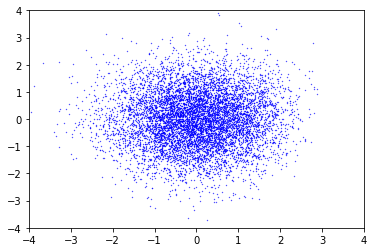

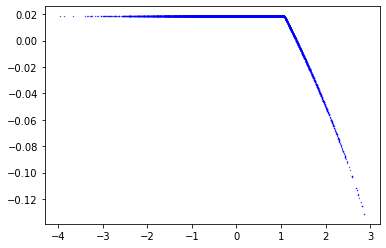

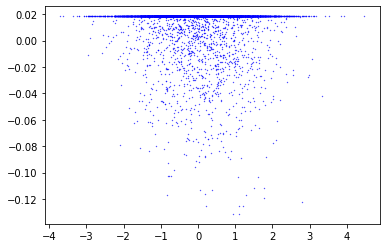

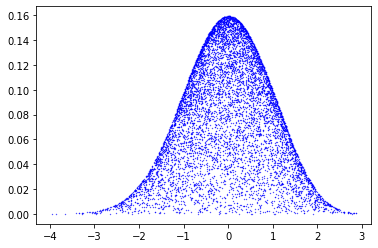

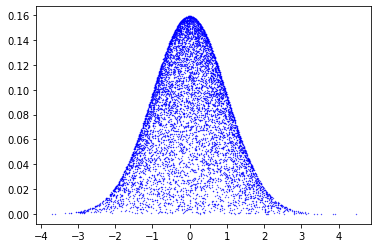

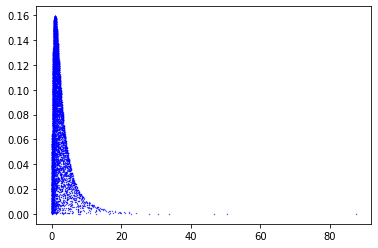

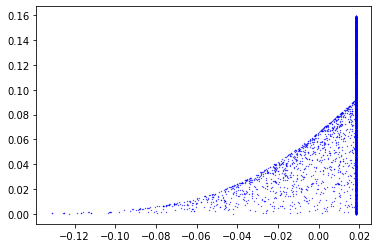

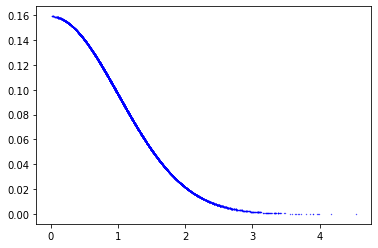

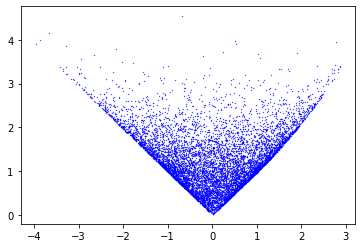

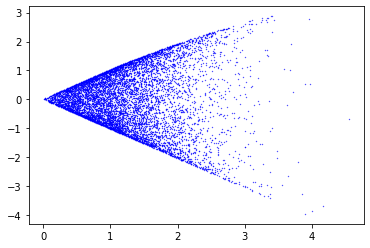

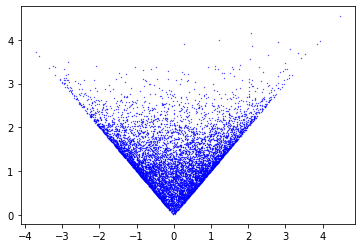

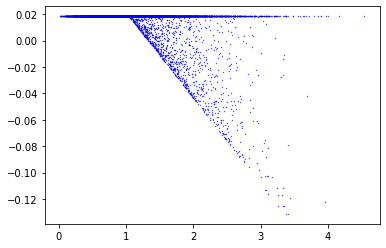

In [23]:

plt.scatter(torch.detach(foo[0][:,0]), torch.detach(foo[0][:,1]), c ="blue",s=0.1)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

plt.scatter(torch.detach(foo[0][:,0]), torch.detach(foo[1]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,1]), torch.detach(foo[1]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,0]), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,1]), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(np.exp(torch.detach(foo[0][:,1])), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[1]), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(distfromcent, truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,0]), distfromcent, c ="blue",s=0.1)
plt.show()

plt.scatter(distfromcent, torch.detach(foo[0][:,0]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,1]), distfromcent, c ="blue",s=0.1)
plt.show()

plt.scatter(distfromcent, torch.detach(foo[1]), c ="blue",s=0.1)
plt.show()

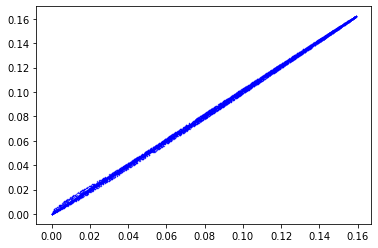

In [24]:
plt.scatter(truedens, estdens, c ="blue",s=0.1)
plt.show()

In [25]:
truedens.shape

(8100,)

# THE STEPS

The steps below reconstruct the passage of the training set through the network.

Note that this code is only designed to work with a single node in a single layer.

In [26]:
model

MAF(
  (layers): ModuleList(
    (0): MAFLayer(
      (made): MADE(
        (model): Sequential(
          (0): MaskedLinear(in_features=2, out_features=1, bias=True)
          (1): ReLU()
          (2): MaskedLinear(in_features=1, out_features=4, bias=True)
        )
      )
    )
    (1): BatchNormLayer()
  )
)

This is the training set.

In [27]:
torch.tensor(data.train.x)

tensor([[ 0.4904, -0.1470],
        [ 0.6399,  1.5220],
        [-0.2333, -0.2433],
        ...,
        [ 1.8092, -0.8637],
        [-0.2077, -0.5469],
        [-0.5501,  0.1710]])

These are the complete weights of the model.

In [28]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5982, -0.2367]], requires_grad=True),
 Parameter containing:
 tensor([-0.6246], requires_grad=True),
 Parameter containing:
 tensor([[-0.1139],
         [-0.2938],
         [-0.3002],
         [ 0.0827]], requires_grad=True),
 Parameter containing:
 tensor([-0.2376,  0.4481, -0.0925,  0.8351], requires_grad=True),
 Parameter containing:
 tensor([[0.0010, 0.0010]], requires_grad=True),
 Parameter containing:
 tensor([[-8.6432e-09,  6.8380e-08]], requires_grad=True)]

The first set of weights.

In [29]:
list(model.parameters())[0][0]

tensor([ 0.5982, -0.2367], grad_fn=<SelectBackward0>)

Take the product of the training set and the set of weights.

In [30]:
foo5 = torch.matmul(torch.tensor(data.train.x),list(model.parameters())[0].reshape(2,1))

Add on the bias term.

In [31]:
foo6 = foo5 + list(model.parameters())[1]

Apply ReLU

In [32]:
foo7 = torch.maximum(foo6,torch.zeros([torch.tensor(data.train.x).shape[0],1]))

This gets multiplied times the next set of weights, and the bias term is added.

In [33]:
list(model.parameters())[2]

Parameter containing:
tensor([[-0.1139],
        [-0.2938],
        [-0.3002],
        [ 0.0827]], requires_grad=True)

In [34]:
list(model.parameters())[2].reshape(1,4)

tensor([[-0.1139, -0.2938, -0.3002,  0.0827]], grad_fn=<ReshapeAliasBackward0>)

In [35]:
list(model.parameters())[3]

Parameter containing:
tensor([-0.2376,  0.4481, -0.0925,  0.8351], requires_grad=True)

In [36]:
foo8 = torch.matmul(foo7,list(model.parameters())[2].reshape(1,4))+list(model.parameters())[3]

This is of n by 4. The first two columns are the f_mu function evaluated at the two input values, while the second two columns are the f_alpha function evaluated at these same points.

In [37]:
[mu,alpha]=foo8.chunk(2,1)

In [38]:
mu

tensor([[-0.2376,  0.4481],
        [-0.2376,  0.4481],
        [-0.2376,  0.4481],
        ...,
        [-0.3130,  0.2535],
        [-0.2376,  0.4481],
        [-0.2376,  0.4481]], grad_fn=<SplitBackward0>)

In [39]:
alpha

tensor([[-0.0925,  0.8351],
        [-0.0925,  0.8351],
        [-0.0925,  0.8351],
        ...,
        [-0.2913,  0.8899],
        [-0.0925,  0.8351],
        [-0.0925,  0.8351]], grad_fn=<SplitBackward0>)

Compare this with Equation (4) in the paper.

In [40]:
usubi = (torch.tensor(data.train.x) - mu)*torch.exp(0.5*alpha)

Compare this with the following

In [41]:
AfterLayer0 = model.layers[0](torch.tensor(data.train.x))

In [42]:
sum(abs(AfterLayer0[0] - usubi))

tensor([30.8905, 94.2077], grad_fn=<AddBackward0>)

This should look like a bivariate standard normal.

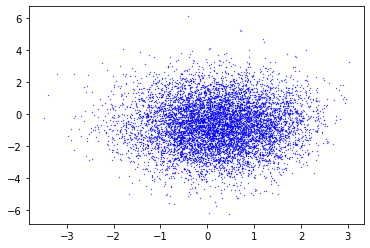

In [43]:
plt.scatter(torch.detach(usubi[:,0]), torch.detach(usubi[:,1]), c ="blue", s=0.1)
plt.show()

In [44]:
print(torch.mean(usubi,0))
print(torch.var(usubi,0))

tensor([ 0.2170, -0.6670], grad_fn=<MeanBackward1>)
tensor([0.8741, 2.2805], grad_fn=<VarBackward0>)


In [45]:
model

MAF(
  (layers): ModuleList(
    (0): MAFLayer(
      (made): MADE(
        (model): Sequential(
          (0): MaskedLinear(in_features=2, out_features=1, bias=True)
          (1): ReLU()
          (2): MaskedLinear(in_features=1, out_features=4, bias=True)
        )
      )
    )
    (1): BatchNormLayer()
  )
)

In [46]:
model.layers[1].gamma

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)

In [47]:
from batch_norm_layer import BatchNormLayer

bn = BatchNormLayer(2)
bn.gamma = model.layers[1].gamma
foo10 = bn(usubi)
#foo10 = bn(AfterLayer0[0])

In [48]:
bn.batch_var

In [49]:
model.layers[1].training
model.layers[1].batch_var

tensor([0.8753, 2.3236], grad_fn=<AddBackward0>)

In [50]:
torch.mean(foo10[0],0)

tensor([ 1.5659e-08, -6.5933e-09], grad_fn=<MeanBackward1>)

The following two lines should give the same result. Check that.

In [51]:
AfterLayer1 = model(torch.tensor(data.train.x))
AfterLayer1b = model.layers[1](AfterLayer0[0])

sum(abs(AfterLayer1[0] - AfterLayer1b[0]))

tensor([0., 0.], grad_fn=<AddBackward0>)

In [52]:
print(torch.var(foo10[0][:,0]))

print(torch.var(AfterLayer1[0][:,0]))

tensor(1.0020, grad_fn=<VarBackward0>)
tensor(1.0020, grad_fn=<VarBackward0>)


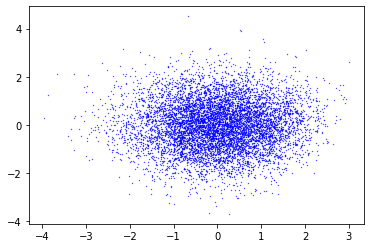

In [53]:
plt.scatter(torch.detach(foo10[0][:,0]), torch.detach(foo10[0][:,1]), c ="blue", s=0.1)
plt.show()

There is not perfect agreement, but the plots below show that it is quite close.

In [54]:
AfterLayer1[0][:,0]/foo10[0][:,0]

tensor([0.9980, 0.9983, 1.0024,  ..., 1.0214, 1.0028, 1.0006],
       grad_fn=<DivBackward0>)

In [55]:
AfterLayer1[0][:,1]/foo10[0][:,1]

tensor([0.9815, 0.9916, 0.9850,  ..., 1.0607, 0.9881, 0.9996],
       grad_fn=<DivBackward0>)

In [ ]:
plt.scatter(torch.detach(foo10[0][:,0]), torch.detach(AfterLayer1[0][:,0]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo10[0][:,1]), torch.detach(AfterLayer1[0][:,1]), c ="blue",s=0.1)
plt.show()